 ![imagen](../img/isla_basura.jpg)

# ESTUDIO BASES DE DATOS EUROSTAT SOBRE RESIDUOS EN EUROPA Y ESPAÑA

### 1. Business case & Data Collection
1. **Business understanding**: lo primero de todo es identificar la necesidad, el problema de negocio que intentamos resolver.
2. **Hipótesis**: Tendremos que realizar afirmaciones sobre los datos y comprobar si de verdad se cumple, basándonos en los mismos. Estos dos primeros puntos son fundamentales ya que siempre hay que tener una meta cuando realicemos un EDA. Con la hipótesis tiene que venir un **plan de acción**. Tenemos unos datos, unos posibles resultados...pero si ocurre esto o lo otro, ¿qué hacemos? ¿qué decisiones vamos a tomar?
3. **Requerimientos de los datos**: en este punto habrá que listar los datos necesarios, a alto nivel, para llevar a cabo el análisis: por ejemplo, los datos de ventas de los ultimos 3 años desagregados por tipo de cliente, o datos de bolsa de los ultimos 2 meses de las empresas A, B y C.
4. **Disponibilidad**: primer punto de inflexión en el proyecto. Si no podemos acceder al dato necesario para la analítica, bien porque no existe o bien porque pertenece a alguna organización, no será posible continuar por esa vía y quizá haya que replantear el proyecto y/o acudir a otras fuentes.
5. **Adquisición de datos**: es el momento de ir a por los datos, ya sea en bases de datos de la empresa, datasets públicos, APIs, Web Scrapping, comprando bases de datos o escribiendo a organizaciones para que cedan sus datos.
6. **Calidad**: segundo punto de inflexión en el proyecto. Es fundamental que los datos sean válidos para el análisis, suficientes, que no tengan excesivos missings, ni estén manipulados.
7. **Revisión de hipótesis**: una vez tenemos todos los datos recolectados, quizá tengamos que replantear la hipótesis al darnos cuenta de que tenemos otros datos u otras variables con las que no contábamos. Si tenemos menos variables que las iniciales, también habrá que replantearse el objetivo del proyecto.


Este trabajo se centra en el análisis de la generación y tratamiento de residuos urbanos. 
El propósito o destino primero de este análisis está en el análisis y supervisión administrativa, los gobiernos requieren cada vez más de información en el área de sostenibilidad para su gestión. Por lo tanto, abre oportunidades empresariales vinculadas a la mejora en la gestión de datos y también en el área de la economía circular y del empleo verde.

El residuo es un área medioambiental a la que se le ha dado relevancia por la propia necesidad de gestión del mismo. Tanto Unión Europea como ONU encuentran preocupante el aumento y la gestión que se hace del mismo, llegando a considerarse  un Objetivo de  Desarrollo Sostenible (Nº11) y a nivel europeo contar con objetivos de reducción que históricamente no llegan a alcanzarse por los territorios y ciudadanos (en cierto modo ajenos).

Dónde hay un área de trabajo también hay soluciones, las técnicas de gestión del residuo continúan en desarrollo, las políticas públicas van en la misma dirección y la concienciación sobre la reducción en la generación de residuos va en aumento. Por último, como parte clave de este engranaje está la economía circular, que toma como inputs de producción los propios residuos, reduce la generación ecodiseñando o mejorando la forma de consumo. 

En un primer momento, se planteaba analizar el caso español llegando al detalle autonómico y tomar la estadística de la Unión Europea como referencia. Se ha modificado el enfoque priorizando en el análisis europeo ya que aporta una estadística sobre reciclado más simple que permite profundizar en factores que se relacionan con ella como el PIB o la inversión en generar valor ambiental.
 Se incluye serie temporal de cada uno de los países desde 2000 hasta 2021 para dar más valor al análisis. 

La fuente de datos es Eurostat junto a la creación de una categorización de grupos de países de elaboración propia.



### 2. Data Understanding
1. **Exploratorio inicial**: en este momento realizaremos un primer análisis de las variables que tenemos en el dataset, obteniendo la información básica: cantidad de tablas, número de columnas, de filas, naturaleza de las variables, tipos de los datos, primeros registros y proporción de missings.


Revisión Data Frame residuos. Para ello, primero importamos los data Frame.

Finalmente, debido al tiempo y la dimensión del estudio se han hecho modificaciones en los Data Set analizados, excluyendo el 1 y 2 que profundizaban en el caso español por Comunidades Autónomas y fracciones de residuos.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_3= pd.read_csv("../data/3.protection_GDP.csv", sep=',', encoding='latin1')
# fuente_3 = "Gross value added in environmental good and services. EUROSTAT"
#https://ec.europa.eu/eurostat/databrowser/view/sdg_12_61__custom_10871879/default/table?lang=en

df_4 = pd.read_csv("../data/4.tasa_reciclaje_europea.csv", sep=';', encoding='latin1')
# fuente_4 = "Recycling rate of municipal waste.EUROSTAT"
#https://ec.europa.eu/eurostat/databrowser/view/cei_wm011/default/table?lang=en&category=cei.cei_wm

df_5 = pd.read_csv("../data/5.residuos_europa.csv", sep=';', encoding='latin1')
# fuente_5 = "Generation of municipal waste per capita. EUROSTAT"
#https://ec.europa.eu/eurostat/databrowser/view/cei_pc031/default/table?lang=en&category=cei.cei_pc

df_6= pd.read_csv("../data/conversion_eurostat_country.csv", sep=';', encoding='latin1')
# data set creado por mí para obtener una equivalencia de siglas de país con nombre de país.

df_7= pd.read_csv("../data/7.GDP_per_capita.csv", sep=',', encoding='latin1')
# fuente_7 = "Real GDP per capita. EUROSTAT"
#https://ec.europa.eu/eurostat/databrowser/view/sdg_08_10/default/table



In [3]:
df3bu=df_3.copy()
df4bu=df_4.copy()
df5bu=df_5.copy()
df6bu=df_6.copy()
df7bu=df_7.copy()


### 3. Data Cleaning
1. **Juntar tablas**: si queremos obtener relaciones entre variables o graficar datos de diferentes fuentes, tendremos que unirlos en una única tabla mediante sentencias como merge o join.
2. **Eliminar columnas**: columnas que no sirvan para el análisis, identificadores, constantes, columnas a null.
3. **Formato de los datos**: tras una primera eliminación de columnas, hay que forzar los tipos de los datos a lo que deberían ser. Asegúrate que un string es un string, que un date es un date y un numérico está en el formato que deseamos, de lo contrario tendremos errores en el posterior tratamiento.
4. **Missings**: analiza los valores missings de las variables e investig por qué tienes nulls. En Machine Learning se suelen sustituir por medias o modas pero en Data Analysis resulta interesante analizar por qué hay missings en algunos registros.
5. **Outliers**: al igual que con los missings, los outliers suelen meter ruido innecesario en los modelos, y distorsiona su entrenamiento con datos que no son representativos de la muestra, por lo que se suelen eliminar. En el caso de Data Analysis no es necesario, sino que resulta interesante destacar outliers y por qué de los mismos.¿Cómo detectar outliers?

    5.1 Histogramas
    
    5.2 Diagramas de caja
    
    5.3 Scatter plots
    
    5.4 Cuartiles, rango, mínimo y máximo
    
6. **Duplicados**: elimina los registros duplicados.
7. **Escalado**: si queremos comparar variables con distintas escalas, tendremos que transformarlas a la misma mediante un MinMaxScaler.
8. **Transformaciones**: sacar nuevas variables a partir de las anteriores, mediante ratios numéricos, binning, datos de las fechas (año, dia, mes).


### Data Cleaning (pasos 1 a 4)

#### Data Frame 3 y 7
Explorando el Data Frame 3 y 7, se eliminan celdas que no utilizaremos, para posteriormente unirlo a se observa que no hay nulos y que la columna 3 Total aparece como object, siendo cantidad a sumar.

In [32]:
df_3.head(5)

geo  TIME_PERIOD  Valor añadido ambiental respecto al PIB %
0  AT         2008                                       4.56
1  AT         2009                                       4.41
2  AT         2010                                       4.47
3  AT         2011                                       4.28
4  AT         2012                                       4.42

In [33]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['DATAFLOW','LAST UPDATE', 'freq', 'nace_r2', 'ceparema', 'na_item', 'ty','unit', 'OBS_FLAG']

# Eliminar las columnas especificadas
df_3 = df_3.drop(columns=columnas_a_eliminar)

# Cambiar el nombre de la columna OBS_VALUE a otra más explicativa
df_3.rename(columns={'OBS_VALUE': 'Valor añadido ambiental respecto al PIB %'}, inplace=True)

df_3.info()

KeyError: "['DATAFLOW', 'LAST UPDATE', 'freq', 'nace_r2', 'ceparema', 'na_item', 'ty', 'unit', 'OBS_FLAG'] not found in axis"

In [35]:
# Obtener los valores únicos en la columna "TIME_PERIOD" y contar cuántas veces aparece cada valor
valores_unicos = df_3["TIME_PERIOD"].value_counts()

# Mostrar los valores únicos y sus conteos
print(valores_unicos)


TIME_PERIOD
2019    32
2020    32
2021    31
2018    30
2017    27
2016    26
2014    25
2015    25
2013    13
2012    12
2011     9
2010     8
2008     6
2009     6
2022     5
2001     2
2002     2
2003     2
2004     2
2005     2
2006     2
2007     2
2000     1
Name: count, dtype: int64


In [36]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   geo             846 non-null    object
 1   TIME_PERIOD     846 non-null    int64 
 2   PIB per capita  846 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 20.0+ KB


In [37]:
df_7.head(4)

geo  TIME_PERIOD  PIB per capita
0  AL         2000            1700
1  AL         2001            1850
2  AL         2002            1940
3  AL         2003            2060

In [38]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['DATAFLOW','LAST UPDATE', 'freq', 'na_item','unit', 'OBS_FLAG']

# Eliminar las columnas especificadas
df_7 = df_7.drop(columns=columnas_a_eliminar)

# Cambiar el nombre de la columna OBS_VALUE a otra más explicativa
df_7.rename(columns={'OBS_VALUE': 'PIB per capita'}, inplace=True)

df_7.info()

KeyError: "['DATAFLOW', 'LAST UPDATE', 'freq', 'na_item', 'unit', 'OBS_FLAG'] not found in axis"

In [39]:
# Obtener los valores únicos en la columna "TIME_PERIOD" y contar cuántas veces aparece cada valor
valores_unicos = df_7["TIME_PERIOD"].value_counts()

# Mostrar los valores únicos y sus conteos
print(valores_unicos)

TIME_PERIOD
2012    36
2015    36
2019    36
2018    36
2017    36
2006    36
2007    36
2008    36
2009    36
2010    36
2011    36
2016    36
2013    36
2014    36
2020    35
2000    35
2001    35
2005    35
2004    35
2003    35
2002    35
2021    34
2022    33
2023    30
Name: count, dtype: int64


Se unen los dos data frame

In [40]:
# Fusionar los DataFrames
df_37 = pd.merge(df_7, df_3, on=['geo', 'TIME_PERIOD'], how='left')
df_37.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   geo                                        846 non-null    object 
 1   TIME_PERIOD                                846 non-null    int64  
 2   PIB per capita                             846 non-null    int64  
 3   Valor añadido ambiental respecto al PIB %  301 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.6+ KB


Hay un número elevado de países sin dato de Valor añadido ambiental. Esta variable se podrá analizar de 2017 a 2021.

In [41]:
# Filtrar el DataFrame para mostrar solo las filas donde la columna tiene valores nulos
valores_nulos = df_37[df_37["Valor añadido ambiental respecto al PIB %"].isnull()]

# Mostrar los valores nulos
print("Valores nulos en 'Valor añadido ambiental respecto al PIB %':")
print(valores_nulos)


Valores nulos en 'Valor añadido ambiental respecto al PIB %':
    geo  TIME_PERIOD  PIB per capita  \
0    AL         2000            1700   
1    AL         2001            1850   
2    AL         2002            1940   
3    AL         2003            2060   
4    AL         2004            2180   
..   ..          ...             ...   
841  UK         2015           31780   
842  UK         2016           32060   
843  UK         2017           32430   
844  UK         2018           32640   
845  UK         2019           32910   

     Valor añadido ambiental respecto al PIB %  
0                                          NaN  
1                                          NaN  
2                                          NaN  
3                                          NaN  
4                                          NaN  
..                                         ...  
841                                        NaN  
842                                        NaN  
843             

#### Data Frame 4


También revisamos data frame 4. Los datos tienen un formato válido, pero limpiamos celdas que no aportan información útil.

In [42]:
df_4.info()

# Lista de columnas a eliminar
columnas_a_eliminar = ['DATAFLOW','LAST UPDATE', 'freq', 'unit', 'OBS_FLAG','wst_oper']

# Eliminar las columnas especificadas
df_4 = df_4.drop(columns=columnas_a_eliminar)

# Mostrar el DataFrame después de eliminar las columnas

df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   geo               733 non-null    object 
 1   TIME_PERIOD       733 non-null    int64  
 2   tasa reciclaje %  733 non-null    float64
 3   country           733 non-null    object 
 4   group             733 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 28.8+ KB


KeyError: "['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'OBS_FLAG', 'wst_oper'] not found in axis"

In [45]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   geo               733 non-null    object 
 1   TIME_PERIOD       733 non-null    int64  
 2   tasa reciclaje %  733 non-null    float64
 3   country_x         733 non-null    object 
 4   group_x           733 non-null    object 
 5   country_y         733 non-null    object 
 6   group_y           733 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 40.2+ KB


In [46]:

# Lista de columnas a eliminar
columnas_a_eliminar = ['group_y','country_y']

# Eliminar las columnas especificadas
df_4 = df_4.drop(columns=columnas_a_eliminar)

# Mostrar el DataFrame después de eliminar las columnas

df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   geo               733 non-null    object 
 1   TIME_PERIOD       733 non-null    int64  
 2   tasa reciclaje %  733 non-null    float64
 3   country_x         733 non-null    object 
 4   group_x           733 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 28.8+ KB


Vamos a añadir columna country de df_4 al df_5 para hacer más fácil en el análisis la identificación del país.

In [47]:
# Fusionar los DataFrames df_4 y df_5 en función de la columna "geo"
df_4 = pd.merge(df_4, df_6[['geo', 'country','group']], on='geo', how='left')

# Mostrar el DataFrame fusionado
print(df_4)



    geo  TIME_PERIOD  tasa reciclaje % country_x group_x  country group
0    AL         2020              18.1   Albania    East  Albania  East
1    AL         2021              18.7   Albania    East  Albania  East
2    AL         2022              18.9   Albania    East  Albania  East
3    AT         2000              63.4   Austria    West  Austria  West
4    AT         2001              64.3   Austria    West  Austria  West
..   ..          ...               ...       ...     ...      ...   ...
728  TR         2020              12.3    Turkey     NAN   Turkey   NAN
729  TR         2021              12.3    Turkey     NAN   Turkey   NAN
730  XK         2020               0.0   Kosovo*    East  Kosovo*  East
731  XK         2021               2.5   Kosovo*    East  Kosovo*  East
732  XK         2022               2.6   Kosovo*    East  Kosovo*  East

[733 rows x 7 columns]


In [50]:

# Lista de columnas a eliminar
columnas_a_eliminar = ['group_x']

# Eliminar las columnas especificadas
df_4 = df_4.drop(columns=columnas_a_eliminar)

# Mostrar el DataFrame después de eliminar las columnas

df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   geo               733 non-null    object 
 1   TIME_PERIOD       733 non-null    int64  
 2   tasa reciclaje %  733 non-null    float64
 3   country           733 non-null    object 
 4   group             733 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 28.8+ KB


También cambiamos el nombre de la columna OBS_Value para facilitar su interpretación.

In [44]:
# Cambiar el nombre de la columna OBS_VALUE a otra más explicativa
df_4.rename(columns={'OBS_VALUE': 'tasa reciclaje %'}, inplace=True)

# Mostrar el DataFrame con el nombre de columna cambiado
print(df_4)

    geo  TIME_PERIOD  tasa reciclaje % country_x group_x country_y group_y
0    AL         2020              18.1   Albania    East   Albania    East
1    AL         2021              18.7   Albania    East   Albania    East
2    AL         2022              18.9   Albania    East   Albania    East
3    AT         2000              63.4   Austria    West   Austria    West
4    AT         2001              64.3   Austria    West   Austria    West
..   ..          ...               ...       ...     ...       ...     ...
728  TR         2020              12.3    Turkey     NAN    Turkey     NAN
729  TR         2021              12.3    Turkey     NAN    Turkey     NAN
730  XK         2020               0.0   Kosovo*    East   Kosovo*    East
731  XK         2021               2.5   Kosovo*    East   Kosovo*    East
732  XK         2022               2.6   Kosovo*    East   Kosovo*    East

[733 rows x 7 columns]


In [16]:
# Obtener los valores únicos en la columna "TIME_PERIOD" y contar cuántas veces aparece cada valor
valores_unicos = df_4["TIME_PERIOD"].value_counts()

# Mostrar los valores únicos y sus conteos
print(valores_unicos)

TIME_PERIOD
2020    36
2021    35
2018    34
2017    34
2016    34
2011    34
2008    34
2009    33
2012    33
2014    33
2010    32
2013    32
2015    32
2019    32
2007    31
2006    30
2003    30
2002    30
2001    30
2000    30
2004    29
2005    29
2022    26
Name: count, dtype: int64


Realizamos los mismos pasos en data frame 5. Los datos tienen un formato válido, pero limpiamos celdas que no aportan información útil.

In [51]:
df_5.info()

# Lista de columnas a eliminar
columnas_a_eliminar = ['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'OBS_FLAG', 'wst_oper']

# Eliminar las columnas especificadas
df_5 = df_5.drop(columns=columnas_a_eliminar)

# Mostrar el DataFrame después de eliminar las columnas
df_5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   geo              788 non-null    object
 1   TIME_PERIOD      788 non-null    int64 
 2   residuos_kg_hab  788 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 18.6+ KB


KeyError: "['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'OBS_FLAG', 'wst_oper'] not found in axis"

También vamos a mejorar la interpretación de la columna OBS_var cambiandole el nombre.

In [18]:

# Cambiar el nombre de la columna OBS_VALUE a residuos_kg_hab
df_5.rename(columns={'OBS_VALUE': 'residuos_kg_hab'}, inplace=True)

# Mostrar el DataFrame con el nombre de columna cambiado
print(df_5)

df_5.info()

    geo  TIME_PERIOD  residuos_kg_hab
0    AL         2013              325
1    AL         2014              425
2    AL         2015              491
3    AL         2016              452
4    AL         2017              436
..   ..          ...              ...
783  XK         2017              229
784  XK         2018              226
785  XK         2019              252
786  XK         2020              255
787  XK         2021              270

[788 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   geo              788 non-null    object
 1   TIME_PERIOD      788 non-null    int64 
 2   residuos_kg_hab  788 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 18.6+ KB


Viendo que df_4 y df_5 aportan datos por país respecto a residuos reciclados y tasa de reciclaje se unen en un único Data Frame para facilitar el análisis. 


In [52]:
# Fusionar los DataFrames
df_eurostat = pd.merge(df_4, df_5, on=['geo', 'TIME_PERIOD'], how='left')

# Mostrar el DataFrame final
df_eurostat.info()
df_eurostat.head(13)

df_eurostat_copy1=df_eurostat.copy()

# Guardar el DataFrame final como un archivo CSV en la carpeta "data"
#df_eurostat.to_csv('../data/df_eurostat.csv', index=False)

#print("El archivo CSV se ha guardado correctamente.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   geo               733 non-null    object 
 1   TIME_PERIOD       733 non-null    int64  
 2   tasa reciclaje %  733 non-null    float64
 3   country           733 non-null    object 
 4   group             733 non-null    object 
 5   residuos_kg_hab   732 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 34.5+ KB


In [20]:
# Filtrar el DataFrame para mostrar solo las filas donde la columna tiene valores nulos
valores_nulos = df_eurostat[df_eurostat["residuos_kg_hab"].isnull()]

# Mostrar los valores nulos
print("Valores nulos en 'Valor añadido ambiental respecto al PIB %':")
print(valores_nulos)


Valores nulos en 'Valor añadido ambiental respecto al PIB %':
    geo  TIME_PERIOD  tasa reciclaje %  country group  residuos_kg_hab
732  XK         2022               2.6  Kosovo*  East              NaN


In [53]:
# Agrupar los datos por país y contar el número de datos en cada columna dentro de cada grupo
datos_por_columna_y_country = df_eurostat.groupby('country').count()

# Mostrar los datos por columna y país
print(datos_por_columna_y_country)

datos_por_columna_y_country


                        geo  TIME_PERIOD  tasa reciclaje %  group  \
country                                                             
Albania                   3            3                 3      3   
Austria                  22           22                22     22   
Belgium                  23           23                23     23   
Bosnia and Herzegovina   10           10                10     10   
Bulgaria                 22           22                22     22   
Croatia                  16           16                16     16   
Cyprus                   23           23                23     23   
Czechia                  22           22                22     22   
Denmark                  22           22                22     22   
EU27_2020                23           23                23     23   
Estonia                  23           23                23     23   
Finland                  22           22                22     22   
France                   23       

geo  TIME_PERIOD  tasa reciclaje %  group  \
country                                                             
Albania                   3            3                 3      3   
Austria                  22           22                22     22   
Belgium                  23           23                23     23   
Bosnia and Herzegovina   10           10                10     10   
Bulgaria                 22           22                22     22   
Croatia                  16           16                16     16   
Cyprus                   23           23                23     23   
Czechia                  22           22                22     22   
Denmark                  22           22                22     22   
EU27_2020                23           23                23     23   
Estonia                  23           23                23     23   
Finland                  22           22                22     22   
France                   23           23                23     23   
Germany                  23           23                23     23   
Greece                   22           22                22     22   
Hungary                  23           23                23     23   
Iceland                  17           17                17     17   
Ireland                  19           19                19     19   
Italy                    22           22                22     22   
Kosovo*                   3            3                 3      3   
Latvia                   22           22                22     22   
Lithuania                23           23                23     23   
Luxembourg               23           23                23     23   
Malta                    23           23                23     23   
Montenegro                5            5                 5      5   
Netherlands              23           23                23     23   
North Macedonia           3            3                 3      3   
Norway                   23           23                23     23   
Poland                   23           23                23     23   
Portugal                 22           22                22     22   
Romania                  23           23                23     23   
Serbia                   16           16                16     16   
Slovakia                 23           23                23     23   
Slovenia                 23           23                23     23   
Spain                    23           23                23     23   
Sweden                   23           23                23     23   
Switzerland              23           23                23     23   
Turkey                    6            6                 6      6   

                        residuos_kg_hab  
country                                  
Albania                               3  
Austria                              22  
Belgium                              23  
Bosnia and Herzegovina               10  
Bulgaria                             22  
Croatia                              16  
Cyprus                               23  
Czechia                              22  
Denmark                              22  
EU27_2020                            23  
Estonia                              23  
Finland                              22  
France                               23  
Germany                              23  
Greece                               22  
Hungary                              23  
Iceland                              17  
Ireland                              19  
Italy                                22  
Kosovo*                               2  
Latvia                               22  
Lithuania                            23  
Luxembourg                           23  
Malta                                23  
Montenegro                            5  
Netherlands                          23  
North Macedonia                       3  
Norway                               23  
Pol

In [54]:
# Contar el número de datos en la columna "geo" para cada país
conteo_datos_por_pais = df_eurostat.groupby('country')['geo'].count()

# Obtener los nombres de los países que tienen al menos 22 datos en la columna "geo"
paises_con_suficientes_datos = conteo_datos_por_pais[conteo_datos_por_pais >= 22].index.tolist()

# Filtrar el DataFrame para mantener solo las filas de los países con suficientes datos
df_eurostat_filtrado = df_eurostat[df_eurostat['country'].isin(paises_con_suficientes_datos)]

# Mostrar el DataFrame filtrado
print(df_eurostat_filtrado)


    geo  TIME_PERIOD  tasa reciclaje %   country group  residuos_kg_hab
3    AT         2000              63.4   Austria  West            580.0
4    AT         2001              64.3   Austria  West            576.0
5    AT         2002              62.5   Austria  West            608.0
6    AT         2003              64.2   Austria  West            607.0
7    AT         2004              57.4   Austria  West            574.0
..   ..          ...               ...       ...   ...              ...
719  SK         2018              36.3  Slovakia  East            414.0
720  SK         2019              38.5  Slovakia  East            421.0
721  SK         2020              45.3  Slovakia  East            478.0
722  SK         2021              48.9  Slovakia  East            497.0
723  SK         2022              49.5  Slovakia  East            478.0

[635 rows x 6 columns]


In [55]:
# Agrupar los datos por la columna "group" y obtener los países correspondientes a cada grupo
for group, group_data in df_eurostat_filtrado.groupby("group"):
    # Obtener los países únicos para el grupo actual
    paises_grupo = group_data["country"].unique()
    
    # Imprimir el nombre del grupo y los países correspondientes
    print(f"Grupo: {group}")
    print(", ".join(paises_grupo))
    print()  # Imprimir una línea en blanco entre grupos

Grupo: Baltic
Estonia, Lithuania, Latvia

Grupo: East
Bulgaria, Czechia, Hungary, Poland, Romania, Slovenia, Slovakia

Grupo: NAN
EU27_2020

Grupo: North
Denmark, Finland, Norway, Sweden

Grupo: South
Cyprus, Greece, Spain, Italy, Malta, Portugal

Grupo: West
Austria, Belgium, Switzerland, Germany, France, Luxembourg, Netherlands



In [56]:
df_eurostat_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 635 entries, 3 to 723
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   geo               635 non-null    object 
 1   TIME_PERIOD       635 non-null    int64  
 2   tasa reciclaje %  635 non-null    float64
 3   country           635 non-null    object 
 4   group             635 non-null    object 
 5   residuos_kg_hab   635 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 34.7+ KB


Se incorpora el df_37 con datos de PIB y protección ambiental al data frame de eurostat

In [57]:
df_eurostat_full = pd.merge(df_eurostat_filtrado, df_37, on=['geo', 'TIME_PERIOD'], how='left')
df_eurostat_full.head(3)


geo  TIME_PERIOD  tasa reciclaje %  country group  residuos_kg_hab  \
0  AT         2000              63.4  Austria  West            580.0   
1  AT         2001              64.3  Austria  West            576.0   
2  AT         2002              62.5  Austria  West            608.0   

   PIB per capita  Valor añadido ambiental respecto al PIB %  
0         31710.0                                        NaN  
1         31990.0                                        NaN  
2         32360.0                                        NaN

In [58]:
df_eurostat_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   geo                                        635 non-null    object 
 1   TIME_PERIOD                                635 non-null    int64  
 2   tasa reciclaje %                           635 non-null    float64
 3   country                                    635 non-null    object 
 4   group                                      635 non-null    object 
 5   residuos_kg_hab                            635 non-null    float64
 6   PIB per capita                             612 non-null    float64
 7   Valor añadido ambiental respecto al PIB %  269 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 39.8+ KB


In [27]:
# Agrupar los datos por la columna "group" y obtener los países correspondientes a cada grupo
for group, group_data in df_eurostat_full.groupby("group"):
    # Obtener los países únicos para el grupo actual
    paises_grupo = group_data["country"].unique()
    
    # Imprimir el nombre del grupo y los países correspondientes
    print(f"Grupo: {group}")
    print(", ".join(paises_grupo))
    print()  # Imprimir una línea en blanco entre grupos

Grupo: Baltic
Estonia, Lithuania, Latvia

Grupo: East
Bulgaria, Czechia, Hungary, Poland, Romania, Slovenia, Slovakia

Grupo: NAN
EU27_2020

Grupo: North
Denmark, Finland, Norway, Sweden

Grupo: South
Cyprus, Greece, Spain, Italy, Malta, Portugal

Grupo: West
Austria, Belgium, Switzerland, Germany, France, Luxembourg, Netherlands



In [60]:
# Eliminar las filas donde el valor de la columna "group" sea el texto "NAN"
df_eurostat_full = df_eurostat_full[df_eurostat_full['group'] != 'NAN']

# Mostrar información actualizada del DataFrame
print(df_eurostat_full.info())


<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 0 to 634
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   geo                                        612 non-null    object 
 1   TIME_PERIOD                                612 non-null    int64  
 2   tasa reciclaje %                           612 non-null    float64
 3   country                                    612 non-null    object 
 4   group                                      612 non-null    object 
 5   residuos_kg_hab                            612 non-null    float64
 6   PIB per capita                             612 non-null    float64
 7   Valor añadido ambiental respecto al PIB %  269 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 43.0+ KB
None


A tener en cuenta que 2022 tiene datos de casi todas las columnas, en aportación valor añadido al PIB solo 3 datos, así que habrá que tenerlo en cuenta.

In [61]:
# Agrupar los datos por país y contar el número de datos en cada columna dentro de cada grupo
datos_por_columna_y_country = df_eurostat_full.groupby('TIME_PERIOD').count()

# Mostrar los datos por columna y país
print(datos_por_columna_y_country)


datos_por_columna_y_country

             geo  tasa reciclaje %  country  group  residuos_kg_hab  \
TIME_PERIOD                                                           
2000          27                27       27     27               27   
2001          27                27       27     27               27   
2002          27                27       27     27               27   
2003          27                27       27     27               27   
2004          27                27       27     27               27   
2005          27                27       27     27               27   
2006          27                27       27     27               27   
2007          27                27       27     27               27   
2008          27                27       27     27               27   
2009          27                27       27     27               27   
2010          26                26       26     26               26   
2011          27                27       27     27               27   
2012  

geo  tasa reciclaje %  country  group  residuos_kg_hab  \
TIME_PERIOD                                                           
2000          27                27       27     27               27   
2001          27                27       27     27               27   
2002          27                27       27     27               27   
2003          27                27       27     27               27   
2004          27                27       27     27               27   
2005          27                27       27     27               27   
2006          27                27       27     27               27   
2007          27                27       27     27               27   
2008          27                27       27     27               27   
2009          27                27       27     27               27   
2010          26                26       26     26               26   
2011          27                27       27     27               27   
2012          27                27       27     27               27   
2013          27                27       27     27               27   
2014          27                27       27     27               27   
2015          27                27       27     27               27   
2016          27                27       27     27               27   
2017          27                27       27     27               27   
2018          27                27       27     27               27   
2019          27                27       27     27               27   
2020          27                27       27     27               27   
2021          27                27       27     27               27   
2022          19                19       19     19               19   

             PIB per capita  Valor añadido ambiental respecto al PIB %  
TIME_PERIOD                                                             
2000                     27                                          1  
2001                     27                                          2  
2002                     27                                          2  
2003                     27                                          2  
2004                     27                                          2  
2005                     27                                          2  
2006                     27                                          2  
2007                     27                                          2  
2008                     27                                          6  
2009                     27                                          6  
2010                     26                                          8  
2011                     27                                          9  
2012                     27                                         12  
2013                     27                                         13  
2014                     27                                         21  
2015                     27                                         22  
2016                     27                                         23  
2017                     27                                         24  
2018                     27                                         26  
2019                     27                                         27  
2020                     27                                         27  
2021                     27                                         27  
2022                     19                                          3

In [62]:
# Filtrar el DataFrame para mostrar solo las filas donde la columna tiene valores nulos
valores_nulos = df_eurostat_full[df_eurostat_full["Valor añadido ambiental respecto al PIB %"].isnull()]

# Mostrar los valores nulos
print("Valores nulos en 'Valor añadido ambiental respecto al PIB %':")
print(valores_nulos)

# Obtener los países que tienen valores nulos en la columna "country"
paises_con_valores_nulos = valores_nulos['country'].unique()

# Mostrar los países con valores nulos en la columna "country"
print(paises_con_valores_nulos)


Valores nulos en 'Valor añadido ambiental respecto al PIB %':
    geo  TIME_PERIOD  tasa reciclaje %   country group  residuos_kg_hab  \
0    AT         2000              63.4   Austria  West            580.0   
1    AT         2001              64.3   Austria  West            576.0   
2    AT         2002              62.5   Austria  West            608.0   
3    AT         2003              64.2   Austria  West            607.0   
4    AT         2004              57.4   Austria  West            574.0   
..   ..          ...               ...       ...   ...              ...   
626  SK         2014              10.4  Slovakia  East            320.0   
627  SK         2015              14.9  Slovakia  East            329.0   
628  SK         2016              23.0  Slovakia  East            348.0   
629  SK         2017              29.8  Slovakia  East            378.0   
634  SK         2022              49.5  Slovakia  East            478.0   

     PIB per capita  Valor añadido am

Por último, se observa que 2022 es un año del que no todos los países tienen datos, por ello, trabajaremos excluyendo este año.





In [65]:
# Hacer copia de seguridad
df_eurostat_full_con_2022= df_eurostat_full.copy()


# Filtrar el DataFrame para excluir el periodo de tiempo 2022
df_eurostat_full = df_eurostat_full[df_eurostat_full['TIME_PERIOD'] != 2022]

# Verificar que se han excluido los datos del periodo de tiempo 2022
print(df_eurostat_full['TIME_PERIOD'].unique())


[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


Por último, se cambia el formato de Time Period

In [66]:
df_eurostat['TIME_PERIOD'] = pd.to_datetime(df_eurostat['TIME_PERIOD'], format='%Y')
df_eurostat['TIME_PERIOD'] = pd.to_datetime(df_eurostat['TIME_PERIOD'], format='%Y')
# Convertir la columna TIME_PERIOD de datetime a str
df_eurostat['TIME_PERIOD'] = df_eurostat['TIME_PERIOD'].dt.strftime('%Y')

# Verificar el resultado
print(df_eurostat['TIME_PERIOD'].dtype)  # Verificar el tipo de datos de la columna
print(df_eurostat['TIME_PERIOD'].head())  # Verificar las primeras filas de la columna convertida



object
0    2020
1    2021
2    2022
3    2000
4    2001
Name: TIME_PERIOD, dtype: object


### Data Cleaning (pasos 7 a 10) 
7. **Outliers**: al igual que con los missings, los outliers suelen meter ruido innecesario en los modelos, y distorsiona su entrenamiento con datos que no son representativos de la muestra, por lo que se suelen eliminar. En el caso de Data Analysis no es necesario, sino que resulta interesante destacar outliers y por qué de los mismos.¿Cómo detectar outliers?

    14.1 Histogramas
    
    14.2 Diagramas de caja
    
    14.3 Scatter plots
    
    14.4 Cuartiles, rango, mínimo y máximo
    
8. **Duplicados**: elimina los registros duplicados.
9. **Escalado**: si queremos comparar variables con distintas escalas, tendremos que transformarlas a la misma mediante un MinMaxScaler.
10. **Transformaciones**: sacar nuevas variables a partir de las anteriores, mediante ratios numéricos, binning, datos de las fechas (año, dia, mes).

In [67]:
columnas_categoricas_euro= ["country",'TIME_PERIOD','group']
columnas_numericas_euro = ["tasa reciclaje %","residuos_kg_hab","Valor añadido ambiental respecto al PIB %", "PIB per capita"]


#### Analisis de anomalías variables categóricas


A nivel categórico vemos datos no distribuidos  homogéneamente, esto hace reducir el estudioa los años que tienen un número similar de períodos anuales, de 2012 a 2021. 

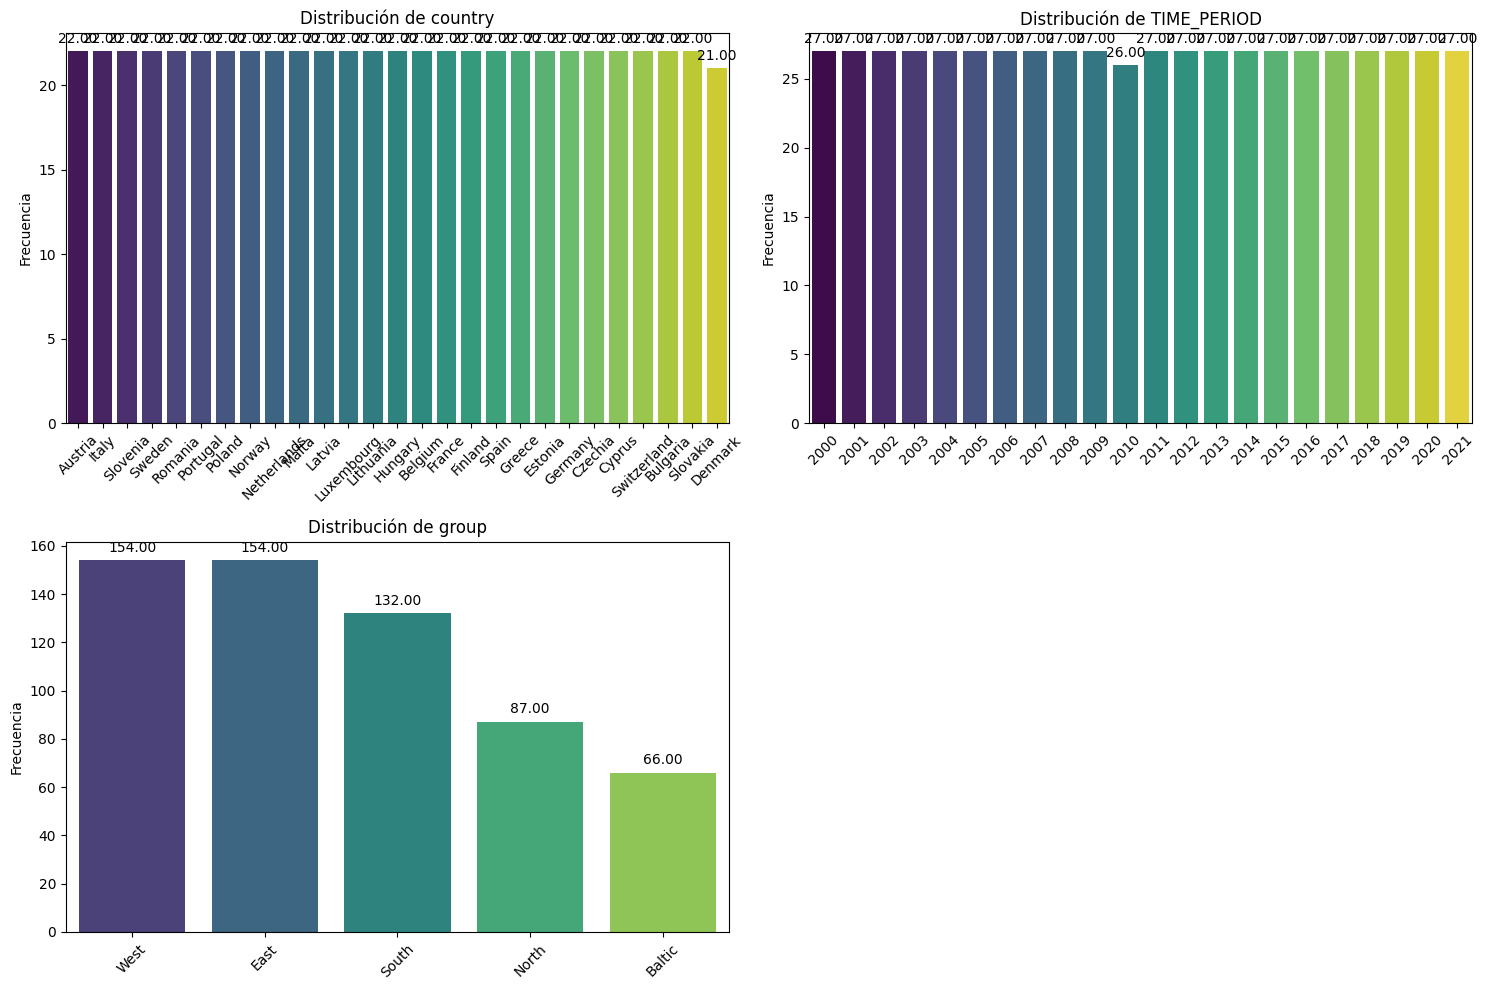

In [68]:
import sys
sys.path.insert(0, '../utils')

from bootcampviztools import pinta_distribucion_categoricas
# Llamar a la función con df_eurostat y las columnas adecuadas
pinta_distribucion_categoricas(df_eurostat_full, columnas_categoricas_euro,mostrar_valores=True)


In [69]:
# Agrupar los datos por la columna "group" y obtener los países correspondientes a cada grupo
for group, group_data in df_eurostat_full.groupby("group"):
    # Obtener los países únicos para el grupo actual
    paises_grupo = group_data["country"].unique()
    
    # Imprimir el nombre del grupo y los países correspondientes
    print(f"Grupo: {group}")
    print(", ".join(paises_grupo))
    print()  # Imprimir una línea en blanco entre grupos

Grupo: Baltic
Estonia, Lithuania, Latvia

Grupo: East
Bulgaria, Czechia, Hungary, Poland, Romania, Slovenia, Slovakia

Grupo: North
Denmark, Finland, Norway, Sweden

Grupo: South
Cyprus, Greece, Spain, Italy, Malta, Portugal

Grupo: West
Austria, Belgium, Switzerland, Germany, France, Luxembourg, Netherlands



#### Análisis outliers variables numéricas

El histograma y boxplot de tasa de reciclaje muestran una distribución de dos jorobas, que podría indicarse que es La distribución bimodal, puede surgir en situaciones donde los datos provienen de dos poblaciones diferentes o subgrupos dentro de una población que tienen diferentes características. En este caso, podría indicar que hay tendencias de tasas de reciclado muy diferentes. Adicionalmente, los datos se encuentran algo más desviados  a la izquierda.

El histograma y boxplot de residuos kg habitante muestran una distribución bastante centrada, ligeramente a la izquierda y con una forma que no llega a ser normal pero se acerca. Sugiere una distribución bastante balanceada, sin grandes sesgos en los datos.

El histograma y boxplot de valor añadido ambiental está sesgado a la derecha, la mayoría de los valores se encuentran en el lado de la izquierda , aunque con una distribución que se acerca  a la normal, esta distribución uniforme practicamente a su vez presenta en el box plot outliers fuera del bigote máximo. Se van a revisar aunque podrían ser los valores NaN que el data set inicial no proveía de dato en ciertos países.

El histograma y boxplot de PIB per capita, presenta tendencia sesgada a la derecha, la mayoría de valores se encuentran a la izquierda y el boxplot presentan outliers en valores muy elevados y alejados de los bigotes, que no son especialmente largos.

(4, 2)


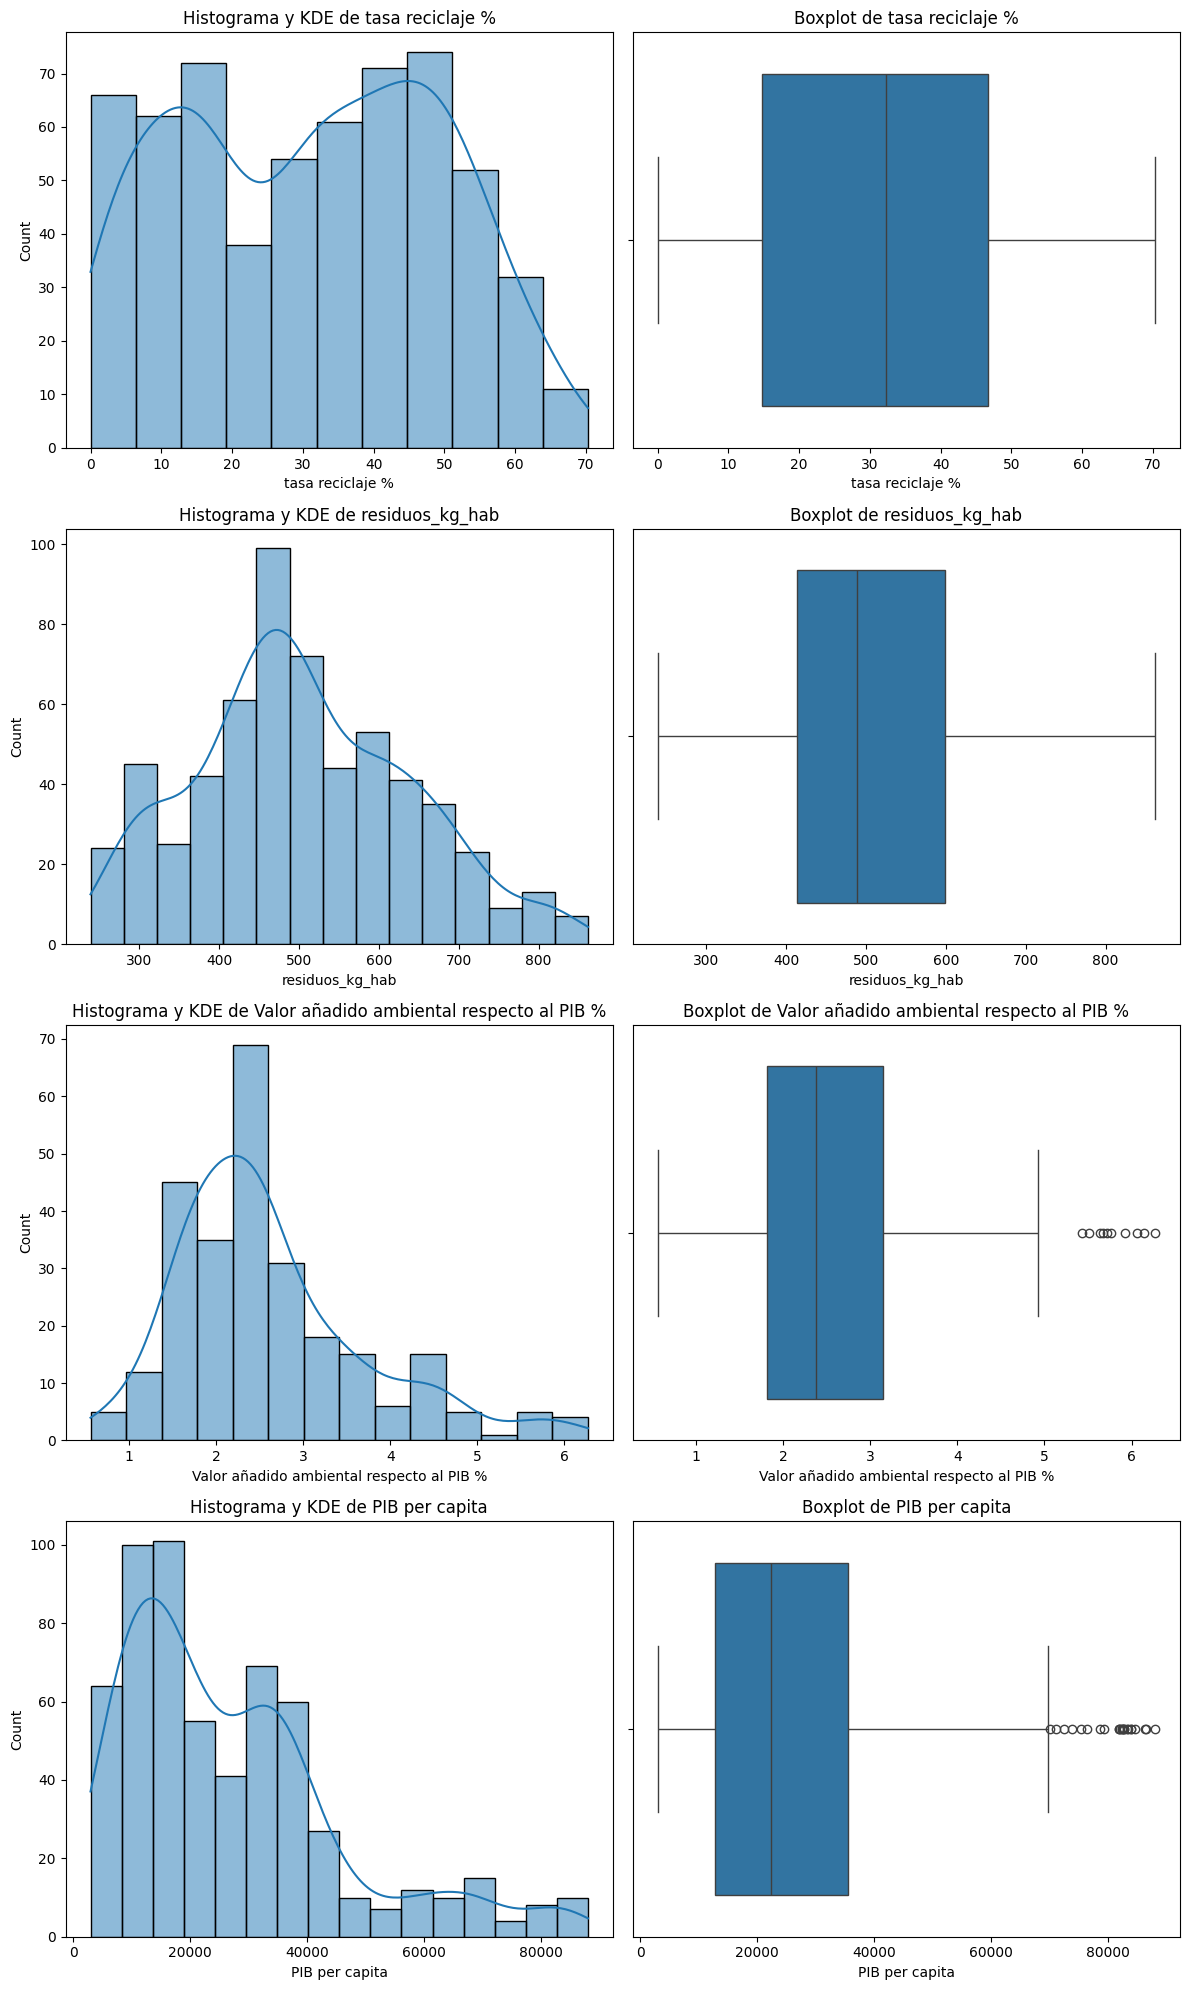

In [73]:
import sys
sys.path.insert(0, '../utils')

from bootcampviztools import plot_combined_graphs
plot_combined_graphs(df_eurostat_full, columnas_numericas_euro)

Observando que la tasa de reciclado tiene dos subgrupos, se van a imprimir los de tasa menor a 20% y los de mayor a 40%. Slovakia, por ejemplo ha evolucionado de un 5% en el año 2000 a un 49% en 2021

In [74]:
# Filtrar los datos dentro del rango 
datos_filtrados = df_eurostat_full[(df_eurostat_full['tasa reciclaje %'] < 20)] 

# Obtener los nombres únicos de los países en ese rango
paises_en_rango_bajo = datos_filtrados['country'].unique()

# Mostrar los países en ese rango
print("Países con valores de tasa de reciclado menor o igual a 20%:")
print(paises_en_rango_bajo)

Países con valores de tasa de reciclado menor o igual a 20%:
['Bulgaria' 'Cyprus' 'Czechia' 'Estonia' 'Greece' 'Spain' 'Hungary'
 'Italy' 'Lithuania' 'Latvia' 'Malta' 'Poland' 'Portugal' 'Romania'
 'Slovenia' 'Slovakia']


In [75]:
# Filtrar los datos dentro del rango 
datos_filtrados = df_eurostat_full[(df_eurostat_full['tasa reciclaje %'] > 40)] 

# Obtener los nombres únicos de los países en ese rango
paises_en_rango_alto = datos_filtrados['country'].unique()

# Mostrar los países en ese rango
print("Países con valores de tasa de reciclado mayor a 40%:")
print(paises_en_rango_alto)

Países con valores de tasa de reciclado mayor a 40%:
['Austria' 'Belgium' 'Switzerland' 'Czechia' 'Germany' 'Denmark' 'Spain'
 'Finland' 'France' 'Italy' 'Lithuania' 'Luxembourg' 'Latvia'
 'Netherlands' 'Norway' 'Poland' 'Sweden' 'Slovenia' 'Slovakia']


En la columna Valor añadido ambiental hay ouliers por encima de 5,5% de PIB. Es un caso aislado de Finlandia que se mantiene por encima de ese valor en el tiempo. Es un caso interesante para evaluar la correlación entre valor añadido ambiental y tasa de reciclaje o de generación de residuos.

In [76]:
# Filtrar los datos dentro del rango 
datos_filtrados = df_eurostat_full[(df_eurostat_full['Valor añadido ambiental respecto al PIB %'] >= 5.5)]
# Obtener los nombres únicos de los países en ese rango
paises_en_rango = datos_filtrados['country'].unique()

# Mostrar los países en ese rango
print("Países con valores Valor añadido ambiental respecto al PIB en el rango de más de 5,5%:")
print(paises_en_rango)

Países con valores Valor añadido ambiental respecto al PIB en el rango de más de 5,5%:
['Finland']


Los outliers de PIB per cápita son los países que se enumeran.

In [77]:

# Filtrar los datos dentro del rango 
datos_filtrados = df_eurostat_full[(df_eurostat_full['PIB per capita'] >= 75000)]
# Obtener los nombres únicos de los países en ese rango
paises_en_rango = datos_filtrados['country'].unique()

# Mostrar los países en ese rango
print("Países con valores PIB per capita en el rango de igual o más de 75000:")
print(paises_en_rango)

Países con valores PIB per capita en el rango de igual o más de 75000:
['Luxembourg']


In [78]:
df_eurostat_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593 entries, 0 to 633
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   geo                                        593 non-null    object 
 1   TIME_PERIOD                                593 non-null    int64  
 2   tasa reciclaje %                           593 non-null    float64
 3   country                                    593 non-null    object 
 4   group                                      593 non-null    object 
 5   residuos_kg_hab                            593 non-null    float64
 6   PIB per capita                             593 non-null    float64
 7   Valor añadido ambiental respecto al PIB %  266 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 41.7+ KB


Evaluamos los datos realizando corte por países según resultados residuos kg hab

In [79]:
# Calcular la media de residuos por habitante por país
media_residuos_por_pais = df_eurostat_full.groupby('country')['residuos_kg_hab'].mean()

# Calcular los percentiles de la media de residuos por habitante en todo el conjunto de datos
percentiles = media_residuos_por_pais.quantile([0.25, 0.50, 0.75])

# Función para asignar el grupo basado en los percentiles y calcular el rango de residuos
def asignar_grupo(media):
    if media <= percentiles[0.25]:
        grupo = 'Grupo 1 perc.0-0.25'
        rango = f'{media_residuos_por_pais.min():.2f} - {percentiles[0.25]:.2f}'
    elif percentiles[0.25] < media <= percentiles[0.50]:
        grupo = 'Grupo 2 perc.0.25-0.50'
        rango = f'{percentiles[0.25]:.2f} - {percentiles[0.50]:.2f}'
    elif percentiles[0.50] < media <= percentiles[0.75]:
        grupo = 'Grupo 3 perc.0.50-0.75'
        rango = f'{percentiles[0.50]:.2f} - {percentiles[0.75]:.2f}'
    else:
        grupo = 'Grupo 4 perc.0.75-1'
        rango = f'{percentiles[0.75]:.2f} - {media_residuos_por_pais.max():.2f}'
    return grupo, rango

# Aplicar la función para asignar el grupo correspondiente a cada país
grupos, rangos = zip(*media_residuos_por_pais.apply(asignar_grupo))

# Crear un DataFrame con los resultados
df_grupos_pais_residuos = pd.DataFrame({
    'country': media_residuos_por_pais.index,
    'Grupo residuos/hab': grupos,
    'Rango de residuos (kg/hab)': rangos
})
df_grupos_pais_residuos

country      Grupo residuos/hab Rango de residuos (kg/hab)
0       Austria     Grupo 4 perc.0.75-1            582.36 - 771.95
1       Belgium  Grupo 2 perc.0.25-0.50            421.68 - 507.50
2      Bulgaria  Grupo 3 perc.0.50-0.75            507.50 - 582.36
3        Cyprus     Grupo 4 perc.0.75-1            582.36 - 771.95
4       Czechia     Grupo 1 perc.0-0.25            309.14 - 421.68
5       Denmark     Grupo 4 perc.0.75-1            582.36 - 771.95
6       Estonia     Grupo 1 perc.0-0.25            309.14 - 421.68
7       Finland  Grupo 2 perc.0.25-0.50            421.68 - 507.50
8        France  Grupo 3 perc.0.50-0.75            507.50 - 582.36
9       Germany     Grupo 4 perc.0.75-1            582.36 - 771.95
10       Greece  Grupo 2 perc.0.25-0.50            421.68 - 507.50
11      Hungary     Grupo 1 perc.0-0.25            309.14 - 421.68
12        Italy  Grupo 3 perc.0.50-0.75            507.50 - 582.36
13       Latvia     Grupo 1 perc.0-0.25            309.14 - 421.68
14    Lithuania  Grupo 2 perc.0.25-0.50            421.68 - 507.50
15   Luxembourg     Grupo 4 perc.0.75-1            582.36 - 771.95
16        Malta     Grupo 4 perc.0.75-1            582.36 - 771.95
17  Netherlands  Grupo 3 perc.0.50-0.75            507.50 - 582.36
18       Norway  Grupo 3 perc.0.50-0.75            507.50 - 582.36
19       Poland     Grupo 1 perc.0-0.25            309.14 - 421.68
20     Portugal  Grupo 2 perc.0.25-0.50            421.68 - 507.50
21      Romania     Grupo 1 perc.0-0.25            309.14 - 421.68
22     Slovakia     Grupo 1 perc.0-0.25            309.14 - 421.68
23     Slovenia  Grupo 2 perc.0.25-0.50            421.68 - 507.50
24        Spain  Grupo 3 perc.0.50-0.75            507.50 - 582.36
25       Sweden  Grupo 2 perc.0.25-0.50            421.68 - 507.50
26  Switzerland     Grupo 4 perc.0.75-1            582.36 - 771.95

In [80]:
df_eurostat_full = df_eurostat_full.merge(df_grupos_pais_residuos, on='country', how='left')


In [81]:
# Mostrar información actualizada del DataFrame
df_eurostat_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   geo                                        593 non-null    object 
 1   TIME_PERIOD                                593 non-null    int64  
 2   tasa reciclaje %                           593 non-null    float64
 3   country                                    593 non-null    object 
 4   group                                      593 non-null    object 
 5   residuos_kg_hab                            593 non-null    float64
 6   PIB per capita                             593 non-null    float64
 7   Valor añadido ambiental respecto al PIB %  266 non-null    float64
 8   Grupo residuos/hab                         593 non-null    object 
 9   Rango de residuos (kg/hab)                 593 non-null    object 
dtypes: float64(4), int64(1), o

### 4. Analysis

1. **Análisis univariante**: en este apartado se pretende describir la variable mediante diferentes estadísticos, así como graficando su función de distribución para ver la forma, asimetría, centralidad y dispersión de la misma.

    1.1 Estadísticos de centralidad: media, mediana, moda, cuartiles y percentiles
    
    1.2 Estadísticos de dispersión: varianza, desviación estándar, rango, mínimo y máximo
    
    1.3 Gráficas: Tablas de frecuencias, histogramas, función densidad de probabilidad, diagrama de caja, diagrama de barras, violin plot, swarm plot.       

        
2. **Análisis bivariante**: una vez comprendidas las variables por separado, tendremos que empezar a ver relaciones entre las mismas.

    2.1 Agrupados: agrupar por un campo categórico y calcular estadísticos como el conteo, la media, suma...
    2.2 Gráficas: summary tables (describe de pandas), scatter plots, diagrama de barras, cross table o binning
    
3. **Análisis multivariante**: ver de manera gráfica la relación de todas con todas.

    1.1 Gráficas: heatmap de correlación, grid de gráficas mediante pairplot.


#### 1. Análisis univariante.

#### Análisis univariante categórico

Se actualizan las categóricas y numéricas

In [82]:
columnas_categoricas_euro= ["country",'TIME_PERIOD','group','Grupo residuos/hab','Rango de residuos (kg/hab)']
columnas_numericas_euro = ["tasa reciclaje %","residuos_kg_hab","Valor añadido ambiental respecto al PIB %", "PIB per capita"]


Calculamos la moda, aunque no es relevante en este caso al estudiar una serie temporal de países para unos indicadores

In [83]:
df_eurostat_full[columnas_categoricas_euro].mode().T

0                       1   \
country                                 Austria                 Belgium   
TIME_PERIOD                              2000.0                  2001.0   
group                                      East                    West   
Grupo residuos/hab          Grupo 1 perc.0-0.25  Grupo 2 perc.0.25-0.50   
Rango de residuos (kg/hab)      309.14 - 421.68         421.68 - 507.50   

                                  2       3        4        5        6   \
country                     Bulgaria  Cyprus  Czechia  Estonia  Finland   
TIME_PERIOD                   2002.0  2003.0   2004.0   2005.0   2006.0   
group                            NaN     NaN      NaN      NaN      NaN   
Grupo residuos/hab               NaN     NaN      NaN      NaN      NaN   
Rango de residuos (kg/hab)       NaN     NaN      NaN      NaN      NaN   

                                7        8       9   ...           16      17  \
country                     France  Germany  Greece  ...  Netherlands  Norway   
TIME_PERIOD                 2007.0   2008.0  2009.0  ...       2017.0  2018.0   
group                          NaN      NaN     NaN  ...          NaN     NaN   
Grupo residuos/hab             NaN      NaN     NaN  ...          NaN     NaN   
Rango de residuos (kg/hab)     NaN      NaN     NaN  ...          NaN     NaN   

                                18        19       20        21        22  \
country                     Poland  Portugal  Romania  Slovakia  Slovenia   
TIME_PERIOD                 2019.0    2020.0   2021.0       NaN       NaN   
group                          NaN       NaN      NaN       NaN       NaN   
Grupo residuos/hab             NaN       NaN      NaN       NaN       NaN   
Rango de residuos (kg/hab)     NaN       NaN      NaN       NaN       NaN   

                               23      24           25  
country                     Spain  Sweden  Switzerland  
TIME_PERIOD                   NaN     NaN          NaN  
group                         NaN     NaN          NaN  
Grupo residuos/hab            NaN     NaN          NaN  
Rango de residuos (kg/hab)    NaN     NaN          NaN  

[5 rows x 26 columns]

En este data set el análisis univariante de categóricas acaba ya que anteriormente se han pintado las distribuciones para corregir datos.

#### Análisis univariante numérico

In [84]:
df_eurostat_full.describe()

TIME_PERIOD  tasa reciclaje %  residuos_kg_hab  PIB per capita  \
count   593.000000        593.000000       593.000000      593.000000   
mean   2010.500843         31.085497       504.139966    27073.305228   
std       6.354963         18.365146       134.216076    18814.688964   
min    2000.000000          0.000000       239.000000     2990.000000   
25%    2005.000000         14.800000       414.000000    12740.000000   
50%    2011.000000         32.300000       489.000000    22370.000000   
75%    2016.000000         46.700000       599.000000    35630.000000   
max    2021.000000         70.300000       862.000000    88120.000000   

       Valor añadido ambiental respecto al PIB %  
count                                 266.000000  
mean                                    2.614737  
std                                     1.101777  
min                                     0.560000  
25%                                     1.820000  
50%                                     2.375000  
75%                                     3.150000  
max                                     6.270000

Índice Intercuartílico:
Un valor intercuartílico alto generalmente indica una mayor dispersión o variabilidad en los datos, mientras que un valor intercuartílico bajo indica una menor dispersión o variabilidad. Parece que el Valor añadido ambiental respecto al PIB %  es el único que se puede considerar bajo, con 1.34. Hay menos países con datos.

Rango: Hay que tener en cuenta que hay valores con dato % por lo tanto el rango puede verse más reducido.

Coeficiente de variación: Si es menor a 15% se considera bajo, entre 15-30% moderado y superior a 30% alto. En este caso, la tasa de reciclaje,el valor añadido ambiental respecto al PIB y el PIB per capita superan el 30%, la variabilidad se considera relativamente alta. Los residuos por habitante con un valor del 0.26 estarían dentro del rango donde la variabilidad se considera moderada

Llama la atención que la columna Valor añadido ambiental respecto a PIB tenga alta variabilidad viendo IQR,STD o rango, lo cual podría deberse a valores atípicos, en concreto los Nan que ya tenemos identificados.

In [85]:
# Calcular el rango para cada columna numérica en df_eurostat1221
rango = df_eurostat_full.describe().loc["max"] - df_eurostat_full.describe().loc["min"]

# Calcular el rango intercuartílico (IQR) para la columna seleccionada
import sys
sys.path.insert(0, '../utils')

from formulas import get_IQR
resultado_IQR = get_IQR(df_eurostat_full, columnas_numericas_euro)

# Calcular la variabilidad para las columnas seleccionadas
def variabilidad(df, col):
    df_var = df.describe().loc[["std","mean"]].T
    df_var['variabilidad'] = df_var["std"] / df_var["mean"]
    return df_var

resultado_variabilidad = variabilidad(df_eurostat_full[columnas_numericas_euro], 'variabilidad')
print(resultado_variabilidad)

# Crear un DataFrame con los resultados
tabla_resultados = pd.DataFrame({
    'Rango': rango,
    'IQR': resultado_IQR,
    'Variabilidad': resultado_variabilidad['variabilidad']
})

# Mostrar la tabla de resultados
print(tabla_resultados)


                                                    std          mean  \
tasa reciclaje %                              18.365146     31.085497   
residuos_kg_hab                              134.216076    504.139966   
Valor añadido ambiental respecto al PIB %      1.101777      2.614737   
PIB per capita                             18814.688964  27073.305228   

                                           variabilidad  
tasa reciclaje %                               0.590795  
residuos_kg_hab                                0.266228  
Valor añadido ambiental respecto al PIB %      0.421372  
PIB per capita                                 0.694954  
                                              Rango       IQR  Variabilidad
PIB per capita                             85130.00  22890.00      0.694954
TIME_PERIOD                                   21.00       NaN           NaN
Valor añadido ambiental respecto al PIB %      5.71      1.33      0.421372
residuos_kg_hab                         

Se continúa con histogramas, aparte de lo ya observado en el apartado de limpieza de outliers que ya ha planteado algunas ideas

Aparentemente se observa una tendencia ligeramente semejante entre valor añadido ambiental respecto al PIB y generación de residuo (habría que hacer una máscara y no tener en cuenta los Nan). Se revisará la correlación. También se observa diferente  distibución entre tasa de reciclaje y generación de residuos per capita, entre otras.

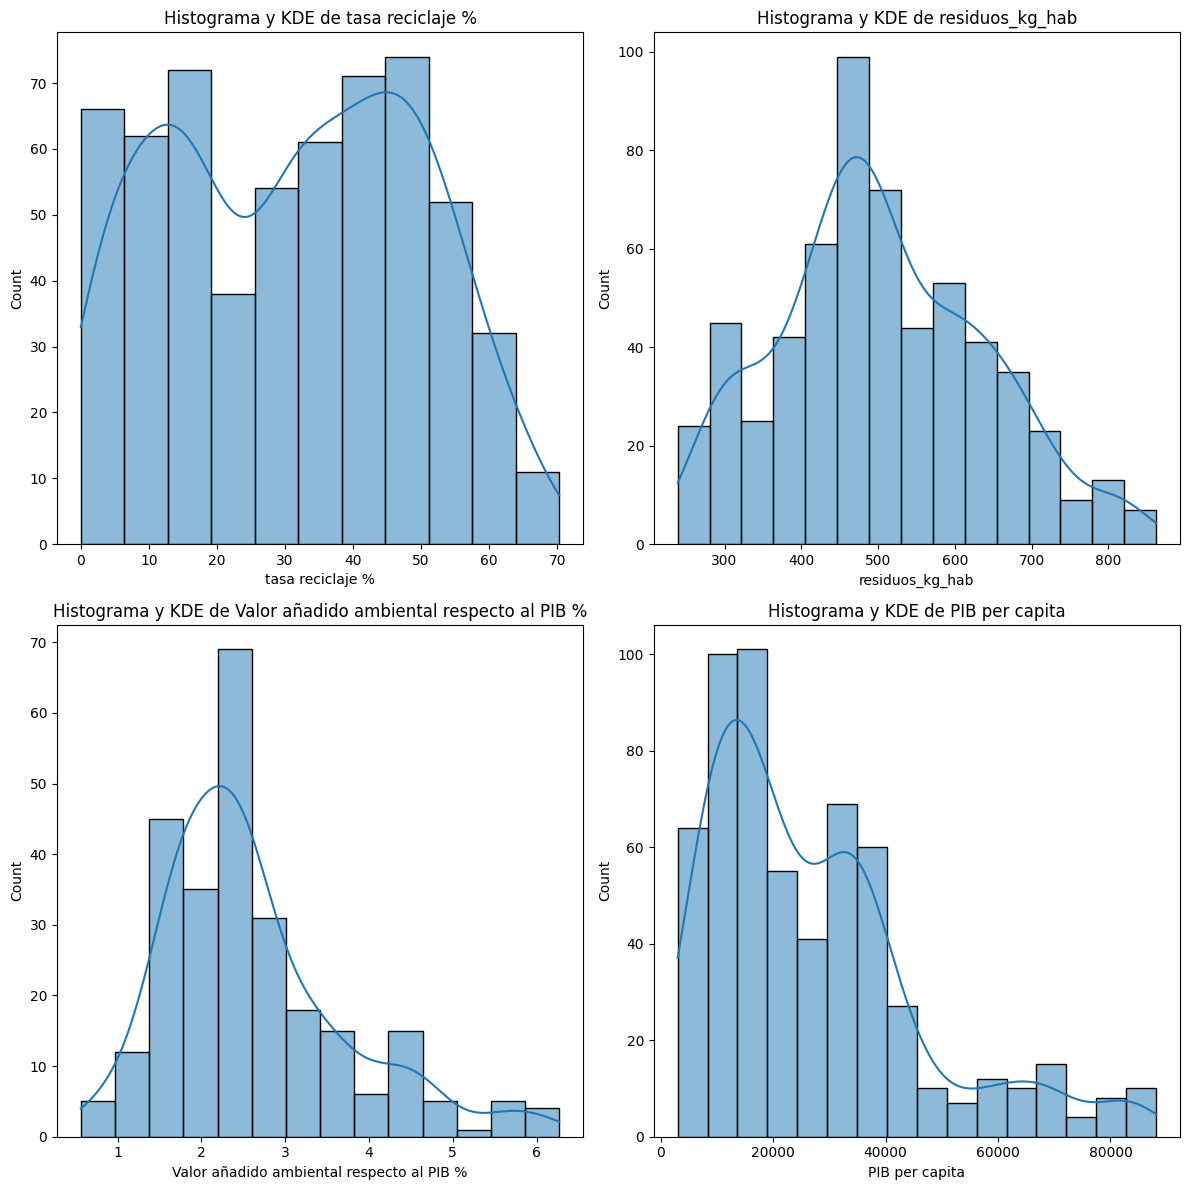

In [87]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])	
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_histo_den(df_eurostat_full,columnas_numericas_euro)

Ahora vamos a valorar si aislando el dato de los años 2018 a 2021 vemos cambios especialmente en el histograma de tasa de reciclaje. Efectivamente, nos permite observar datos con menos variación. El histograma muestra unos datos más cercanos a distribuciones normal con tendencia a concentrarse a la izquierda, salvo tasa de reciclaje, más a la derecha.

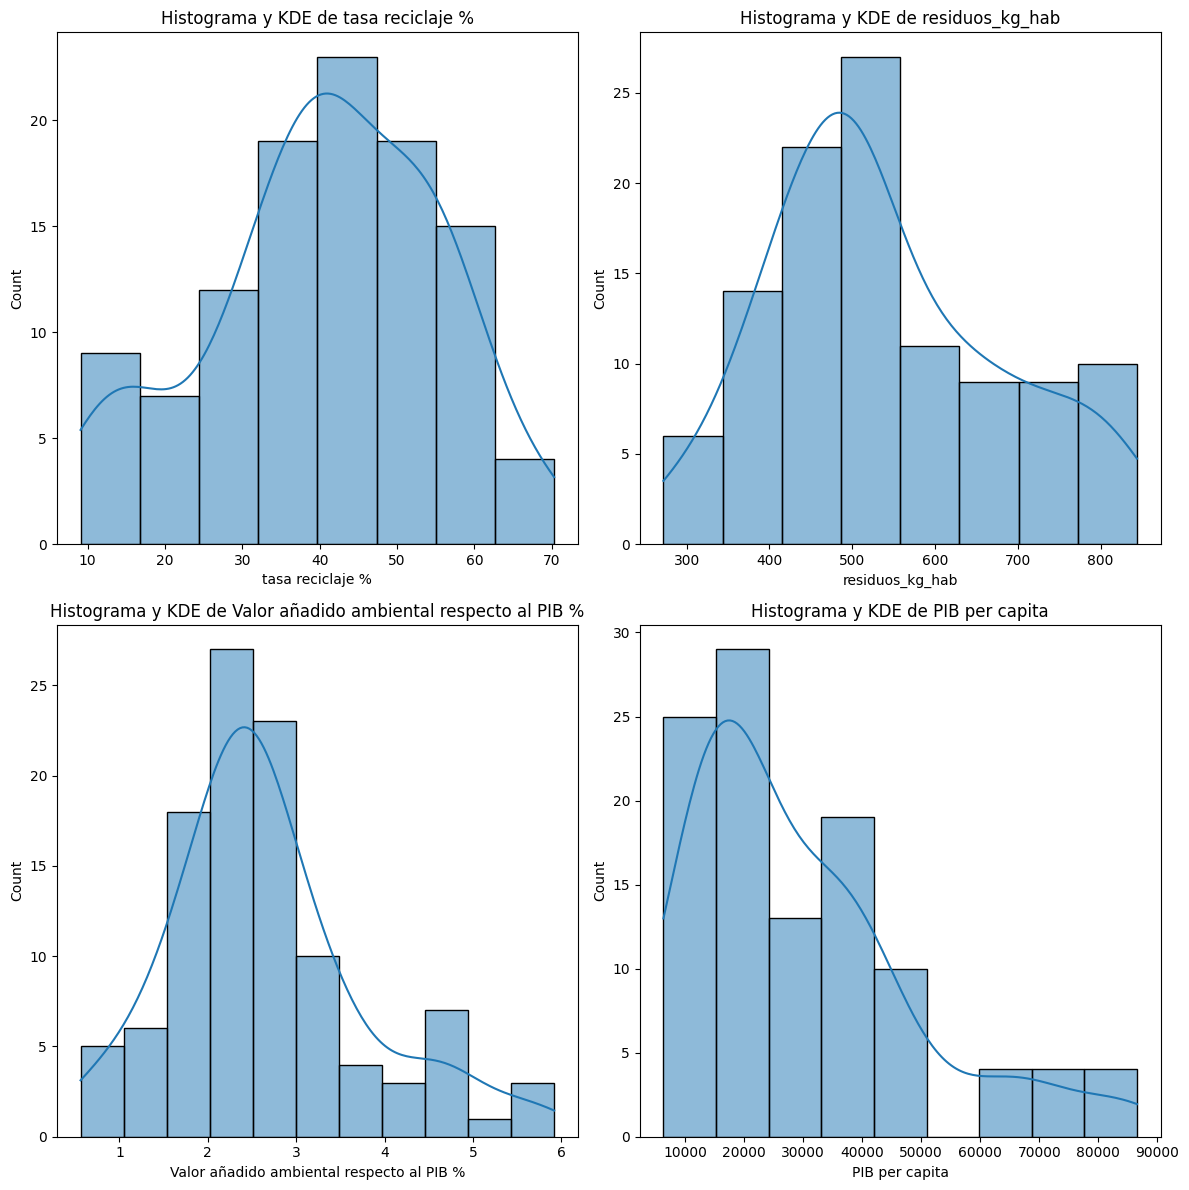

In [88]:
df_eurostat_full_1821 = df_eurostat_full[(df_eurostat_full['TIME_PERIOD'] >= 2018) & (df_eurostat_full['TIME_PERIOD'] <= 2021)]

plot_histo_den(df_eurostat_full_1821,columnas_numericas_euro)

#### 2.Análisis bivariante.


    2.1 Agrupados: agrupar por un campo categórico y calcular estadísticos como el conteo, la media, suma...
    
    


In [89]:
df_eurostat_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   geo                                        593 non-null    object 
 1   TIME_PERIOD                                593 non-null    int64  
 2   tasa reciclaje %                           593 non-null    float64
 3   country                                    593 non-null    object 
 4   group                                      593 non-null    object 
 5   residuos_kg_hab                            593 non-null    float64
 6   PIB per capita                             593 non-null    float64
 7   Valor añadido ambiental respecto al PIB %  266 non-null    float64
 8   Grupo residuos/hab                         593 non-null    object 
 9   Rango de residuos (kg/hab)                 593 non-null    object 
dtypes: float64(4), int64(1), o

In [90]:
df_eurostat_full.groupby("group")["tasa reciclaje %"].describe()

count       mean        std   min     25%    50%     75%   max
group                                                                 
Baltic   66.0  19.303030  14.991433   0.0   4.925  20.10  28.275  52.6
East    154.0  19.532468  14.851310   0.0   7.475  15.65  31.725  60.8
North    87.0  41.570115   5.358738  30.6  38.250  41.80  45.700  57.6
South   132.0  20.202273  11.959221   3.0  11.200  17.10  29.400  51.9
West    154.0  51.093506   9.408699  24.5  46.425  52.40  56.900  70.3

In [91]:
df_eurostat_full_1821.groupby("group")["tasa reciclaje %"].describe()

count       mean        std   min     25%    50%     75%   max
group                                                                 
Baltic   12.0  38.325000   9.286562  25.2  29.950  40.35  44.550  52.6
East     28.0  36.407143  13.766248  11.1  32.150  35.55  41.200  60.8
North    16.0  43.787500   5.481469  36.9  40.400  42.20  46.000  57.6
South    24.0  27.458333  14.237883   9.1  16.875  23.90  38.225  51.9
West     28.0  55.085714   7.881564  40.7  52.225  55.00  57.900  70.3

In [92]:
df_eurostat_full.groupby("group")["residuos_kg_hab"].describe()

count        mean         std    min     25%    50%    75%    max
group                                                                    
Baltic   66.0  388.621212   53.310344  271.0  350.50  391.5  433.0  483.0
East    154.0  387.305195   97.679771  239.0  307.25  380.0  457.0  612.0
North    87.0  563.413793  144.576652  361.0  458.50  491.0  683.0  862.0
South   132.0  549.007576   85.781855  412.0  480.25  521.5  633.5  729.0
West    154.0  598.538961   93.288514  409.0  533.25  593.5  663.0  835.0

In [93]:
df_eurostat_full_1821.groupby("group")["residuos_kg_hab"].describe()

count        mean         std    min     25%    50%     75%    max
group                                                                     
Baltic   12.0  436.333333   41.998557  369.0  402.50  450.0  473.50  483.0
East     28.0  418.250000   82.501010  272.0  358.00  415.0  488.75  570.0
North    16.0  636.500000  151.385160  418.0  525.50  619.5  770.75  844.0
South    24.0  548.500000   78.772098  449.0  498.00  513.0  629.50  697.0
West     28.0  640.571429  123.697489  409.0  550.75  625.0  735.50  835.0

In [94]:
df_eurostat_full.groupby("group")["Valor añadido ambiental respecto al PIB %"].describe()

count      mean       std   min     25%    50%     75%   max
group                                                               
Baltic   28.0  3.041071  1.049735  1.73  2.2775  2.710  4.0500  4.92
East     60.0  2.071500  0.677342  0.56  1.6200  2.300  2.4525  4.12
North    33.0  4.106364  1.187613  2.79  3.2500  3.510  5.5100  6.27
South    44.0  1.991364  0.600057  0.99  1.6750  2.165  2.3025  3.66
West    101.0  2.603465  0.953514  1.55  1.8100  2.330  3.1500  4.81

In [95]:
df_eurostat_full_1821.groupby("group")["Valor añadido ambiental respecto al PIB %"].describe()

count      mean       std   min     25%    50%     75%   max
group                                                               
Baltic   12.0  3.307500  1.024945  2.20  2.4975  2.840  4.4225  4.92
East     28.0  1.910714  0.695450  0.56  1.5700  2.215  2.4325  2.96
North    15.0  4.092000  1.023595  2.89  3.3400  3.660  4.7600  5.92
South    24.0  2.136250  0.625166  0.99  1.8350  2.220  2.5225  3.66
West     28.0  2.816429  0.931416  1.60  2.2275  2.760  3.1825  4.81

In [96]:
df_eurostat_full.groupby("group")["PIB per capita"].describe()

count          mean           std      min      25%      50%      75%  \
group                                                                           
Baltic   66.0  10539.545455   2733.774191   5230.0   8697.5  10545.0  12485.0   
East    154.0  11015.389610   4590.574192   2990.0   6912.5  10415.0  14847.5   
North    87.0  46897.241379  12779.583435  30510.0  36910.0  42920.0  56390.0   
South   132.0  21029.545455   4094.233119  13480.0  17005.0  21490.0  24050.0   
West    154.0  44198.246753  17654.293082  28910.0  32392.5  35760.0  53597.5   

            max  
group            
Baltic  16350.0  
East    21350.0  
North   71160.0  
South   28740.0  
West    88120.0

In [97]:
df_eurostat_full_1821.groupby("group")["PIB per capita"].describe()

count          mean           std      min      25%      50%      75%  \
group                                                                           
Baltic   12.0  13968.333333   1447.291096  11940.0  12727.5  14060.0  15005.0   
East     28.0  13744.642857   4588.600595   6330.0   9525.0  13500.0  17547.5   
North    16.0  49953.125000  12787.698109  36220.0  41475.0  46480.0  55267.5   
South    24.0  22254.166667   3692.641233  16150.0  18165.0  23260.0  24977.5   
West     28.0  46768.928571  18078.108787  30630.0  35480.0  37215.0  60565.0   

            max  
group            
Baltic  16350.0  
East    21350.0  
North   71160.0  
South   27230.0  
West    86540.0

    2.2 Gráficas: summary tables (describe de pandas), scatter plots, diagrama de barras, cross table o binning


    2.2.1  Correlación tasa de reciclaje y residuos_kg


Primero planteamos la correlación por año de tasa de reciclaje de las dos variables que más creemos que pueden influir: residuos_kg hab y PIB per capita.Para el data frame total y para el período 2018-2021. Después pasamos a ver gráficos de correlación. 

In [98]:
# Calcular la correlación entre la tasa de reciclaje y los residuos por habitante (kg) por año
correlation_recycling_residues = df_eurostat_full.groupby('TIME_PERIOD')['tasa reciclaje %'].corr(df_eurostat_full['residuos_kg_hab'])

# Calcular la correlación entre la tasa de reciclaje y el PIB per cápita por año
correlation_recycling_PIB = df_eurostat_full.groupby('TIME_PERIOD')['tasa reciclaje %'].corr(df_eurostat_full['PIB per capita'])

# Crear un DataFrame con los resultados de correlación
df_correlation_by_year = pd.DataFrame({
    'Correlación Tasa-Residuos': correlation_recycling_residues,
    'Correlación Tasa-PIB': correlation_recycling_PIB
})

# Especificar la ruta del archivo Excel
excel_file_path = "../data/correlacion_reciclaje_por_anio.xlsx"

# Guardar el DataFrame en un archivo Excel
df_correlation_by_year.to_excel(excel_file_path)

print(f"Los resultados se han guardado en el archivo: {excel_file_path}")


Los resultados se han guardado en el archivo: ../data/correlacion_reciclaje_por_anio.xlsx


In [99]:
# Calcular la correlación entre la tasa de reciclaje y los residuos por habitante (kg) por año
correlation_recycling_residues = df_eurostat_full_1821.groupby('TIME_PERIOD')['tasa reciclaje %'].corr(df_eurostat_full_1821['residuos_kg_hab'])

# Calcular la correlación entre la tasa de reciclaje y el PIB per cápita por año
correlation_recycling_PIB = df_eurostat_full_1821.groupby('TIME_PERIOD')['tasa reciclaje %'].corr(df_eurostat_full_1821['PIB per capita'])

# Crear un DataFrame con los resultados de correlación
df_correlation_by_year = pd.DataFrame({
    'Correlación Tasa-Residuos': correlation_recycling_residues,
    'Correlación Tasa-PIB': correlation_recycling_PIB
})

# Especificar la ruta del archivo Excel
excel_file_path = "../data/correlacion_reciclaje_por_18_21.xlsx"

# Guardar el DataFrame en un archivo Excel
df_correlation_by_year.to_excel(excel_file_path)

print(f"Los resultados se han guardado en el archivo: {excel_file_path}")


Los resultados se han guardado en el archivo: ../data/correlacion_reciclaje_por_18_21.xlsx


Mediante el gráfico observamos que aparentemente no están correladas linealmente las variables residuos_kg_hab y tasa de reciclaje. Por lo tanto, podría apuntar a que no necesariamente los países que tienen menor generación de residuos están consiguiendo mejores tasas de reciclaje.

Para todo el período.

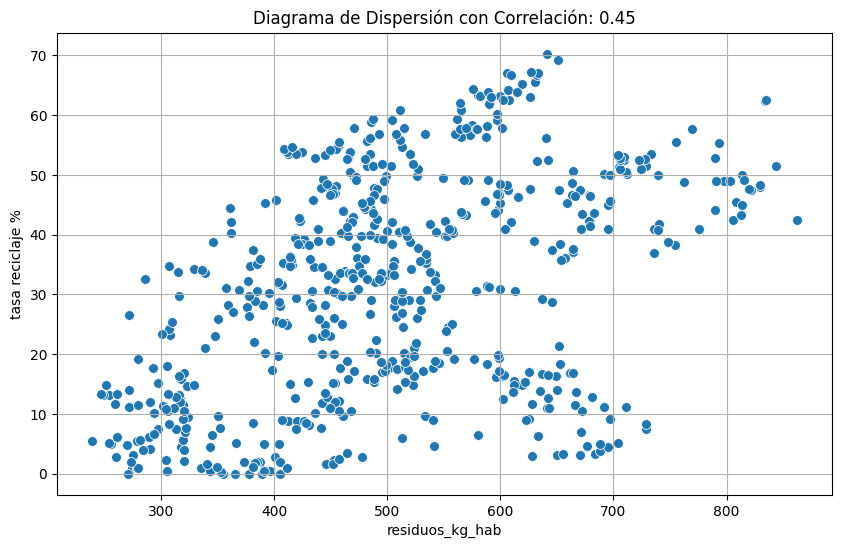

In [100]:
import sys
sys.path.insert(0, '../utils')

from bootcampviztools import grafico_dispersion_con_correlacion
grafico_dispersion_con_correlacion(df_eurostat_full, "residuos_kg_hab", "tasa reciclaje %",50, mostrar_correlacion = True)

En el período 2018-2021

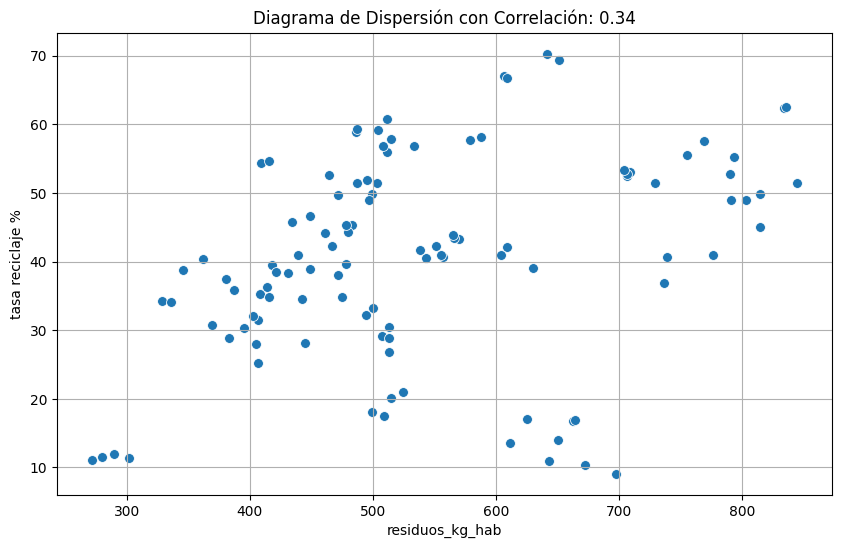

In [101]:
import sys
sys.path.insert(0, '../utils')

from bootcampviztools import grafico_dispersion_con_correlacion
grafico_dispersion_con_correlacion(df_eurostat_full_1821, "residuos_kg_hab", "tasa reciclaje %",50, mostrar_correlacion = True)

Se va a evaluar con el coeficiente de Pearson la correlación. Un coeficiente de Pearson de 1 indica una correlación lineal perfecta y positiva entre dos variables. Esto significa que a medida que una variable aumenta, la otra variable también aumenta en la misma proporción. En otras palabras, cuando el coeficiente de Pearson es 1, los puntos de datos se alinean perfectamente en una línea recta ascendente en un gráfico de dispersión.

Por otro lado, un coeficiente de Pearson de 0.45 indica una correlación positiva moderada entre dos variables. Esto sugiere que hay una relación positiva entre las variables, pero no es tan fuerte como una correlación de 1. En un gráfico de dispersión, los puntos de datos tienden a agruparse en una dirección ascendente, pero puede haber más dispersión alrededor de la línea de tendencia. Similar resultado estudiando los años 2018-2021 pero vemos que ha caído hasta 0,36 la correlación.

In [102]:
df_eurostat_full[["residuos_kg_hab", "tasa reciclaje %"]].corr()

from scipy.stats import pearsonr

pearsonr(df_eurostat_full["residuos_kg_hab"], df_eurostat_full["tasa reciclaje %"], alternative= "less")



PearsonRResult(statistic=0.45388675998538547, pvalue=1.0)

In [103]:
df_eurostat_full[["residuos_kg_hab", "tasa reciclaje %"]].corr()

from scipy.stats import pearsonr

pearsonr(df_eurostat_full_1821["residuos_kg_hab"], df_eurostat_full_1821["tasa reciclaje %"], alternative= "less")


PearsonRResult(statistic=0.3375307920231848, pvalue=0.9998230967487487)

Este estudio de correlación se va a hacer por grupos de países, primero por los grupos de países en función de zona geográfica.

Para todo el período del estudio, 2000-2021

Grupo: West


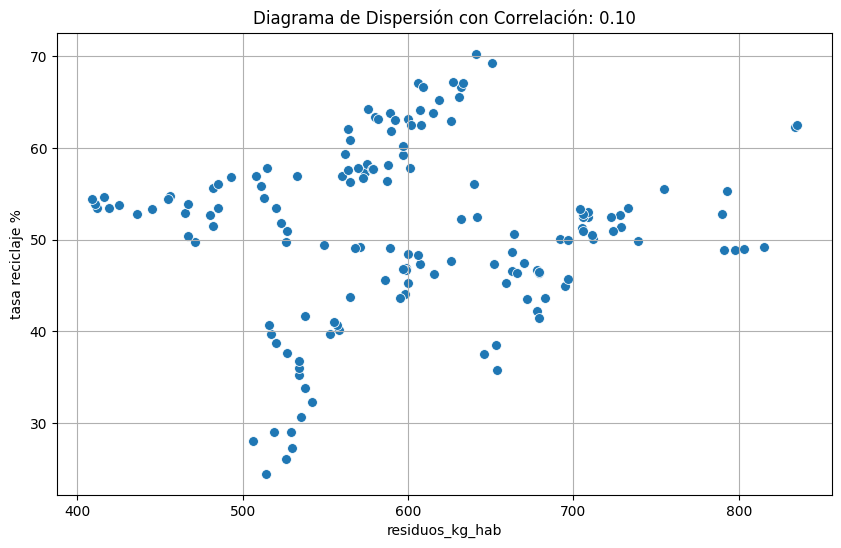

Grupo: East


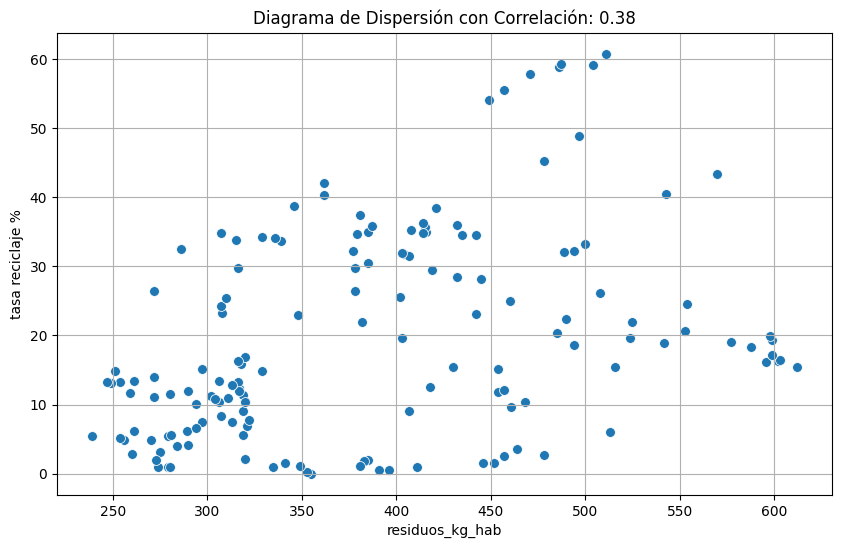

Grupo: South


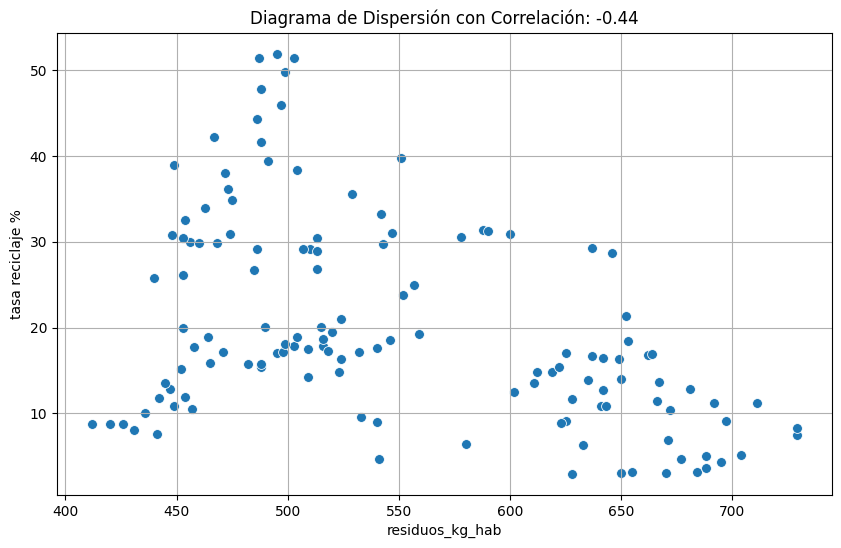

Grupo: North


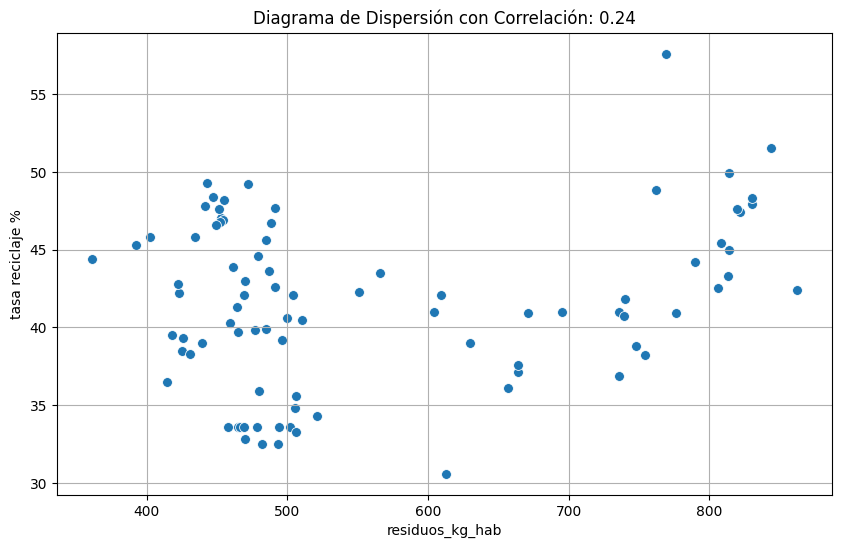

Grupo: Baltic


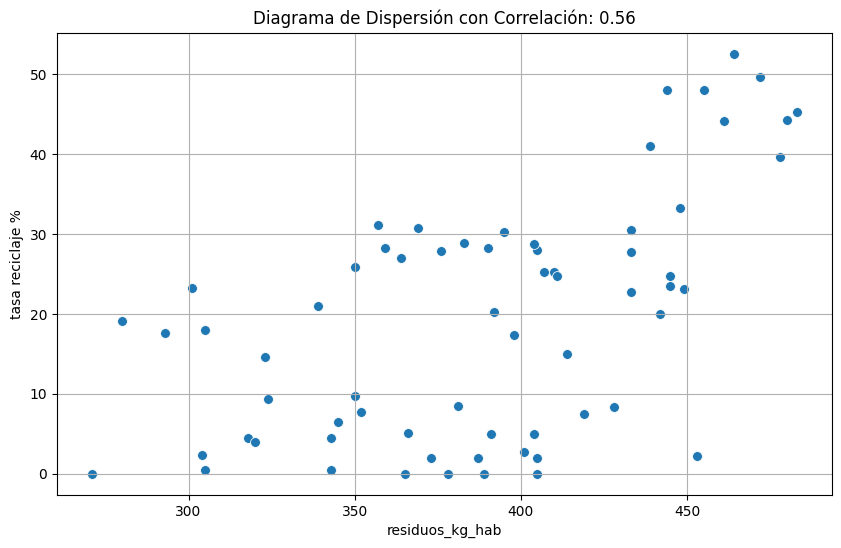

In [104]:
import sys
sys.path.insert(0, '../utils')
from bootcampviztools import grafico_dispersion_con_correlacion

# Iterar sobre cada valor único en la columna "group"
for group_value in df_eurostat_full['group'].unique():
    # Filtrar el DataFrame para el valor de "group" actual
    df_group = df_eurostat_full[df_eurostat_full['group'] == group_value]
    
    # Imprimir el nombre del grupo como parte del título del gráfico
    print("Grupo:", group_value)
    
    # Crear el gráfico de dispersión con correlación para la columna "residuos_kg_hab" y "tasa reciclaje %"
    grafico_dispersion_con_correlacion(df_group, "residuos_kg_hab", "tasa reciclaje %", 50, mostrar_correlacion=True)


Para el período 2018-2021

C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\1480706559.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_group = df_eurostat_full_1821[df_eurostat_full['group'] == group_value]


Grupo: West


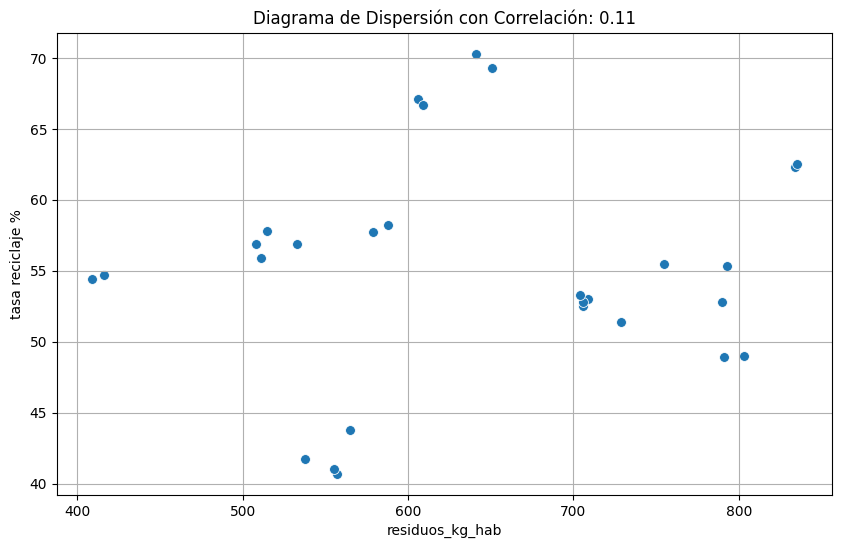

C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\1480706559.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_group = df_eurostat_full_1821[df_eurostat_full['group'] == group_value]


Grupo: East


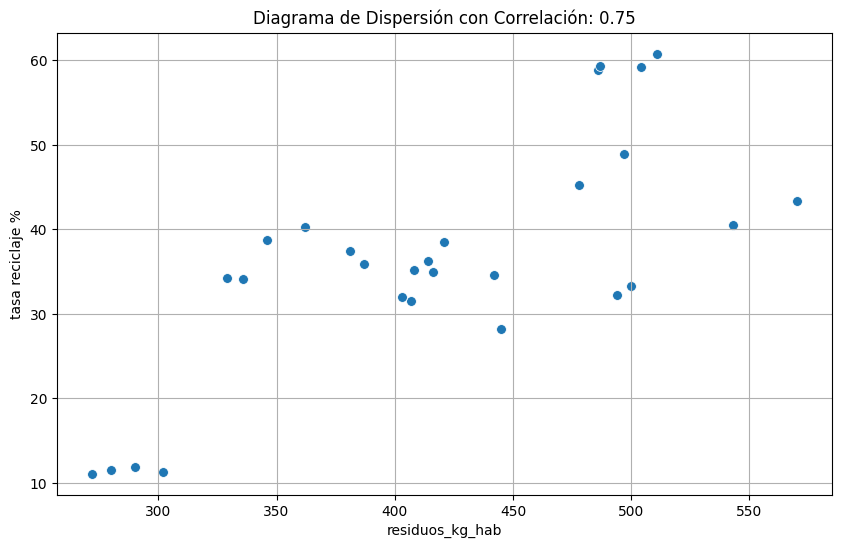

C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\1480706559.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_group = df_eurostat_full_1821[df_eurostat_full['group'] == group_value]


Grupo: South


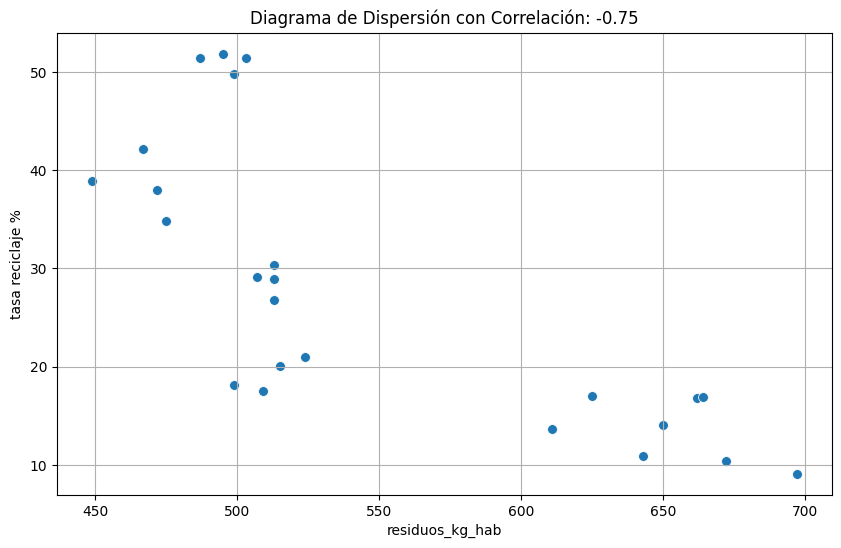

C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\1480706559.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_group = df_eurostat_full_1821[df_eurostat_full['group'] == group_value]


Grupo: North


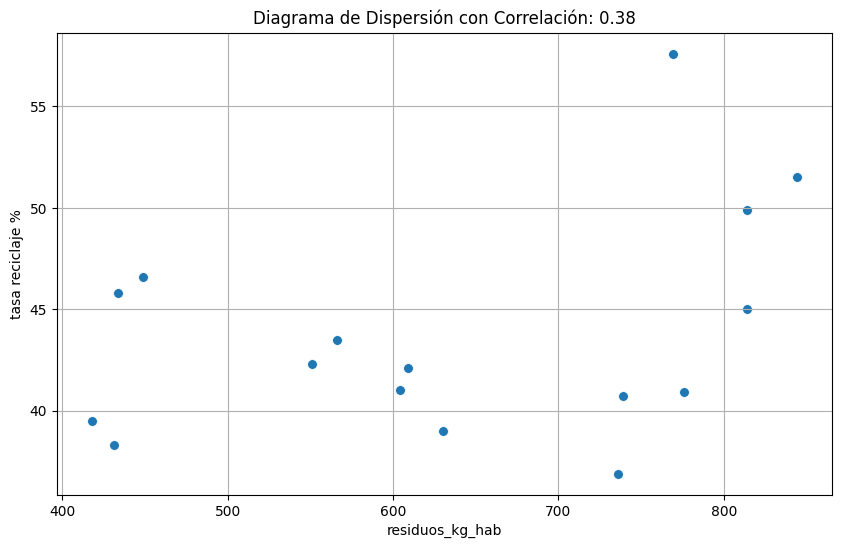

C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\1480706559.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_group = df_eurostat_full_1821[df_eurostat_full['group'] == group_value]


Grupo: Baltic


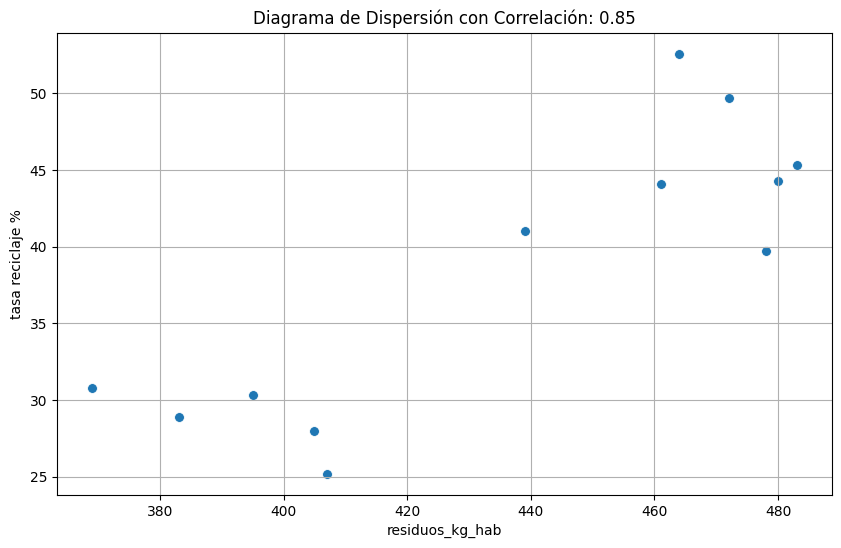

In [105]:
import sys
sys.path.insert(0, '../utils')
from bootcampviztools import grafico_dispersion_con_correlacion

# Iterar sobre cada valor único en la columna "group"
for group_value in df_eurostat_full_1821['group'].unique():
    # Filtrar el DataFrame para el valor de "group" actual
    df_group = df_eurostat_full_1821[df_eurostat_full['group'] == group_value]
    
    # Imprimir el nombre del grupo como parte del título del gráfico
    print("Grupo:", group_value)
    
    # Crear el gráfico de dispersión con correlación para la columna "residuos_kg_hab" y "tasa reciclaje %"
    grafico_dispersion_con_correlacion(df_group, "residuos_kg_hab", "tasa reciclaje %", 50, mostrar_correlacion=True)



Veamos el coeficiente por grupo numéricamente.

Para el período 2000-2021: 
- Baltic: El coeficiente de correlación de Pearson indica una correlación positiva moderada entre las variables en este grupo. El valor p asociado es extremadamente pequeño lo que sugiere que esta correlación es estadísticamente significativa a un nivel de confianza muy alto.

- East: El coeficiente de correlación de Pearson indica una correlación positiva más débil que en el grupo Baltic. Sin embargo, el valor p asociado sigue siendo muy pequeño , lo que indica que esta correlación también es estadísticamente significativa.

- North: El coeficiente de correlación de Pearson sugiere una correlación positiva más débil en comparación con los grupos anteriores. El valor p asociado indica que la correlación es significativa pero menos fuerte que en los grupos anteriores.

- South: El coeficiente de correlación de Pearson indica una correlación negativa moderada entre las variables en este grupo. El valor p asociado es extremadamente pequeño lo que sugiere que esta correlación es estadísticamente significativa a un nivel de confianza muy alto. Los países que lideran la correlación negativa son Spain, Cyprus e Italy.

- West: El coeficiente de correlación de Pearson sugiere una correlación positiva muy débil o casi nula en este grupo. El valor p asociado indica que esta correlación no es estadísticamente significativa a un nivel de confianza convencional. Podría deberse a un grupo de países muy heterogéneo.

En resumen, los grupos Baltic y East muestran correlaciones positivas significativas entre las variables, mientras que los grupos North y West muestran correlaciones más débiles y menos significativas. El grupo South muestra una correlación negativa significativa entre las variables.

In [107]:
from scipy.stats import pearsonr

# Definir una función para calcular el coeficiente de correlación de Pearson y p-valor para cada grupo
def calcular_pearson_por_grupo(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["residuos_kg_hab"], df["tasa reciclaje %"])
    return coef_pearson, p_valor

# Calcular el coeficiente de correlación de Pearson para cada grupo
resultados_pearson_por_grupo = df_eurostat_full.groupby("group").apply(calcular_pearson_por_grupo)

# Mostrar los resultados
resultados_pearson_por_grupo



C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\4200912331.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_grupo = df_eurostat_full.groupby("group").apply(calcular_pearson_por_grupo)


group
Baltic        (0.563978060982954, 8.173330295468795e-07)
East        (0.3798263997733506, 1.1830690407767958e-06)
North        (0.23574308724022044, 0.027938978331390845)
South     (-0.43862667795102844, 1.4360257311370063e-07)
West          (0.10262911709703858, 0.20531101016713088)
dtype: object

Para el período 2018-2021: 
- Baltic: El coeficiente de correlación de Pearson indica una correlación positiva muy alta entre las variables en este grupo. El valor p asociado es extremadamente pequeño lo que sugiere que esta correlación es estadísticamente significativa a un nivel de confianza muy alto.

- East: El coeficiente de correlación de Pearson indica una correlación positiva muy alta. El valor p asociado sigue siendo muy pequeño, lo que indica que esta correlación también es estadísticamente significativa.

- North: El coeficiente de correlación de Pearson sugiere una correlación positiva más débil en comparación con los grupos anteriores. El valor p asociado indica que la correlación es significativa pero menos fuerte que en los grupos anteriores.

- South: El coeficiente de correlación de Pearson indica una correlación negativa muy fuerte entre las variables en este grupo. El valor p asociado es extremadamente pequeño lo que sugiere que esta correlación es estadísticamente significativa a un nivel de confianza muy alto. Los países que lideran la correlación negativa son Spain, Cyprus e Italy.

- West: El coeficiente de correlación de Pearson sugiere una correlación positiva muy débil o casi nula en este grupo. El valor p asociado indica que esta correlación no es estadísticamente significativa a un nivel de confianza convencional. Podría deberse a un grupo de países muy heterogéneo.

En resumen, en los últimos años, la correlación se ha hecho más fuerte, salvo west, lo que ha influido en el descenso de la correlación, por correlación positiva más fuerte en el grupo South.

In [108]:
from scipy.stats import pearsonr

# Definir una función para calcular el coeficiente de correlación de Pearson y p-valor para cada grupo
def calcular_pearson_por_grupo(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["residuos_kg_hab"], df["tasa reciclaje %"])
    return coef_pearson, p_valor

# Calcular el coeficiente de correlación de Pearson para cada grupo
resultados_pearson_por_grupo = df_eurostat_full_1821.groupby("group").apply(calcular_pearson_por_grupo)

# Mostrar los resultados
resultados_pearson_por_grupo



C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\1428014090.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_grupo = df_eurostat_full_1821.groupby("group").apply(calcular_pearson_por_grupo)


group
Baltic      (0.8492523822118307, 0.0004733124722507585)
East        (0.7459409602777048, 5.205581826229092e-06)
North         (0.3833232978487172, 0.14275971326590786)
South     (-0.7543688868832228, 2.0598104467281527e-05)
West          (0.10639812620819013, 0.5899759129372434)
dtype: object

Revisamos cada grupo de países

In [110]:
from scipy.stats import pearsonr

# Definir una función para calcular el coeficiente de correlación de Pearson y p-valor para cada país en el grupo 
def calcular_pearson_por_pais(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["residuos_kg_hab"], df["tasa reciclaje %"])
    return coef_pearson, p_valor

En el grupo Baltic, Estonia, sería el único con correlación negativa para 2000-2021, y en el período 2018-2021 Lituania pasa a correlación negativa, pero menos significativo.

In [111]:
# Filtrar el DataFrame para el grupo ""
df_group = df_eurostat_full[df_eurostat_full["group"] == "Baltic"]

# Calcular el coeficiente de correlación de Pearson para cada país en el grupo 
resultados_pearson_por_pais = df_group.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
print("2000-2021 Grupo Baltic")
print(resultados_pearson_por_pais)

# Filtrar el DataFrame para el grupo 
df_group18 = df_eurostat_full_1821[df_eurostat_full_1821["group"] == "Baltic"]

# Calcular el coeficiente de correlación de Pearson para cada país en el grupo 
resultados_pearson_por_pais18 = df_group18.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
print("")
print("2000-2018 Grupo Baltic")
print(resultados_pearson_por_pais18)

2000-2021 Grupo Baltic
country
Estonia         (-0.09886819125721684, 0.661575409246016)
Latvia       (0.8705110097512718, 1.3868858560344934e-07)
Lithuania    (0.8969196380637887, 1.5878510227083546e-08)
dtype: object

2000-2018 Grupo Baltic
country
Estonia        (-0.6956016012566635, 0.3043983987433365)
Latvia          (0.808103960582857, 0.19189603941714295)
Lithuania    (-0.9655302386269868, 0.034469761373013164)
dtype: object


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\1932677569.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_pais = df_group.groupby("country").apply(calcular_pearson_por_pais)
C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\1932677569.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_pais18 = df_group18.groupby("country").apply(calcular_pearson_por_pai

En los países del grupo East, hay basntantes países con correlación negativa, como Rumanía, pero en positivo Eslovaquia o R. Checa impulsan hacia la correlación positiva. En el período 2018, la correlación positiva se hace más fuerte pos los mismos países y el papel de Polonia. 

In [112]:
# Filtrar el DataFrame para el grupo ""
df_group = df_eurostat_full[df_eurostat_full["group"] == "East"]

# Calcular el coeficiente de correlación de Pearson para cada país en el grupo 
resultados_pearson_por_pais = df_group.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
print("2000-2021 Grupo East")
print(resultados_pearson_por_pais)

# Filtrar el DataFrame para el grupo 
df_group18 = df_eurostat_full_1821[df_eurostat_full_1821["group"] == "East"]

# Calcular el coeficiente de correlación de Pearson para cada país en el grupo 
resultados_pearson_por_pais18 = df_group18.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
print("")
print("2000-2018 Grupo East")
print(resultados_pearson_por_pais18)

2000-2021 Grupo East
country
Bulgaria     (-0.9196396417113478, 1.450310450086988e-09)
Czechia       (0.7977037990619551, 8.720302156882764e-06)
Hungary     (-0.8721774271104766, 1.2272078595463924e-07)
Poland         (0.4655528262978309, 0.028998598671404863)
Romania     (-0.9294234439030028, 4.1266917251838974e-10)
Slovakia      (0.9708961169177237, 6.978767539740424e-14)
Slovenia       (-0.09597118408673384, 0.6709446262272949)
dtype: object

2000-2018 Grupo East
country
Bulgaria       (-0.3873515965552289, 0.612648403444771)
Czechia      (0.9951737723989338, 0.004826227601066213)
Hungary      (-0.6211873460275075, 0.37881265397249253)
Poland       (0.9377645004376802, 0.062235499562319774)
Romania        (0.3011693009684182, 0.6988306990315818)
Slovakia    (0.9942134251349914, 0.0057865748650085536)
Slovenia      (0.7767372408239545, 0.22326275917604566)
dtype: object


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\1893359191.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_pais = df_group.groupby("country").apply(calcular_pearson_por_pais)
C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\1893359191.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_pais18 = df_group18.groupby("country").apply(calcular_pearson_por_pai

En el grupo North, la correlación es baja, debido a que Dinamarca, Finlandia y Suecia tienen correlación positiva alta pero Noruega compensa en el lado negativo. Mientras que en el período más reducido de 2018-2021, todos los países pasan a una correlación negativa, aunque menor en el caso de Noruega, salvo Suecia. No son significativos.

In [113]:
# Filtrar el DataFrame para el grupo ""
df_group = df_eurostat_full[df_eurostat_full["group"] == "North"]

# Calcular el coeficiente de correlación de Pearson para cada país en el grupo 
resultados_pearson_por_pais = df_group.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
print("2000-2021 Grupo North")
print(resultados_pearson_por_pais)

# Filtrar el DataFrame para el grupo 
df_group18 = df_eurostat_full_1821[df_eurostat_full_1821["group"] == "North"]

# Calcular el coeficiente de correlación de Pearson para cada país en el grupo 
resultados_pearson_por_pais18 = df_group18.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
print("")
print("2000-2018 Grupo North")
print(resultados_pearson_por_pais18)

2000-2021 Grupo North
country
Denmark     (0.6466287163328558, 0.0015370483447053758)
Finland     (0.6740520267188047, 0.0005823392810679753)
Norway     (-0.46355182177336024, 0.029789422480644277)
Sweden         (0.400904205651056, 0.06444582890782301)
dtype: object

2000-2018 Grupo North
country
Denmark    (-0.5849336921927352, 0.41506630780726494)
Finland    (-0.7886466436697552, 0.21135335633024477)
Norway      (-0.23365878761257786, 0.766341212387422)
Sweden      (0.7526420348501507, 0.24735796514984942)
dtype: object


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\1796041559.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_pais = df_group.groupby("country").apply(calcular_pearson_por_pais)
C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\1796041559.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_pais18 = df_group18.groupby("country").apply(calcular_pearson_por_pai

El grupo South, único con correlación negativa, vemos que tiene países con correlaciones opuestas: correlación muy negativa en Italia, España o Chipre. Muy positiva en Grecia y positiva en Portugal. En el perído 2018-2021, los países con correlaciones negativas se mantienen pero se reduce el coeficiente notablemente, pero algunos países como Portugal o Malta también pasan a correlación negativa. España reduce en correlación negativa.

In [114]:
# Filtrar el DataFrame para el grupo ""
df_group = df_eurostat_full[df_eurostat_full["group"] == "South"]

# Calcular el coeficiente de correlación de Pearson para cada país en el grupo 
resultados_pearson_por_pais = df_group.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
print("2000-2021 Grupo South")
print(resultados_pearson_por_pais)

# Filtrar el DataFrame para el grupo 
df_group18 = df_eurostat_full_1821[df_eurostat_full_1821["group"] == "South"]

# Calcular el coeficiente de correlación de Pearson para cada país en el grupo 
resultados_pearson_por_pais18 = df_group18.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
print("")
print("2000-2018 Grupo South")
print(resultados_pearson_por_pais18)


2000-2021 Grupo South
country
Cyprus       (-0.39040650380780334, 0.07243998182666778)
Greece       (0.8190701697103968, 3.140765903583688e-06)
Italy       (-0.7099073038437055, 0.0002148458958659363)
Malta         (0.011316392876509661, 0.9601370145448068)
Portugal        (0.3770240967880974, 0.0836895683317668)
Spain        (-0.5866878189333233, 0.004104029485896578)
dtype: object

2000-2018 Grupo South
country
Cyprus      (-0.038077067995879385, 0.9619229320041207)
Greece        (0.8413385770833007, 0.15866142291669938)
Italy        (-0.28287292479556203, 0.7171270752044379)
Malta       (-0.9647329394759866, 0.035267060524013516)
Portugal      (-0.1342312110428056, 0.8657687889571943)
Spain         (-0.3708371061234239, 0.6291628938765761)
dtype: object


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\2653528016.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_pais = df_group.groupby("country").apply(calcular_pearson_por_pais)
C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\2653528016.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_pais18 = df_group18.groupby("country").apply(calcular_pearson_por_pai

El grupo de países West, presentaba una correlación positiva débil, a pesar de tener países con alta correlación positiva: Suiza, Austria, Luxemburgo, Francia o Austria. Se debe a que Holanda presenta una correlación negativa de 0,86 y Alemania del 0,12. Es llamativo ver como estudiando el período limitado a 2018-2021, las correlaciones en general crecen en el mismo sentido, salvo Luxemburgo u Holanda.

In [115]:
# Filtrar el DataFrame para el grupo ""
df_group = df_eurostat_full[df_eurostat_full["group"] == "West"]

# Calcular el coeficiente de correlación de Pearson para cada país en el grupo 
resultados_pearson_por_pais = df_group.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
print("2000-2021 Grupo West")
print(resultados_pearson_por_pais)

# Filtrar el DataFrame para el grupo 
df_group18 = df_eurostat_full_1821[df_eurostat_full_1821["group"] == "West"]

# Calcular el coeficiente de correlación de Pearson para cada país en el grupo 
resultados_pearson_por_pais18 = df_group18.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
print("")
print("2000-2018 Grupo West")
print(resultados_pearson_por_pais18)

2000-2021 Grupo West
country
Austria           (0.41928382176826945, 0.05208810846816189)
Belgium           (-0.01246719308669128, 0.9560868249300476)
France            (0.5702106768664207, 0.005591917902702128)
Germany            (0.12600440390493073, 0.5763327687432004)
Luxembourg       (0.5972576281559157, 0.0033364091065532426)
Netherlands    (-0.8699052905619483, 1.4493398698072336e-07)
Switzerland     (0.7324316244082422, 0.00010626486106005183)
dtype: object

2000-2018 Grupo West
country
Austria        (0.9981303827524387, 0.0018696172475611839)
Belgium         (-0.30034741700476747, 0.6996525829952325)
France           (0.40961008623971146, 0.5903899137602886)
Germany          (0.9022548309613325, 0.09774516903866748)
Luxembourg      (-0.42493218890877843, 0.5750678110912215)
Netherlands       (0.1599892108873717, 0.8400107891126283)
Switzerland     (-0.24014605321403423, 0.7598539467859657)
dtype: object


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\4262893118.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_pais = df_group.groupby("country").apply(calcular_pearson_por_pais)
C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\4262893118.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_pais18 = df_group18.groupby("country").apply(calcular_pearson_por_pai

A modo de resumen se genera una tabla por país con su correlación y sus datos.

In [116]:
from scipy.stats import pearsonr

# Función para calcular el coeficiente de correlación de Pearson y p-valor para cada país
def calcular_pearson_por_pais(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["residuos_kg_hab"], df["tasa reciclaje %"])
    # Obtener la tasa de reciclaje promedio por país
    tasa_reciclaje = df["tasa reciclaje %"].mean()
    # Obtener la tasa de reciclaje promedio por país
    residuos_habitante = df["residuos_kg_hab"].mean()
    # Obtener la tasa de reciclaje promedio por país
    PIB_habitante = df["PIB per capita"].mean()
    # Crear una Serie con los resultados
    resultados = pd.Series({"Pearson": coef_pearson, "p-valor": p_valor, "Tasa de reciclaje (%)": tasa_reciclaje, "Residuos kg habitante": residuos_habitante,"PIB habitante":PIB_habitante})
    return resultados

# Calcular el coeficiente de correlación de Pearson para cada país en el DataFrame completo
resultados_pearson_por_pais = df_eurostat_full.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
resultados_pearson_por_pais

# Especificar la ruta del archivo Excel
excel_file_path = "../data/correlacion_reciclaje_residuo_pais.xlsx"

# Guardar el DataFrame en un archivo Excel
resultados_pearson_por_pais.to_excel(excel_file_path, index=False)

# Imprimir comprobación guardado
print("Guardado")

Guardado


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\1680473109.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_pais = df_eurostat_full.groupby("country").apply(calcular_pearson_por_pais)


In [117]:
# Calcular el coeficiente de correlación de Pearson para cada país en el DataFrame completo
resultados_pearson_por_pais = df_eurostat_full_1821.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
resultados_pearson_por_pais

# Especificar la ruta del archivo Excel
excel_file_path = "../data/correlacion_reciclaje_residuo_pais18_21.xlsx"

# Guardar el DataFrame en un archivo Excel
resultados_pearson_por_pais.to_excel(excel_file_path, index=False)

# Imprimir comprobación guardado
print("Guardado")

Guardado


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\175748420.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_pais = df_eurostat_full_1821.groupby("country").apply(calcular_pearson_por_pais)


Evaluamos la correlación por grupo de datos según percentil, la correlación es mayor cuantos menos residuos se generan, es decir, si se generan más residuos se recicla más en países que generan una cantidad inferior a la mediana. Sin embargo, en países de más volumen de residuos, la correlación se vuelve negativa o positiva débil. No se recicla más por generar más residuos.

In [118]:
from scipy.stats import pearsonr

# Definir una función para calcular el coeficiente de correlación de Pearson y p-valor para cada grupo
def calcular_pearson_por_grupo(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["residuos_kg_hab"], df["tasa reciclaje %"])
    return coef_pearson, p_valor

# Calcular el coeficiente de correlación de Pearson para cada grupo
resultados_pearson_por_grupo = df_eurostat_full.groupby("Grupo residuos/hab").apply(calcular_pearson_por_grupo)

# Mostrar los resultados
print("Resultados 2000-2021")
print(resultados_pearson_por_grupo)

# Calcular el coeficiente de correlación de Pearson para cada grupo
resultados_pearson_por_grupo18 = df_eurostat_full_1821.groupby("Grupo residuos/hab").apply(calcular_pearson_por_grupo)

# Mostrar los resultados
print("Resultados 2018-2021")
print(resultados_pearson_por_grupo18)


Resultados 2000-2021
Grupo residuos/hab
Grupo 1 perc.0-0.25        (0.4414483245641298, 1.000008035604302e-08)
Grupo 2 perc.0.25-0.50    (0.22294275420441143, 0.0054497468276775325)
Grupo 3 perc.0.50-0.75     (-0.11867132081104374, 0.17533599917712767)
Grupo 4 perc.0.75-1         (0.009453980442114589, 0.9076661165590633)
dtype: object
Resultados 2018-2021
Grupo residuos/hab
Grupo 1 perc.0-0.25       (0.7337266188014614, 8.877391619300056e-06)
Grupo 2 perc.0.25-0.50     (0.019863000105431846, 0.9200880612722868)
Grupo 3 perc.0.50-0.75      (0.06000891678671559, 0.7805982710872773)
Grupo 4 perc.0.75-1        (0.24193083588473596, 0.21485053542187144)
dtype: object


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\3818845182.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_grupo = df_eurostat_full.groupby("Grupo residuos/hab").apply(calcular_pearson_por_grupo)
C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\3818845182.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_grupo18 = df_eurostat_full_1821.groupby("Grupo 

Llama la atención la evolución del percentil 4 a correlación 0.24, se analiza por país. Son Austria y Alemania, países con alta correlación positiva y los líderes el tasa de reciclado a pesar de estar en el grupo 4 de generadores de residuos.

In [119]:
# Filtrar el DataFrame para incluir solo el grupo "4.PERC"
df_grupo_4_perc = df_eurostat_full_1821[df_eurostat_full_1821["Grupo residuos/hab"] == "Grupo 4 perc.0.75-1"]

# Calcular el coeficiente de correlación de Pearson para cada país dentro del grupo "4.PERC"
resultados_pearson_grupo_4_perc = df_grupo_4_perc.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
print("Resultados de correlación por país dentro del grupo 4.PERC:")
resultados_pearson_grupo_4_perc



Resultados de correlación por país dentro del grupo 4.PERC:


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\2841142434.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_grupo_4_perc = df_grupo_4_perc.groupby("country").apply(calcular_pearson_por_pais)


Pearson   p-valor  Tasa de reciclaje (%)  Residuos kg habitante  \
country                                                                         
Austria      0.998130  0.001870                 60.175                 709.00   
Cyprus      -0.038077  0.961923                 16.175                 650.25   
Denmark     -0.584934  0.415066                 51.000                 810.25   
Germany      0.902255  0.097745                 68.350                 626.75   
Luxembourg  -0.424932  0.575068                 51.500                 794.25   
Malta       -0.964733  0.035267                 11.000                 655.75   
Switzerland -0.240146  0.759854                 52.900                 706.25   

             PIB habitante  
country                     
Austria            36972.5  
Cyprus             25220.0  
Denmark            48960.0  
Germany            35445.0  
Luxembourg         84007.5  
Malta              22480.0  
Switzerland        61695.0

    2.2.2.  Correlación residuos generados y de tasa de reciclaje con valor añadido ambiental respecto al PIB %


In [120]:
# Filtrar el DataFrame para incluir solo las filas donde la columna "Valor añadido ambiental respecto al PIB %" no sea NaN
df_eurostat_11_21_filtrado = df_eurostat_full[df_eurostat_full["Valor añadido ambiental respecto al PIB %"].notna()]

# Mostrar información del DataFrame filtrado
print(df_eurostat_11_21_filtrado.info())


<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 8 to 592
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   geo                                        266 non-null    object 
 1   TIME_PERIOD                                266 non-null    int64  
 2   tasa reciclaje %                           266 non-null    float64
 3   country                                    266 non-null    object 
 4   group                                      266 non-null    object 
 5   residuos_kg_hab                            266 non-null    float64
 6   PIB per capita                             266 non-null    float64
 7   Valor añadido ambiental respecto al PIB %  266 non-null    float64
 8   Grupo residuos/hab                         266 non-null    object 
 9   Rango de residuos (kg/hab)                 266 non-null    object 
dtypes: float64(4), int64(1), object

Escasa correlación entre la generación de residuos por habitante y el valor ambiental añadido al PIB

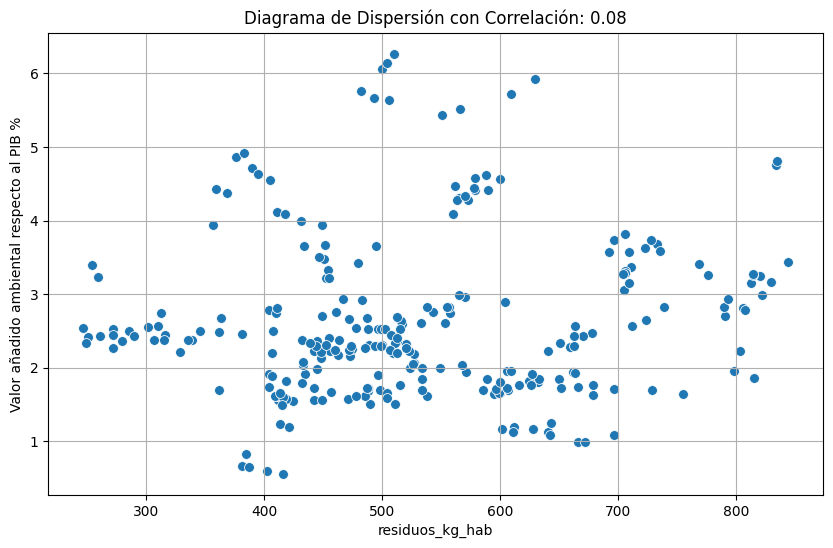

PearsonRResult(statistic=0.08170144601515399, pvalue=0.9079863790883128)

In [121]:
import sys
sys.path.insert(0, '../utils')

from bootcampviztools import grafico_dispersion_con_correlacion
grafico_dispersion_con_correlacion(df_eurostat_11_21_filtrado, "residuos_kg_hab", "Valor añadido ambiental respecto al PIB %",50, mostrar_correlacion = True)


df_eurostat_11_21_filtrado[["residuos_kg_hab", "Valor añadido ambiental respecto al PIB %"]].corr()

from scipy.stats import pearsonr

pearsonr(df_eurostat_11_21_filtrado["residuos_kg_hab"], df_eurostat_11_21_filtrado["Valor añadido ambiental respecto al PIB %"], alternative= "less")

La correlación es baja en el grupo Oeste, 0.25 lo que impulsa a la baja el dato de correlación total, sin embargo, en los países del grupo South es de 0,73 y significativa, los países que menos residuos tienen generan mayor valor añadido ambiental respecto a su PIB. Al ser en datos absolutos un indicador

In [122]:
from scipy.stats import pearsonr

# Definir una función para calcular el coeficiente de correlación de Pearson y p-valor para cada grupo
def calcular_pearson_por_grupo(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["residuos_kg_hab"], df[ "Valor añadido ambiental respecto al PIB %"])
    return coef_pearson, p_valor

# Calcular el coeficiente de correlación de Pearson para cada grupo
resultados_pearson_por_grupo = df_eurostat_11_21_filtrado.groupby("group").apply(calcular_pearson_por_grupo)

# Mostrar los resultados
resultados_pearson_por_grupo

C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\1600083962.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_grupo = df_eurostat_11_21_filtrado.groupby("group").apply(calcular_pearson_por_grupo)


group
Baltic     (-0.5831631619900047, 0.0011260437112787527)
East       (-0.34562326290210843, 0.006835102710819578)
North       (-0.4369945901645029, 0.010995410783290568)
South     (-0.7315301951165724, 1.6948428171961375e-08)
West         (0.2510649375701497, 0.011326339488084114)
dtype: object

Viendo el caso específico del grupo West por país. Holanda es el único país con correlación negativa y significativa.

In [123]:
# Definir una función para calcular el coeficiente de correlación de Pearson y p-valor para cada país dentro del grupo "West"
def calcular_pearson_por_pais(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["residuos_kg_hab"], df["Valor añadido ambiental respecto al PIB %"])
    return coef_pearson, p_valor

# Filtrar el DataFrame para incluir solo el grupo "West"
df_grupo_west = df_eurostat_11_21_filtrado[df_eurostat_11_21_filtrado["group"] == "West"]

# Calcular el coeficiente de correlación de Pearson para cada país dentro del grupo "West"
resultados_pearson_grupo_west = df_grupo_west.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
resultados_pearson_grupo_west



C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\3773223355.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_grupo_west = df_grupo_west.groupby("country").apply(calcular_pearson_por_pais)


country
Austria           (0.7585907055693473, 0.001659935656628046)
Belgium           (0.7961951156524524, 0.018060285245302895)
France             (0.4450569827248812, 0.11078885274189243)
Germany             (0.518639746273998, 0.18786264009765166)
Luxembourg       (0.6905102467195472, 0.0062595506571611805)
Netherlands    (-0.9189495802316668, 4.0935684799797426e-09)
Switzerland      (0.6307339424933627, 0.0016487829452448304)
dtype: object

Se calcula la correlación sin grupo West. Y sigue siendo baja.

Coeficiente de correlación de Pearson: 0.04269544621766605
P-valor: 0.5860892074653227


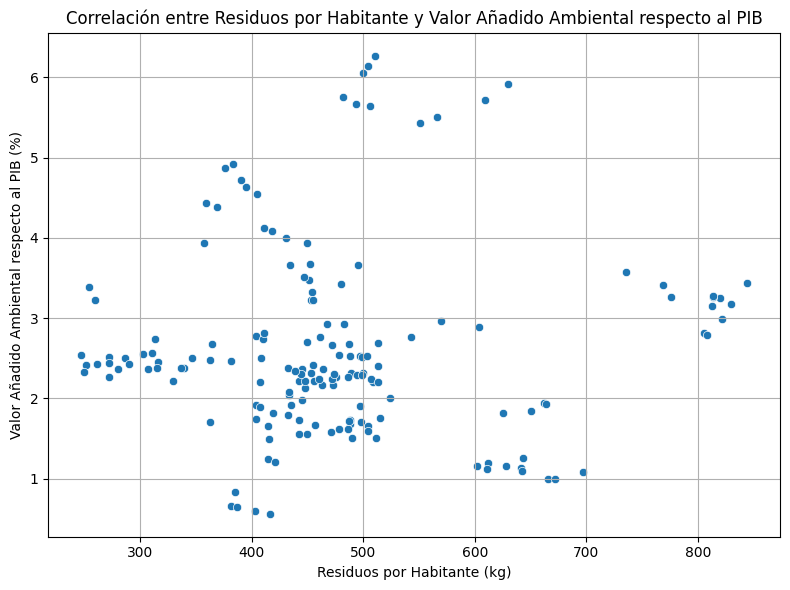

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Filtrar el DataFrame para excluir el grupo "West"
df_sin_grupo_west = df_eurostat_11_21_filtrado[df_eurostat_11_21_filtrado["group"] != "West"]

# Calcular el coeficiente de correlación de Pearson para cada país excluyendo el grupo "West"
resultados_pearson_sin_grupo_west = pearsonr(df_sin_grupo_west["residuos_kg_hab"], df_sin_grupo_west["Valor añadido ambiental respecto al PIB %"])

# Mostrar los resultados de correlación
print("Coeficiente de correlación de Pearson:", resultados_pearson_sin_grupo_west[0])
print("P-valor:", resultados_pearson_sin_grupo_west[1])

# Crear un gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_sin_grupo_west, x="residuos_kg_hab", y="Valor añadido ambiental respecto al PIB %")

# Agregar título y etiquetas de los ejes
plt.title('Correlación entre Residuos por Habitante y Valor Añadido Ambiental respecto al PIB')
plt.xlabel('Residuos por Habitante (kg)')
plt.ylabel('Valor Añadido Ambiental respecto al PIB (%)')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


Moderada correlación entre tasa de reciclaje y valor añadido ambiental. Siendo positiva por los países del Oeste, mientras que hay menos tasa de reciclaje cuando hay menos valor añadido en el resto de zonas. Se explora la alta correlación positiva de group South, debiéndose a España y Chipre.

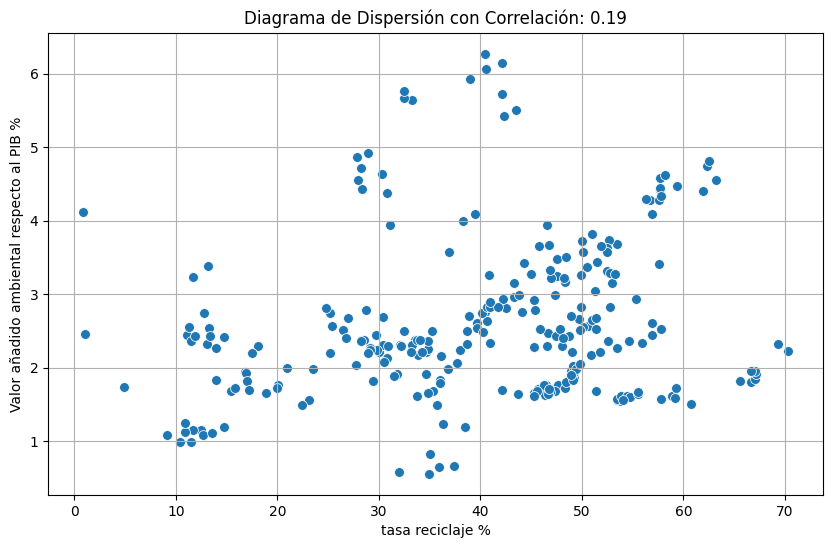

PearsonRResult(statistic=0.19426844096082357, pvalue=0.9992734442681862)

In [125]:
import sys
sys.path.insert(0, '../utils')

from bootcampviztools import grafico_dispersion_con_correlacion
grafico_dispersion_con_correlacion(df_eurostat_11_21_filtrado, "tasa reciclaje %", "Valor añadido ambiental respecto al PIB %",50, mostrar_correlacion = True)


df_eurostat_11_21_filtrado[[ "tasa reciclaje %", "Valor añadido ambiental respecto al PIB %"]].corr()

from scipy.stats import pearsonr

pearsonr(df_eurostat_11_21_filtrado[ "tasa reciclaje %"], df_eurostat_11_21_filtrado["Valor añadido ambiental respecto al PIB %"], alternative= "less")

In [126]:
from scipy.stats import pearsonr

# Definir una función para calcular el coeficiente de correlación de Pearson y p-valor para cada grupo
def calcular_pearson_por_grupo(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["tasa reciclaje %"], df[ "Valor añadido ambiental respecto al PIB %"])
    return coef_pearson, p_valor

# Calcular el coeficiente de correlación de Pearson para cada grupo
resultados_pearson_por_grupo = df_eurostat_11_21_filtrado.groupby("group").apply(calcular_pearson_por_grupo)

# Mostrar los resultados
resultados_pearson_por_grupo

C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\479664273.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_grupo = df_eurostat_11_21_filtrado.groupby("group").apply(calcular_pearson_por_grupo)


group
Baltic       (-0.04077454391859491, 0.8367853866480471)
East       (-0.516107428158844, 2.4344705446587176e-05)
North     (-0.5856311650986198, 0.00034301682261338894)
South          (0.86221033527962, 5.53254072728223e-14)
West       (0.33054269838567274, 0.0007355283105356571)
dtype: object

In [127]:
# Definir una función para calcular el coeficiente de correlación de Pearson y p-valor para cada país dentro del grupo "South"
def calcular_pearson_por_pais(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["tasa reciclaje %"], df["Valor añadido ambiental respecto al PIB %"])
    return coef_pearson, p_valor

# Filtrar el DataFrame para incluir solo el grupo "South"
df_grupo_s = df_eurostat_11_21_filtrado[df_eurostat_11_21_filtrado["group"] == "South"]

# Calcular el coeficiente de correlación de Pearson para cada país dentro del grupo "South"
resultados_pearson_grupo_s = df_grupo_s.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
resultados_pearson_grupo_s

C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\2180107402.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_grupo_s = df_grupo_s.groupby("country").apply(calcular_pearson_por_pais)


country
Cyprus         (0.4165102249995801, 0.58348977500042)
Greece      (0.22828125806899793, 0.5866104988609048)
Italy       (0.5039626636015363, 0.30805381158765016)
Malta       (0.3349862376823064, 0.34405879158852326)
Portugal    (0.13205243692181562, 0.7552650104973753)
Spain       (0.796665950020401, 0.017942221740330284)
dtype: object

    2.2.3.  Correlación residuos generados y de tasa de reciclaje con PIB  per capita


Hay fuerte correlación entre la tasa de reciclaje y PIB per capita

Para todo el período, 2000-2021

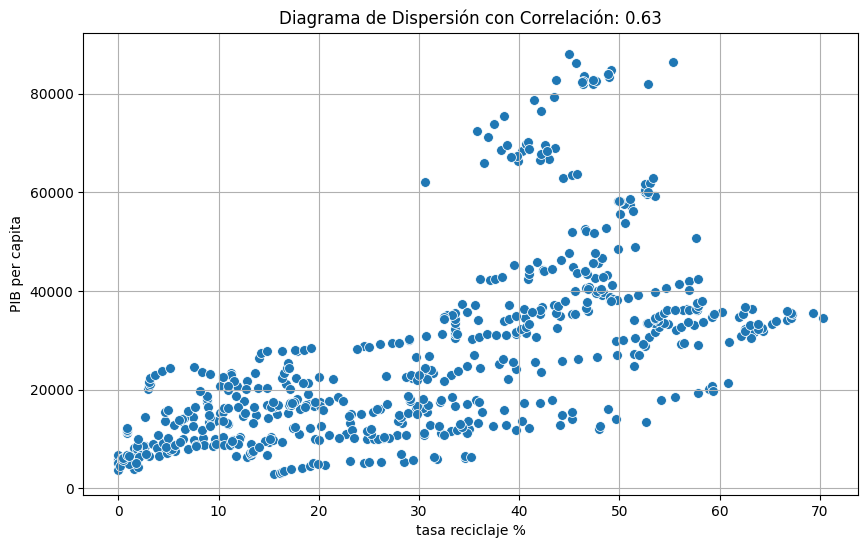

Coeficiente de correlación de Pearson: 0.6265280114382497
P-valor: 5.596702437504045e-66


In [128]:
# Grafico o de dispersión con correlación
grafico_dispersion_con_correlacion(df_eurostat_full, "tasa reciclaje %", "PIB per capita", 50, mostrar_correlacion=True)

# Calcular el coeficiente de correlación de Pearson utilizando el método corr() de Pandas
correlacion_pearson = df_eurostat_full[["tasa reciclaje %", "PIB per capita"]].corr()

# Calcular el coeficiente de correlación de Pearson y el p-valor utilizando scipy.stats
coef_pearson, p_valor = pearsonr(df_eurostat_full["tasa reciclaje %"], df_eurostat_full["PIB per capita"])
print("Coeficiente de correlación de Pearson:", coef_pearson)
print("P-valor:", p_valor)

Para el período de 2018-2021, la correlación se reduce.

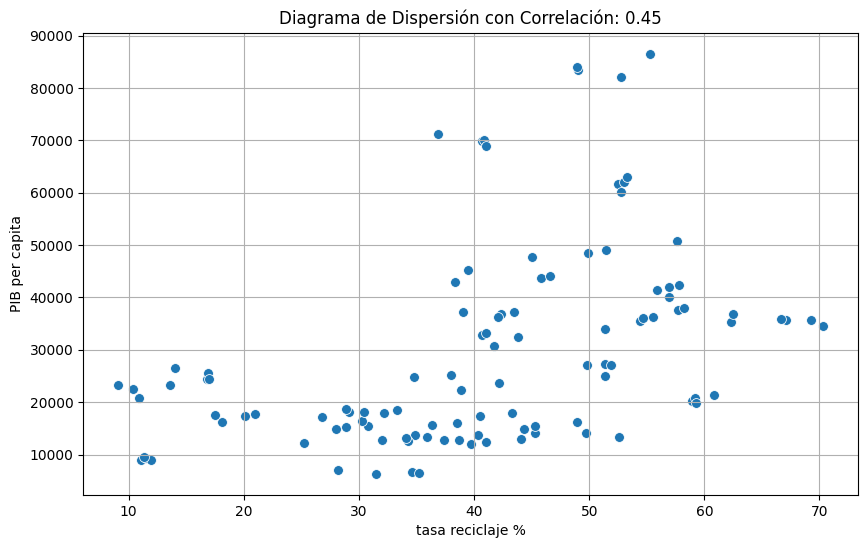

Coeficiente de correlación de Pearson: 0.4467285194699723
P-valor: 1.2577358302244538e-06


In [129]:
# Grafico o de dispersión con correlación
grafico_dispersion_con_correlacion(df_eurostat_full_1821, "tasa reciclaje %", "PIB per capita", 50, mostrar_correlacion=True)

# Calcular el coeficiente de correlación de Pearson utilizando el método corr() de Pandas
correlacion_pearson = df_eurostat_full_1821[["tasa reciclaje %", "PIB per capita"]].corr()

# Calcular el coeficiente de correlación de Pearson y el p-valor utilizando scipy.stats
coef_pearson, p_valor = pearsonr(df_eurostat_full_1821["tasa reciclaje %"], df_eurostat_full_1821["PIB per capita"])
print("Coeficiente de correlación de Pearson:", coef_pearson)
print("P-valor:", p_valor)

Viéndolo por grupo de países, la correlación es positiva y alta en países de grupo Baltic, East o South. Si lo reducimos al período 2018-2021 desciende por la correlación negativa que pasan a tener Baltic junto a North.

In [258]:
from scipy.stats import pearsonr

# Definir una función para calcular el coeficiente de correlación de Pearson y p-valor para cada grupo
def calcular_pearson_por_grupo(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["tasa reciclaje %"], df[ "PIB per capita"])
    return coef_pearson, p_valor

# Calcular el coeficiente de correlación de Pearson para cada grupo
resultados_pearson_por_grupob = df_eurostat_full.groupby("group").apply(calcular_pearson_por_grupo)

# Mostrar los resultados
print("Resultado 2000-2021")
print(resultados_pearson_por_grupob)

# Calcular el coeficiente de correlación de Pearson para cada grupo
resultados_pearson_por_grupo18b = df_eurostat_full.groupby("group").apply(calcular_pearson_por_grupo)


# Calcular el coeficiente de correlación de Pearson para cada grupo
resultados_pearson_por_grupo18b = df_eurostat_full_1821.groupby("group").apply(calcular_pearson_por_grupo)
# Mostrar los resultados
print("Resultado 2018-2021")
print(resultados_pearson_por_grupo18b)


Resultado 2000-2021
group
Baltic     (0.8203284286487541, 3.533088554325149e-17)
East      (0.5337404856440499, 1.0209569009915314e-12)
North        (0.1333031980876014, 0.21836489357047087)
South       (0.44771272168259646, 7.3442821341727e-08)
West       (-0.16554792962598194, 0.04018542116928453)
dtype: object
Resultado 2018-2021
group
Baltic      (-0.2901945161442173, 0.3601991658987384)
East      (0.7415550445426012, 6.326604080323098e-06)
North       (-0.1801549141738826, 0.5043501024784467)
South       (0.3929091773388588, 0.05752594040973523)
West       (-0.17684078862701336, 0.3680061414413913)
dtype: object


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_5748\71226591.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_grupob = df_eurostat_full.groupby("group").apply(calcular_pearson_por_grupo)
C:\Users\mfm-8\AppData\Local\Temp\ipykernel_5748\71226591.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_grupo18b = df_eurostat_full.groupby("group").apply(calcular_pears

Revisando la generación de residuos con el PIB per capita, hay una correlación prácticamente idéntica a la de tasa de reciclaje. Incluso en el período 2018-2021, en vez de disminuir como en el caso de la tasa de reciclaje, aumenta la correlación

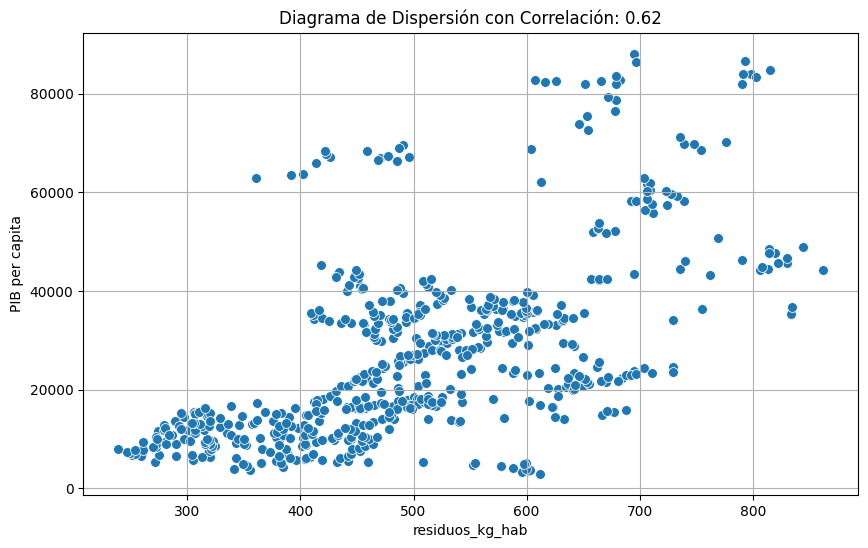

Coeficiente de correlación de Pearson: 0.6176507928533069
P-valor: 1.1654093936581297e-63


In [130]:
# Grafico de dispersión con correlación
grafico_dispersion_con_correlacion(df_eurostat_full, "residuos_kg_hab", "PIB per capita", 50, mostrar_correlacion=True)

# Calcular el coeficiente de correlación de Pearson utilizando el método corr() de Pandas
correlacion_pearson = df_eurostat_full[["residuos_kg_hab", "PIB per capita"]].corr()

# Calcular el coeficiente de correlación de Pearson y el p-valor utilizando scipy.stats
coef_pearson, p_valor = pearsonr(df_eurostat_full["residuos_kg_hab"], df_eurostat_full["PIB per capita"])
print("Coeficiente de correlación de Pearson:", coef_pearson)
print("P-valor:", p_valor)

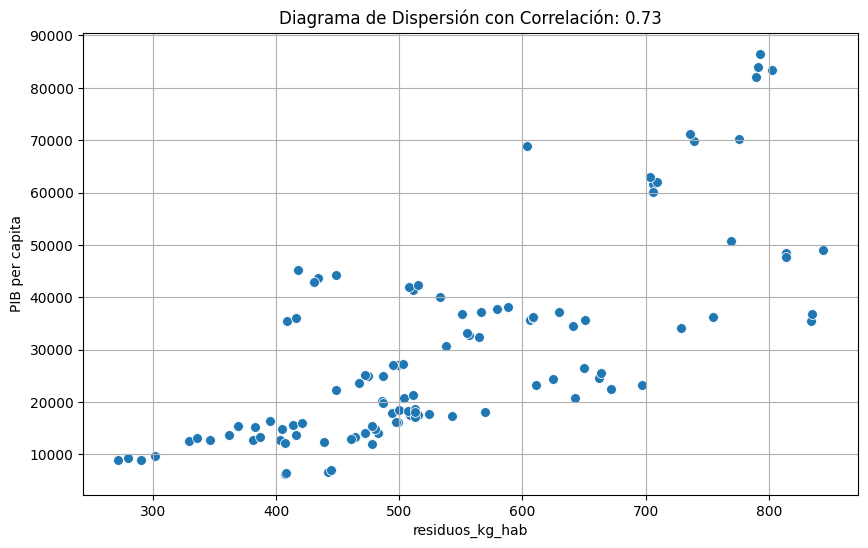

Coeficiente de correlación de Pearson: 0.7330182931684839
P-valor: 1.9047457219133963e-19


In [131]:
# Grafico de dispersión con correlación
grafico_dispersion_con_correlacion(df_eurostat_full_1821, "residuos_kg_hab", "PIB per capita", 50, mostrar_correlacion=True)

# Calcular el coeficiente de correlación de Pearson utilizando el método corr() de Pandas
correlacion_pearson = df_eurostat_full_1821[["residuos_kg_hab", "PIB per capita"]].corr()

# Calcular el coeficiente de correlación de Pearson y el p-valor utilizando scipy.stats
coef_pearson, p_valor = pearsonr(df_eurostat_full_1821["residuos_kg_hab"], df_eurostat_full_1821["PIB per capita"])
print("Coeficiente de correlación de Pearson:", coef_pearson)
print("P-valor:", p_valor)

Por zonas, la correlación entre residuos y PIB es positiva y fuerte sobre todo en los países del Oest y Bálticos.

In [132]:
from scipy.stats import pearsonr

# Definir una función para calcular el coeficiente de correlación de Pearson y p-valor para cada grupo
def calcular_pearson_por_grupo(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["residuos_kg_hab"], df[ "PIB per capita"])
    return coef_pearson, p_valor

# Calcular el coeficiente de correlación de Pearson para cada grupo
resultados_pearson_por_grupo = df_eurostat_full.groupby("group").apply(calcular_pearson_por_grupo)

# Mostrar los resultados
resultados_pearson_por_grupo

C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\1961223697.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_grupo = df_eurostat_full.groupby("group").apply(calcular_pearson_por_grupo)


group
Baltic    (0.3852516746577178, 0.0014018713486345883)
East        (0.06311469802595118, 0.4367887980432025)
North       (0.10145948572992959, 0.3497474772665189)
South       (0.1219406124159275, 0.16365923567366503)
West      (0.647946948056054, 1.0588925700382441e-19)
dtype: object

Para el período 2018-2021, con mayor correlación, vemos que las zonas del Este, el Norte y West son las que más correlación positiva tienen.

In [133]:
from scipy.stats import pearsonr

# Definir una función para calcular el coeficiente de correlación de Pearson y p-valor para cada grupo
def calcular_pearson_por_grupo(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["residuos_kg_hab"], df[ "PIB per capita"])
    return coef_pearson, p_valor

# Calcular el coeficiente de correlación de Pearson para cada grupo
resultados_pearson_por_grupo = df_eurostat_full_1821.groupby("group").apply(calcular_pearson_por_grupo)

# Mostrar los resultados
resultados_pearson_por_grupo

C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\346814641.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_grupo = df_eurostat_full_1821.groupby("group").apply(calcular_pearson_por_grupo)


group
Baltic      (-0.4907729768353736, 0.10521714365000155)
East      (0.6639323769081353, 0.00011709105686507055)
North        (0.4435525161633541, 0.08526710077991556)
South        (0.19405327023113308, 0.3635652887171823)
West          (0.573065407326186, 0.00143517541163885)
dtype: object

Veamos los boxplot por zonas para ver la amplitud de rango.

En residuos habitante no hay outliers identificados, aunque sí vemos como anteriormente, al amplia variedad en el grupo North.

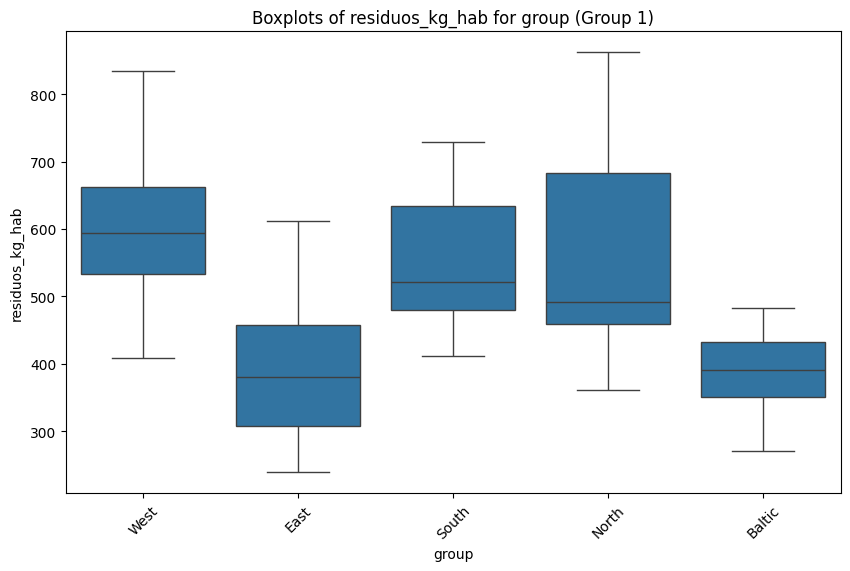

In [134]:
import sys
sys.path.insert(0, '../utils')
from bootcampviztools import plot_grouped_boxplots
plot_grouped_boxplots(df_eurostat_full, "group", "residuos_kg_hab")


En el caso de outliers de tasa de reciclaje los países del grupo West que están por debajo de 30% es Francia y del grupo North por encima de 50% es Dinamarca.

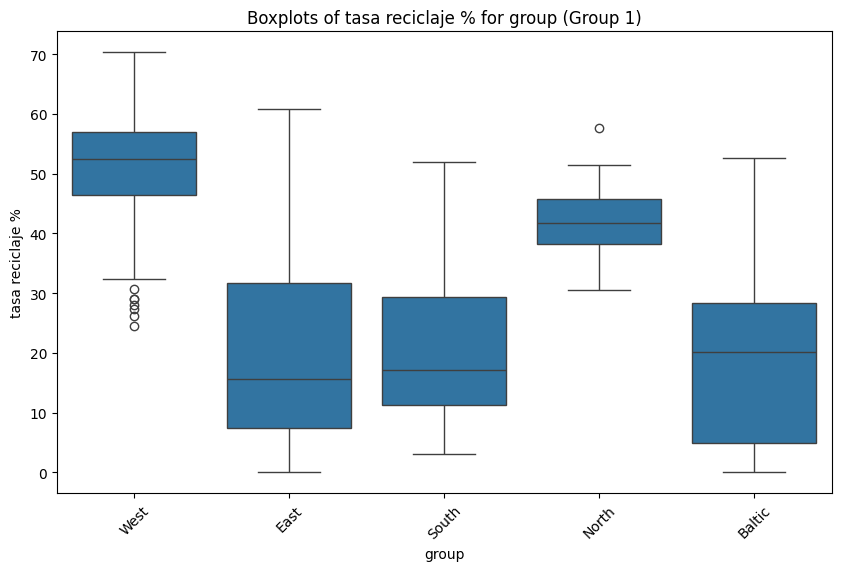

In [135]:
import sys
sys.path.insert(0, '../utils')
from bootcampviztools import plot_grouped_boxplots
plot_grouped_boxplots(df_eurostat_full, "group", "tasa reciclaje %")


Países del grupo West con tasa de reciclaje inferior al 30%:
['France']


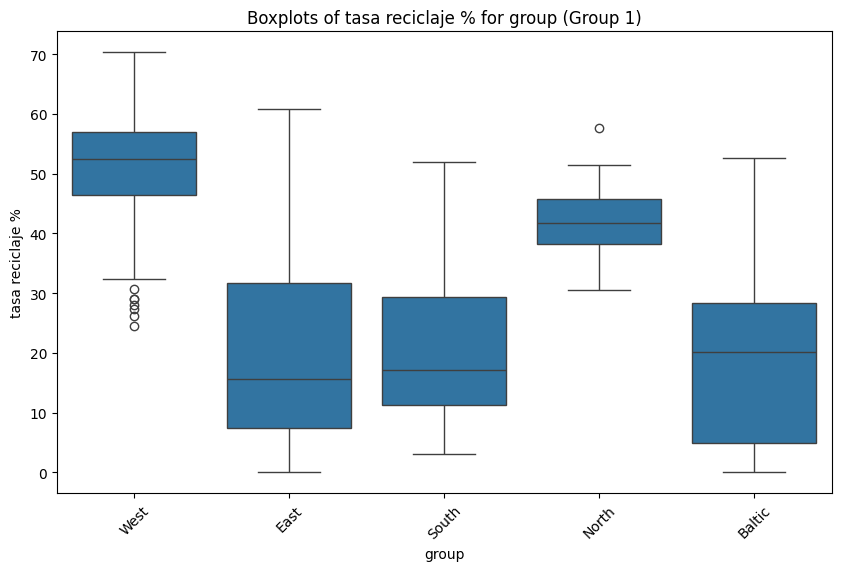

In [136]:
# Filtrar el DataFrame para incluir solo el grupo "West"
df_west = df_eurostat_full[df_eurostat_full["group"] == "West"]

# Identificar los países del grupo "West" con una tasa de reciclaje inferior al 30%
paises_reciclaje_bajo_west = df_west[df_west["tasa reciclaje %"] < 30]["country"].unique()

# Mostrar los países del grupo "West" con una tasa de reciclaje inferior al 30%
print("Países del grupo West con tasa de reciclaje inferior al 30%:")
print(paises_reciclaje_bajo_west)

# Visualizar los datos usando plot_grouped_boxplots
plot_grouped_boxplots(df_eurostat_full, "group", "tasa reciclaje %")


Países del grupo North con tasa de reciclaje superior al 50%:
['Denmark']


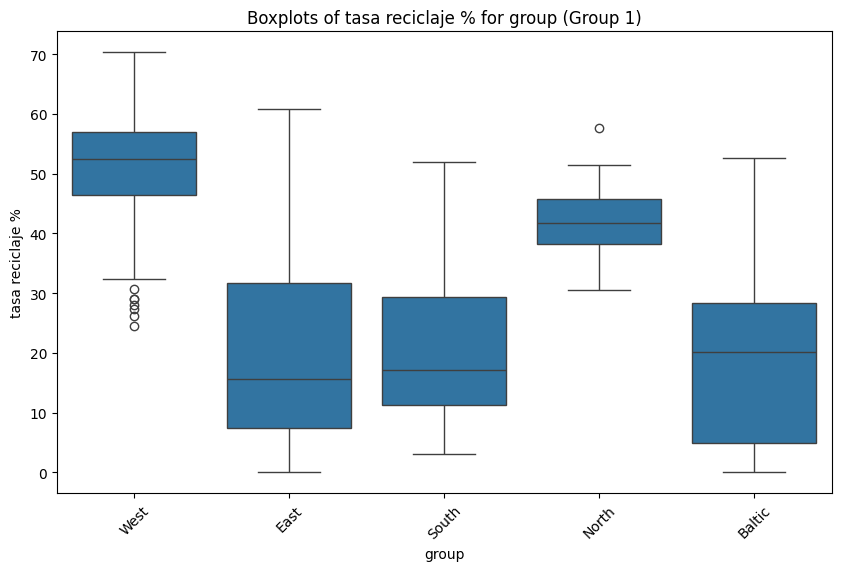

In [137]:
# Filtrar el DataFrame para incluir solo el grupo "North"
df_north = df_eurostat_full[df_eurostat_full["group"] == "North"]

# Identificar los países del grupo "North" con una tasa de reciclaje superior al 50%
paises_reciclaje_alto_north = df_north[df_north["tasa reciclaje %"] > 50]["country"].unique()

# Mostrar los países del grupo "North" con una tasa de reciclaje superior al 50%
print("Países del grupo North con tasa de reciclaje superior al 50%:")
print(paises_reciclaje_alto_north)

# Visualizar los datos usando plot_grouped_boxplots
plot_grouped_boxplots(df_eurostat_full, "group", "tasa reciclaje %")


En el caso de PIB per capita, vimos anteriormente que el outlier es Luxemburgo.

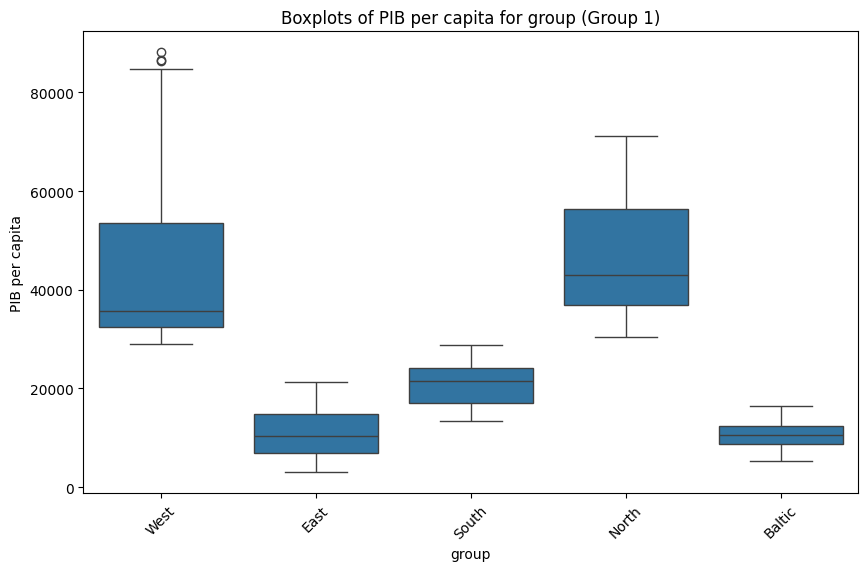

In [138]:
import sys
sys.path.insert(0, '../utils')
from bootcampviztools import plot_grouped_boxplots
plot_grouped_boxplots(df_eurostat_full, "group", "PIB per capita")


In [139]:
# Filtrar el DataFrame para incluir solo el grupo "West"
df_west = df_eurostat_full[df_eurostat_full["group"] == "West"]

# Identificar los países con un PIB per cápita superior a 80000 en el grupo "West"
paises_pib_alto_west = df_west[df_west["PIB per capita"] > 80000]["country"].unique()

# Mostrar los países con un PIB per cápita superior a 80000 en el grupo "West"
print("Países con PIB per cápita superior a 90000 en el grupo West:")
print(paises_pib_alto_west)


Países con PIB per cápita superior a 90000 en el grupo West:
['Luxembourg']


En el caso de valor añadido ambiental, Rumania e Italia son outliers

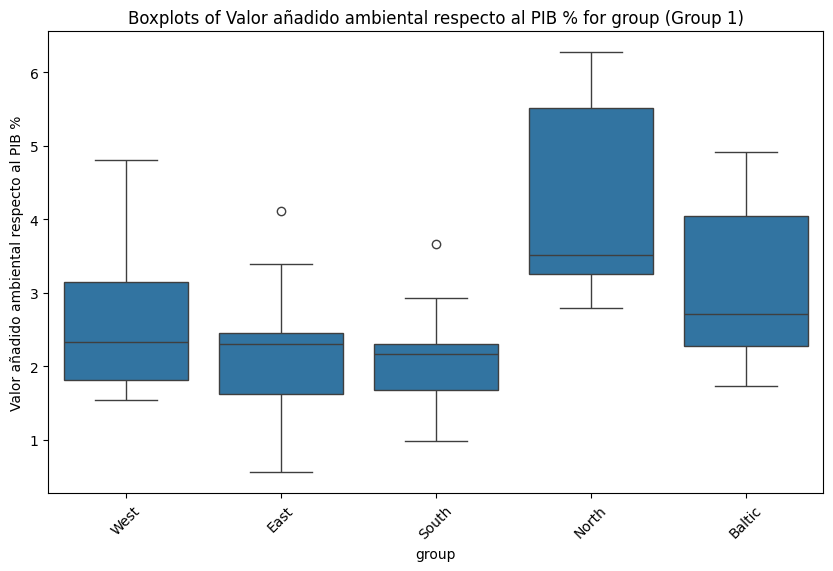

In [140]:
sys.path.insert(0, '../utils')
from bootcampviztools import plot_grouped_boxplots
plot_grouped_boxplots(df_eurostat_11_21_filtrado, "group", "Valor añadido ambiental respecto al PIB %")

In [141]:
# Filtrar el DataFrame para incluir solo los grupos "East" y "South"
df_east_south = df_eurostat_11_21_filtrado[df_eurostat_11_21_filtrado["group"].isin(["East", "South"])]

# Identificar los países con un valor añadido ambiental superior al 3.5% en cada grupo
paises_valor_alto_east = df_east_south[df_east_south["group"] == "East"][df_east_south["Valor añadido ambiental respecto al PIB %"] > 3.5]["country"].unique()
paises_valor_alto_south = df_east_south[df_east_south["group"] == "South"][df_east_south["Valor añadido ambiental respecto al PIB %"] > 3.5]["country"].unique()

# Mostrar los países con valor añadido ambiental superior al 3.5% en cada grupo
print("Países con valor añadido ambiental superior al 3.5% en el grupo East:")
print(paises_valor_alto_east)

print("\nPaíses con valor añadido ambiental superior al 3.5% en el grupo South:")
print(paises_valor_alto_south)


Países con valor añadido ambiental superior al 3.5% en el grupo East:
['Romania']

Países con valor añadido ambiental superior al 3.5% en el grupo South:
['Italy']


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\291777231.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  paises_valor_alto_east = df_east_south[df_east_south["group"] == "East"][df_east_south["Valor añadido ambiental respecto al PIB %"] > 3.5]["country"].unique()
C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\291777231.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  paises_valor_alto_south = df_east_south[df_east_south["group"] == "South"][df_east_south["Valor añadido ambiental respecto al PIB %"] > 3.5]["country"].unique()


Continuamos resumiento  la correlación más fuerte, tasa de reciclaje y PIB per capita junto a otros datos de interés.

Para el período 2000-2021

In [144]:
from scipy.stats import pearsonr

# Función para calcular el coeficiente de correlación de Pearson y p-valor para cada país
def calcular_pearson_por_pais(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["PIB per capita"], df["tasa reciclaje %"])
    # Obtener la tasa de reciclaje promedio por país
    tasa_reciclaje = df["tasa reciclaje %"].mean()
    # Obtener la tasa de reciclaje promedio por país
    residuos_habitante = df["residuos_kg_hab"].mean()
    # Obtener la tasa de reciclaje promedio por país
    PIB_habitante = df["PIB per capita"].mean()
    # Crear una Serie con los resultados
    resultados = pd.Series({"Pearson": coef_pearson, "p-valor": p_valor, "Tasa de reciclaje (%)": tasa_reciclaje, "Residuos kg habitante": residuos_habitante,"PIB habitante":PIB_habitante})
    return resultados

# Calcular el coeficiente de correlación de Pearson para cada país en el DataFrame completo
resultados_pearson_por_paisPIB = df_eurostat_full.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
resultados_pearson_por_paisPIB



# Especificar la ruta del archivo Excel
excel_file_path = "../data/correlacion_PIBreciclaje_por_pais.xlsx"

# Guardar el DataFrame en un archivo Excel
resultados_pearson_por_paisPIB.to_excel(excel_file_path)

print(f"Los resultados se han guardado en el archivo: {excel_file_path}")

Los resultados se han guardado en el archivo: ../data/correlacion_PIBreciclaje_por_pais.xlsx


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\3073039772.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_paisPIB = df_eurostat_full.groupby("country").apply(calcular_pearson_por_pais)


Para el período 2008-2021

In [146]:
from scipy.stats import pearsonr

# Función para calcular el coeficiente de correlación de Pearson y p-valor para cada país
def calcular_pearson_por_pais(df):
    # Calcular el coeficiente de correlación de Pearson y p-valor
    coef_pearson, p_valor = pearsonr(df["PIB per capita"], df["tasa reciclaje %"])
    # Obtener la tasa de reciclaje promedio por país
    tasa_reciclaje = df["tasa reciclaje %"].mean()
    # Obtener la tasa de reciclaje promedio por país
    residuos_habitante = df["residuos_kg_hab"].mean()
    # Obtener la tasa de reciclaje promedio por país
    PIB_habitante = df["PIB per capita"].mean()
    # Crear una Serie con los resultados
    resultados = pd.Series({"Pearson": coef_pearson, "p-valor": p_valor, "Tasa de reciclaje (%)": tasa_reciclaje, "Residuos kg habitante": residuos_habitante,"PIB habitante":PIB_habitante})
    return resultados

# Calcular el coeficiente de correlación de Pearson para cada país en el DataFrame completo
resultados_pearson_por_paisPIB18 = df_eurostat_full_1821.groupby("country").apply(calcular_pearson_por_pais)

# Mostrar los resultados
resultados_pearson_por_paisPIB18


# Especificar la ruta del archivo Excel
excel_file_path = "../data/correlacion_PIBreciclaje_por_pais18_21.xlsx"

# Guardar el DataFrame en un archivo Excel
resultados_pearson_por_paisPIB18.to_excel(excel_file_path)

print(f"Los resultados se han guardado en el archivo: {excel_file_path}")

Los resultados se han guardado en el archivo: ../data/correlacion_PIBreciclaje_por_pais18_21.xlsx


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_13680\146805959.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_pearson_por_paisPIB18 = df_eurostat_full_1821.groupby("country").apply(calcular_pearson_por_pais)


### Test ANOVA


Aplicado para 2000-2021 en Residuos habitante por grupo

Realizandolo en residuos kg hab por group, el resultado del ANOVA sugiere que hay diferencias significativas en la cantidad de residuos por habitante entre al menos un par de grupos en tu conjunto de datos.  F es una medida de cuánto varían las medias de los grupos entre sí, en relación con la variación dentro de cada grupo. Un valor p muy pequeño indica que hay una baja probabilidad de que las diferencias observadas entre los grupos se deban al azar.

In [147]:
from scipy import stats

# Obtener los valores únicos de la columna categórica
grupos = df_eurostat_full['group'].unique() 
tasa_pais = [df_eurostat_full[df_eurostat_full['group'] == grupo]['residuos_kg_hab'] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*tasa_pais) 
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 126.22106087321947
Valor p: 9.823817824794348e-78


Aplicado para 2018-2021 en Residuos habitante por grupo, se reduce considerablemente el valor de F, siendo un dato con menor variaciónal del período extenso por la mejora en la tasa de reciclaje a lo largo de 20 años.

In [149]:
from scipy import stats

# Obtener los valores únicos de la columna categórica
grupos = df_eurostat_full['group'].unique() 
tasa_pais = [df_eurostat_full_1821[df_eurostat_full_1821['group'] == grupo]['residuos_kg_hab'] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*tasa_pais) 
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 22.83335154543747
Valor p: 1.5936553062264177e-13


Aplicado para 2000-2021 en Tasa reciclaje % por grupo

Existe al menos una diferencia significativa entre los grupos en términos de la variable "tasa reciclaje %". El valor F es una medida de cuánto varían las medias de los grupos entre sí, en relación con la variación dentro de cada grupo. Un valor p muy pequeño indica que hay una baja probabilidad de que las diferencias observadas entre los grupos se deban al azar. 

In [150]:
from scipy import stats

# Obtener los valores únicos de la columna categórica
grupos = df_eurostat_full['group'].unique() 
tasa_pais = [df_eurostat_full[df_eurostat_full['group'] == grupo]["tasa reciclaje %"] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*tasa_pais) 
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 206.18835549259634
Valor p: 2.0632401765366144e-110


Aplicado para 2018-2021 en Tasa de reciclaje por grupo se reduce considerablemente la variación.

In [151]:
from scipy import stats

# Obtener los valores únicos de la columna categórica
grupos = df_eurostat_full['group'].unique() 
tasa_pais = [df_eurostat_full_1821[df_eurostat_full_1821['group'] == grupo]["tasa reciclaje %"] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*tasa_pais) 
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 21.506223491557392
Valor p: 6.433484055141864e-13


Existe al menos una diferencia significativa entre los grupos en términos del "Valor añadido ambiental respecto al PIB %". Un valor F más alto sugiere una mayor variabilidad entre los grupos en comparación con la variabilidad dentro de los grupos. El valor p tan pequeño indica que hay una baja probabilidad de que las diferencias observadas entre los grupos se deban al azar. Por lo tanto, podemos interpretar que al menos un par de grupos tienen medias significativamente diferentes entre sí en cuanto al "Valor añadido ambiental respecto al PIB %". 

In [152]:
from scipy import stats

# Obtener los valores únicos de la columna categórica
grupos = df_eurostat_11_21_filtrado['group'].unique() 
tasa_pais = [df_eurostat_11_21_filtrado[df_eurostat_11_21_filtrado['group'] == grupo]["Valor añadido ambiental respecto al PIB %"] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*tasa_pais) 
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 35.491001383137224
Valor p: 1.1381709265035931e-23


Aplicado para 2000-2021 en Residuos habitante por grupo

Existe al menos una diferencia significativa entre los grupos en términos del "PIB per capita". Un valor F más alto sugiere una mayor variabilidad entre los grupos en comparación con la variabilidad dentro de los grupos. El valor p tan pequeño indica que hay una baja probabilidad de que las diferencias observadas entre los grupos se deban al azar.Por lo tanto, podemos interpretar que al menos un par de grupos tienen medias significativamente diferentes entre sí en cuanto al "PIB per capita".

In [153]:
from scipy import stats

# Obtener los valores únicos de la columna categórica
grupos = df_eurostat_full['group'].unique() 
tasa_pais = [df_eurostat_full[df_eurostat_full['group'] == grupo]["PIB per capita"] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*tasa_pais) 
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 308.45590076265677
Valor p: 8.116042158738005e-143


Aplicado para 2018-2021 en PIB per capita  por grupo se reduce considerablemente.

In [154]:
from scipy import stats

# Obtener los valores únicos de la columna categórica
grupos = df_eurostat_full['group'].unique() 
tasa_pais = [df_eurostat_full_1821[df_eurostat_full_1821['group'] == grupo]["PIB per capita"] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*tasa_pais) 
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 55.270103914653994
Valor p: 8.325154897676398e-25


Aplicado para 2000-2021 en Residuos habitante por grupo

Existe al menos una diferencia significativa entre los grupos en términos de la tasa de reciclaje. Un valor F más bajo sugiere una menor variabilidad entre los grupos en comparación con la variabilidad dentro de los grupos. El valor p tan pequeño indica que hay una baja probabilidad de que las diferencias observadas entre los grupos se deban al azar.

In [155]:
from scipy import stats

# Obtener los valores únicos de la columna categórica
grupos = df_eurostat['TIME_PERIOD'].unique() 
tasa_pais = [df_eurostat[df_eurostat['TIME_PERIOD'] == grupo]["tasa reciclaje %"] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*tasa_pais) 
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 3.063425643777759
Valor p: 3.574675528692005e-06


Revisión serie temporal

Seguimos revisando la serie temporal

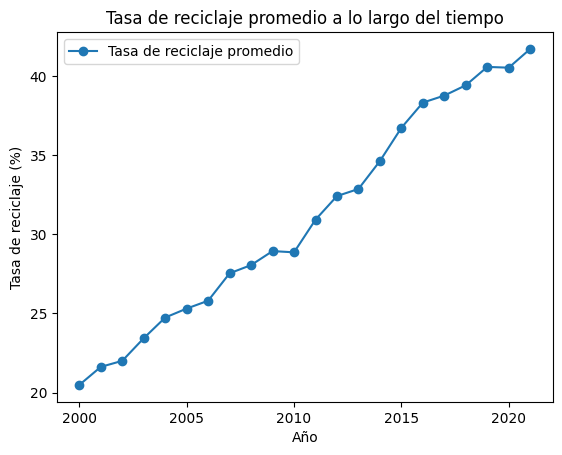

In [156]:
import matplotlib.pyplot as plt

# Agrupar los datos por 'TIME_PERIOD' y calcular la media de 'tasa reciclaje %' para cada período de tiempo
grupo_tiempo = df_eurostat_full.groupby('TIME_PERIOD')['tasa reciclaje %'].mean()

# Trazar la serie temporal de la tasa de reciclaje promedio a lo largo del tiempo
plt.plot(grupo_tiempo.index, grupo_tiempo.values, marker='o', linestyle='-', label='Tasa de reciclaje promedio')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Tasa de reciclaje (%)')
plt.title('Tasa de reciclaje promedio a lo largo del tiempo')
plt.legend()

# Mostrar el gráfico
plt.show()


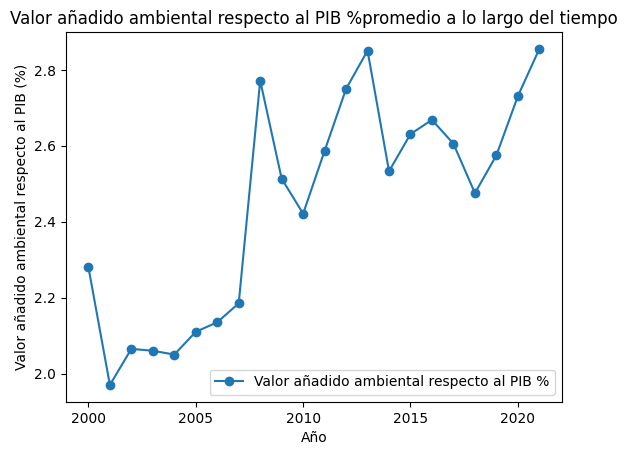

In [190]:
# Trazar la serie temporal a lo largo del tiempo
import matplotlib.pyplot as plt

# Agrupar los datos por 'TIME_PERIOD' y calcular la media de 'tasa reciclaje %' para cada período de tiempo
grupo_tiempo = df_eurostat_full.groupby('TIME_PERIOD')['Valor añadido ambiental respecto al PIB %'].mean()

# Trazar la serie temporal de la tasa de reciclaje promedio a lo largo del tiempo
plt.plot(grupo_tiempo.index, grupo_tiempo.values, marker='o', linestyle='-', label='Valor añadido ambiental respecto al PIB %')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Valor añadido ambiental respecto al PIB (%)')
plt.title('Valor añadido ambiental respecto al PIB %promedio a lo largo del tiempo')
plt.legend()

# Mostrar el gráfico
plt.show()


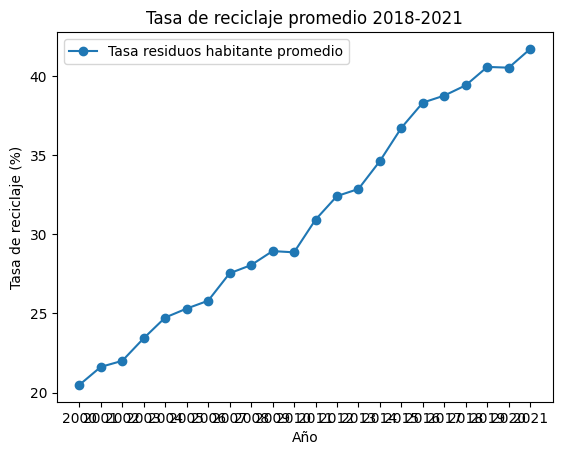

In [157]:
# Trazar la serie temporal a lo largo del tiempo
plt.plot(grupo_tiempo.index, grupo_tiempo.values, marker='o', linestyle='-', label='Tasa residuos habitante promedio')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Tasa de reciclaje (%)')

plt.title('Tasa de reciclaje promedio 2018-2021')
plt.legend()

# Especificar el formato del eje x
plt.xticks(grupo_tiempo.index, [int(year) for year in grupo_tiempo.index])

# Mostrar el gráfico
plt.show()

In [185]:
df_eurostat_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   geo                                        593 non-null    object 
 1   TIME_PERIOD                                593 non-null    int64  
 2   tasa reciclaje %                           593 non-null    float64
 3   country                                    593 non-null    object 
 4   group                                      593 non-null    object 
 5   residuos_kg_hab                            593 non-null    float64
 6   PIB per capita                             593 non-null    float64
 7   Valor añadido ambiental respecto al PIB %  266 non-null    float64
 8   Grupo residuos/hab                         593 non-null    object 
 9   Rango de residuos (kg/hab)                 593 non-null    object 
dtypes: float64(4), int64(1), o

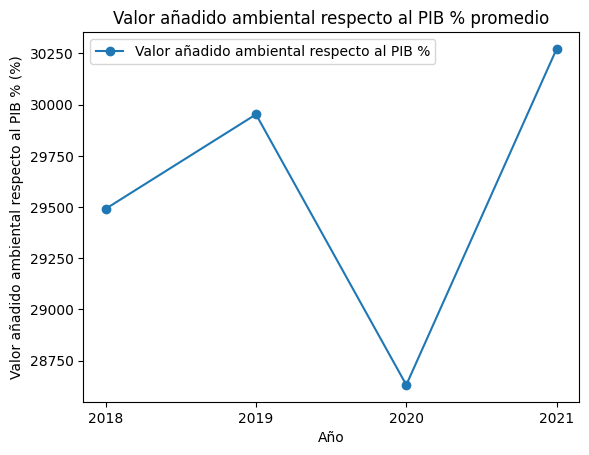

In [186]:
# Trazar la serie temporal a lo largo del tiempo
plt.plot(grupo_tiempo.index, grupo_tiempo.values, marker='o', linestyle='-', label='Valor añadido ambiental respecto al PIB %')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Valor añadido ambiental respecto al PIB % (%)')

plt.title('Valor añadido ambiental respecto al PIB % promedio')
plt.legend()

# Especificar el formato del eje x
plt.xticks(grupo_tiempo.index, [int(year) for year in grupo_tiempo.index])

# Mostrar el gráfico
plt.show()

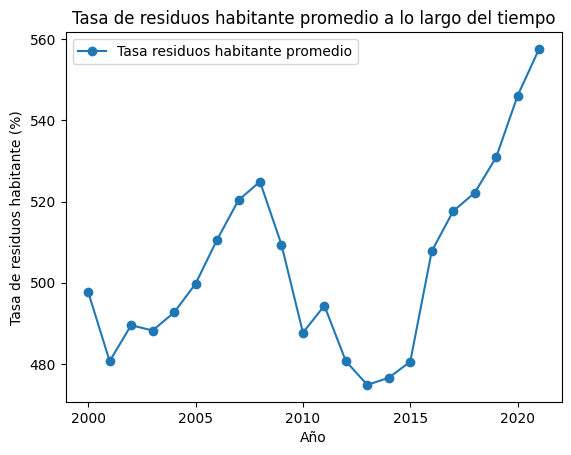

In [158]:
# Agrupar los datos por 'TIME_PERIOD' y calcular la media para cada período de tiempo
grupo_tiempo1 = df_eurostat_full.groupby('TIME_PERIOD')['residuos_kg_hab'].mean()

# Trazar la serie temporal a lo largo del tiempo
plt.plot(grupo_tiempo1.index, grupo_tiempo1.values, marker='o', linestyle='-', label='Tasa residuos habitante promedio')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Tasa de residuos habitante (%)')
plt.title('Tasa de residuos habitante promedio a lo largo del tiempo')
plt.legend()

# Mostrar el gráfico
plt.show()

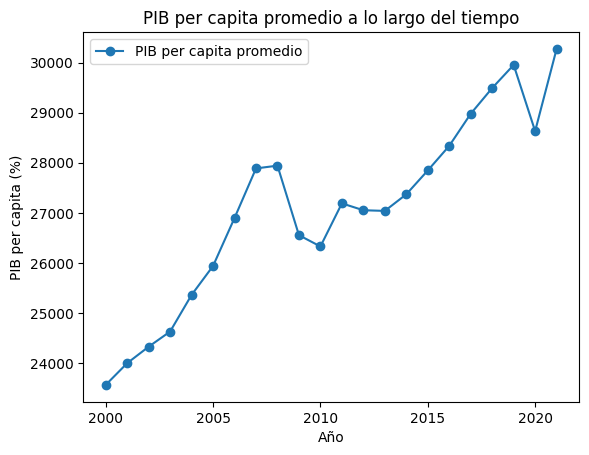

In [159]:
# Agrupar los datos por 'TIME_PERIOD' y calcular la media para cada período de tiempo
grupo_tiempo = df_eurostat_full.groupby('TIME_PERIOD')['PIB per capita'].mean()

# Trazar la serie temporal a lo largo del tiempo
plt.plot(grupo_tiempo.index, grupo_tiempo.values, marker='o', linestyle='-', label='PIB per capita promedio')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('PIB per capita (%)')
plt.title('PIB per capita promedio a lo largo del tiempo')
plt.legend()

# Mostrar el gráfico
plt.show()

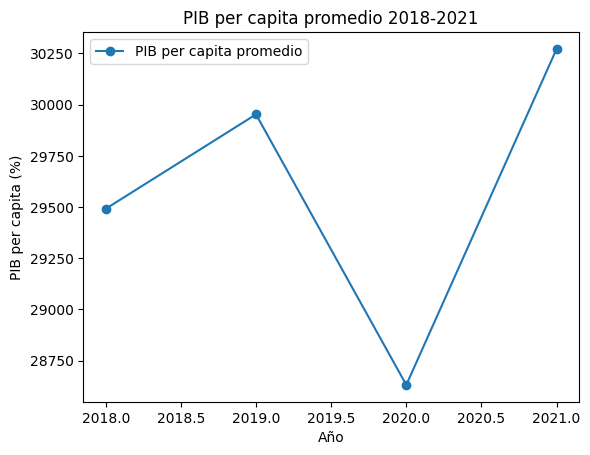

In [160]:
# Agrupar los datos por 'TIME_PERIOD' y calcular la media para cada período de tiempo
grupo_tiempo = df_eurostat_full_1821.groupby('TIME_PERIOD')['PIB per capita'].mean()

# Trazar la serie temporal a lo largo del tiempo
plt.plot(grupo_tiempo.index, grupo_tiempo.values, marker='o', linestyle='-', label='PIB per capita promedio')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('PIB per capita (%)')
plt.title('PIB per capita promedio 2018-2021')
plt.legend()

# Mostrar el gráfico
plt.show()

In [161]:
# Calcular la media de la tasa de reciclaje por año
media_por_año = df_eurostat_full.groupby('TIME_PERIOD')['tasa reciclaje %'].mean()

# Crear un DataFrame con la media por año
df_media_por_año = pd.DataFrame({'Año': media_por_año.index, 'Tasa de reciclaje promedio (%)': media_por_año.values})

# Mostrar la tabla
print(df_media_por_año)



     Año  Tasa de reciclaje promedio (%)
0   2000                       20.485185
1   2001                       21.625926
2   2002                       22.007407
3   2003                       23.437037
4   2004                       24.744444
5   2005                       25.311111
6   2006                       25.807407
7   2007                       27.540741
8   2008                       28.059259
9   2009                       28.944444
10  2010                       28.865385
11  2011                       30.929630
12  2012                       32.422222
13  2013                       32.870370
14  2014                       34.637037
15  2015                       36.737037
16  2016                       38.329630
17  2017                       38.774074
18  2018                       39.425926
19  2019                       40.585185
20  2020                       40.537037
21  2021                       41.722222


La evolución de la serie temporal de tasa de reciclaje por grupo de países

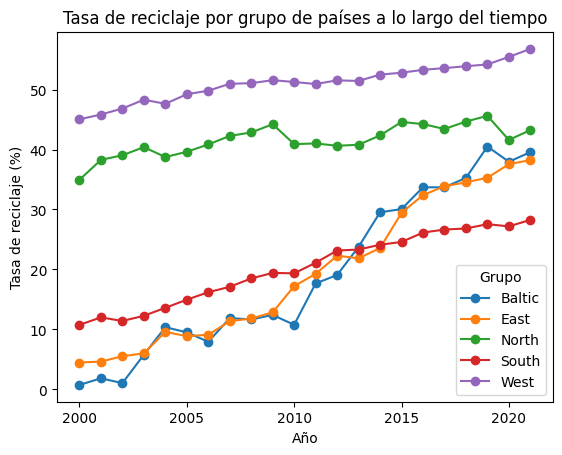

In [162]:
import matplotlib.pyplot as plt

# Agrupar los datos por 'group' y 'TIME_PERIOD' y calcular la media de 'tasa reciclaje %' para cada grupo en cada período de tiempo
grupo_pais_tiempo = df_eurostat_full.groupby(['group', 'TIME_PERIOD'])['tasa reciclaje %'].mean().unstack(level=0)

# Trazar la serie temporal de la tasa de reciclaje promedio para cada grupo de países
grupo_pais_tiempo.plot(marker='o', linestyle='-')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Tasa de reciclaje (%)')
plt.title('Tasa de reciclaje por grupo de países a lo largo del tiempo')
plt.legend(title='Grupo')

# Mostrar el gráfico
plt.show()


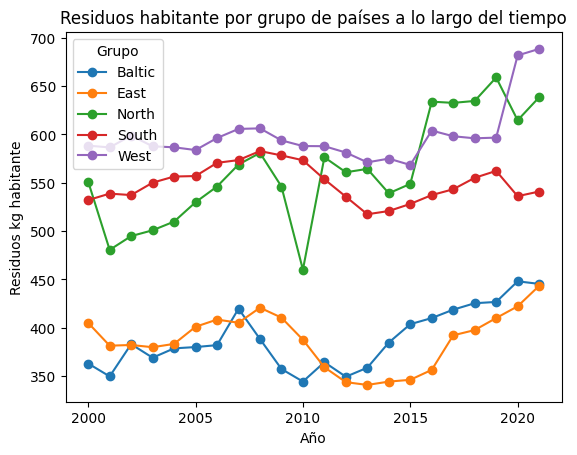

In [163]:
import matplotlib.pyplot as plt

# Agrupar los datos por 'group' y 'TIME_PERIOD' y calcular la media de 'tasa reciclaje %' para cada grupo en cada período de tiempo
grupo_pais_tiempo = df_eurostat_full.groupby(['group', 'TIME_PERIOD'])['residuos_kg_hab'].mean().unstack(level=0)

# Trazar la serie temporal de la tasa de reciclaje promedio para cada grupo de países
grupo_pais_tiempo.plot(marker='o', linestyle='-')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Residuos kg habitante')
plt.title('Residuos habitante por grupo de países a lo largo del tiempo')
plt.legend(title='Grupo')

# Mostrar el gráfico
plt.show()

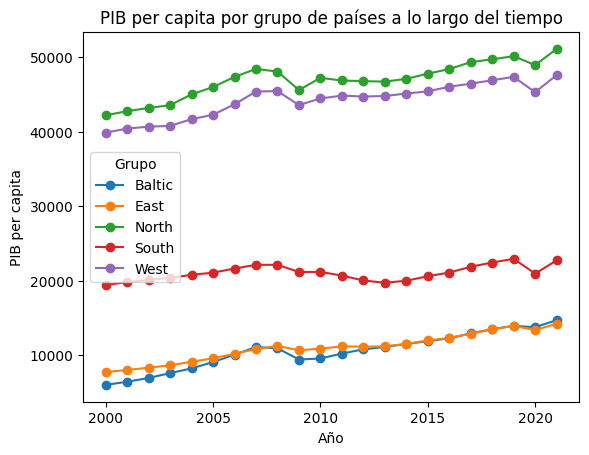

In [164]:
import matplotlib.pyplot as plt

# Agrupar los datos por 'group' y 'TIME_PERIOD' y calcular la media de 'tasa reciclaje %' para cada grupo en cada período de tiempo
grupo_pais_tiempo = df_eurostat_full.groupby(['group', 'TIME_PERIOD'])['PIB per capita'].mean().unstack(level=0)

# Trazar la serie temporal de la tasa de reciclaje promedio para cada grupo de países
grupo_pais_tiempo.plot(marker='o', linestyle='-')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('PIB per capita')
plt.title('PIB per capita por grupo de países a lo largo del tiempo')
plt.legend(title='Grupo')

# Mostrar el gráfico
plt.show()

In [165]:
# Crear una tabla pivote de la tasa de reciclaje por grupo y período de tiempo
tabla_tasa_reciclaje = df_eurostat_full.pivot_table(index='TIME_PERIOD', columns='group', values='tasa reciclaje %', aggfunc='mean')

# Imprimir la tabla
print(tabla_tasa_reciclaje)


group           Baltic       East   North      South       West
TIME_PERIOD                                                    
2000          0.733333   4.471429  34.950  10.750000  45.042857
2001          1.833333   4.628571  38.275  12.000000  45.842857
2002          1.033333   5.514286  39.050  11.400000  46.842857
2003          5.766667   6.014286  40.400  12.266667  48.314286
2004         10.366667   9.571429  38.750  13.600000  47.628571
2005          9.500000   8.871429  39.625  14.950000  49.228571
2006          7.933333   9.100000  40.850  16.200000  49.814286
2007         11.866667  11.357143  42.275  17.100000  50.971429
2008         11.666667  11.814286  42.850  18.500000  51.071429
2009         12.400000  12.842857  44.225  19.416667  51.571429
2010         10.766667  17.214286  40.900  19.350000  51.271429
2011         17.666667  19.257143  41.025  21.116667  50.928571
2012         19.066667  22.285714  40.625  23.150000  51.542857
2013         23.766667  21.857143  40.80

Ahora se calculan las tasas de variación de residuos por habitante.

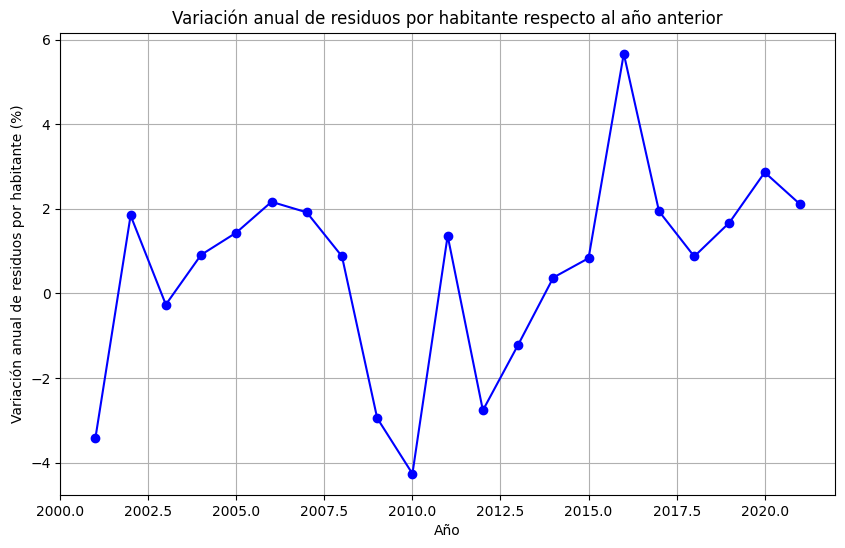

In [166]:
# Calcular la variación anual de los residuos por habitante respecto al año anterior
variacion_anual_residuos = df_eurostat_full.groupby('TIME_PERIOD')['residuos_kg_hab'].mean().pct_change()

# Crear la figura y los ejes del gráfico
plt.figure(figsize=(10, 6))

# Graficar la variación anual de los residuos por habitante
plt.plot(variacion_anual_residuos.index, variacion_anual_residuos.values * 100, marker='o', linestyle='-', color='b')

# Añadir etiquetas y título al gráfico
plt.xlabel('Año')
plt.ylabel('Variación anual de residuos por habitante (%)')
plt.title('Variación anual de residuos por habitante respecto al año anterior')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [167]:
# Crear un DataFrame para almacenar los resultados
df_variacion_residuos_anual = pd.DataFrame({'Año': variacion_anual_residuos.index, 'Variación anual de residuos por habitante (%)': variacion_anual_residuos.values * 100})

# Imprimir la tabla
print(df_variacion_residuos_anual)


     Año  Variación anual de residuos por habitante (%)
0   2000                                            NaN
1   2001                                      -3.423128
2   2002                                       1.841578
3   2003                                      -0.264810
4   2004                                       0.910332
5   2005                                       1.435874
6   2006                                       2.164085
7   2007                                       1.915125
8   2008                                       0.875507
9   2009                                      -2.949478
10  2010                                      -4.262816
11  2011                                       1.361725
12  2012                                      -2.764666
13  2013                                      -1.217445
14  2014                                       0.374415
15  2015                                       0.831520
16  2016                                       5

Se calculan las variaciones de PIB per capita

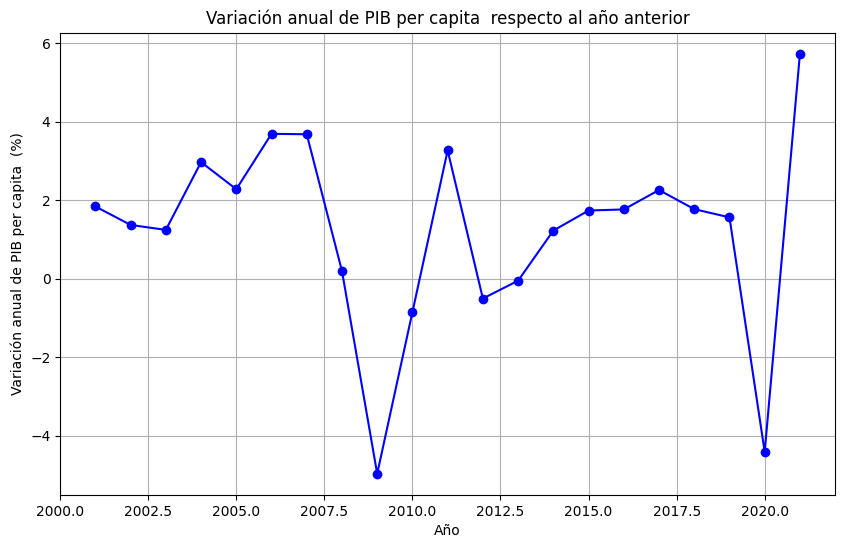

In [168]:
# Calcular la variación anual respecto al año anterior
variacion_anual_PIB = df_eurostat_full.groupby('TIME_PERIOD')['PIB per capita'].mean().pct_change()

# Crear la figura y los ejes del gráfico
plt.figure(figsize=(10, 6))

# Graficar la variación anual 
plt.plot(variacion_anual_PIB.index, variacion_anual_PIB.values * 100, marker='o', linestyle='-', color='b')

# Añadir etiquetas y título al gráfico
plt.xlabel('Año')
plt.ylabel('Variación anual de PIB per capita  (%)')
plt.title('Variación anual de PIB per capita  respecto al año anterior')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()


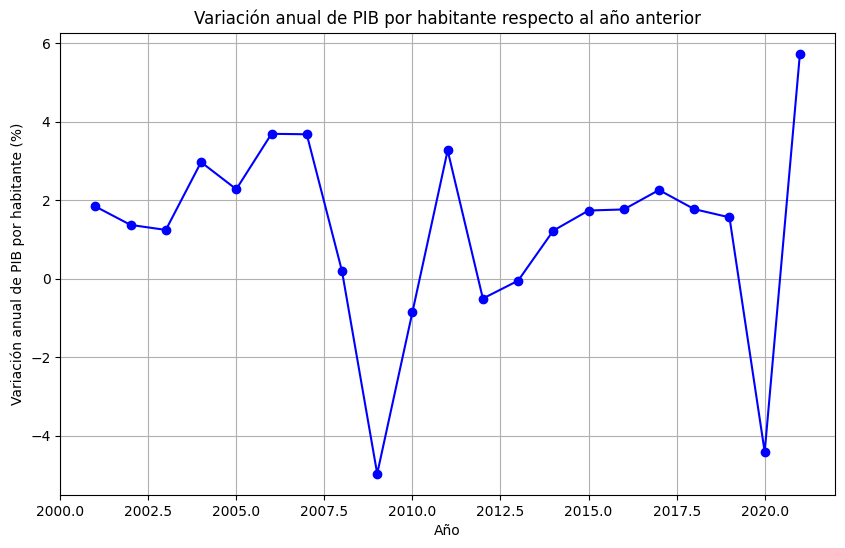

In [169]:
# Calcular la variación anual de pib  por habitante respecto al año anterior
variacion_anual_PIB = df_eurostat_full.groupby('TIME_PERIOD')['PIB per capita'].mean().pct_change()

# Crear la figura y los ejes del gráfico
plt.figure(figsize=(10, 6))

# Graficar la variación anual
plt.plot(variacion_anual_PIB.index, variacion_anual_PIB.values * 100, marker='o', linestyle='-', color='b')

# Añadir etiquetas y título al gráfico
plt.xlabel('Año')
plt.ylabel('Variación anual de PIB por habitante (%)')
plt.title('Variación anual de PIB por habitante respecto al año anterior')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

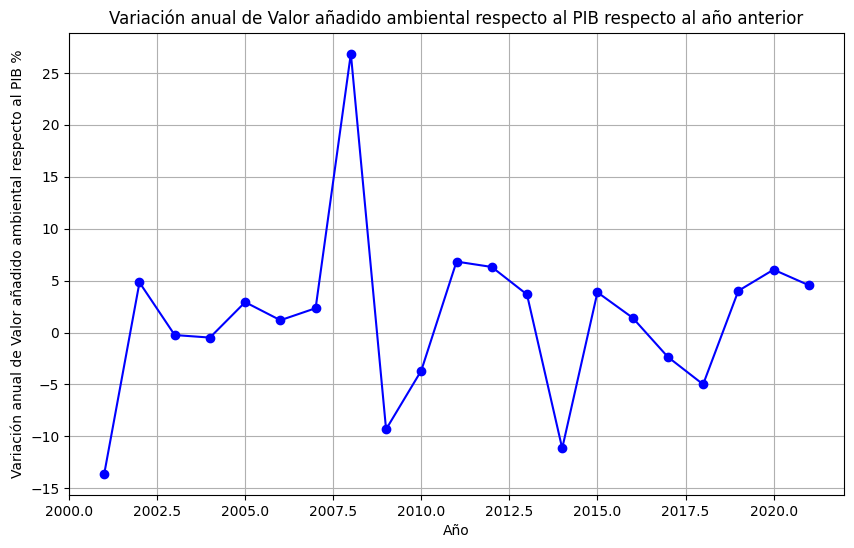

In [172]:
# Calcular la variación anual
variacion_anual_ambiental = df_eurostat_full.groupby('TIME_PERIOD')['Valor añadido ambiental respecto al PIB %'].mean().pct_change()

# Crear la figura y los ejes del gráfico
plt.figure(figsize=(10, 6))

# Graficar la variación anual
plt.plot(variacion_anual_ambiental.index, variacion_anual_ambiental.values * 100, marker='o', linestyle='-', color='b')

# Añadir etiquetas y título al gráfico
plt.xlabel('Año')
plt.ylabel('Variación anual de Valor añadido ambiental respecto al PIB %')
plt.title('Variación anual de Valor añadido ambiental respecto al PIB respecto al año anterior')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

Se realiza un data frame con las variaciones en los datos

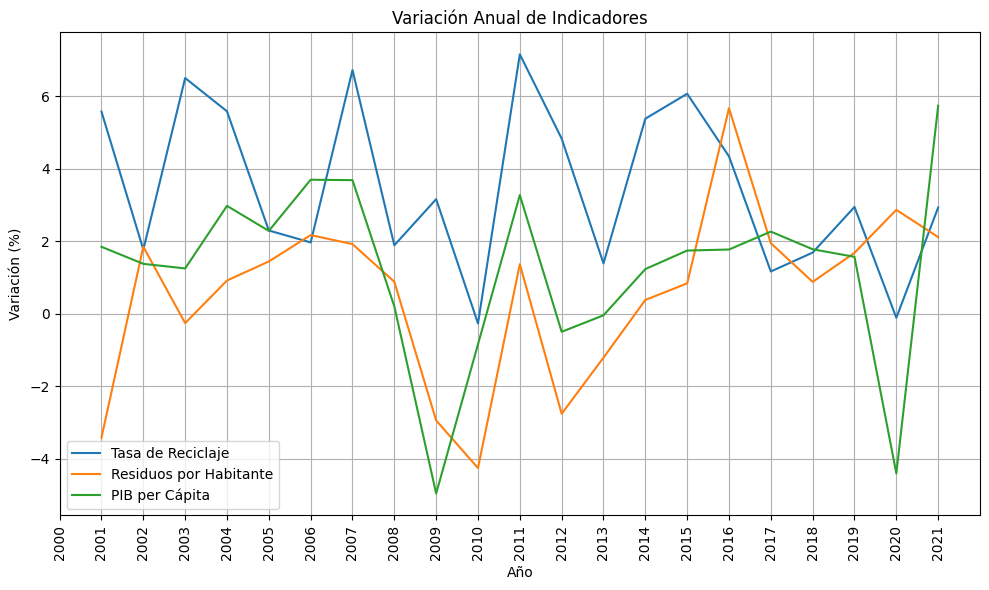

Los resultados se han guardado en el archivo: ../data/variaciones_gral.xlsx


In [179]:

# Calcular la variación anual para cada columna
df_variaciones = pd.DataFrame({
    'Año': df_eurostat_full['TIME_PERIOD'].unique(),
    'Variación Tasa de Reciclaje (%)': df_eurostat_full.groupby('TIME_PERIOD')['tasa reciclaje %'].mean().pct_change() * 100,
    'Variación Residuos por Habitante (%)': df_eurostat_full.groupby('TIME_PERIOD')['residuos_kg_hab'].mean().pct_change() * 100,
    'Variación PIB per Cápita (%)': df_eurostat_full.groupby('TIME_PERIOD')['PIB per capita'].mean().pct_change() * 100,
    #'Variación Valor Añadido Ambiental (%)': df_eurostat_full.groupby('TIME_PERIOD')['Valor añadido ambiental respecto al PIB %'].mean().pct_change() * 100
})

# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Trazar la variación anual de la tasa de reciclaje
plt.plot(df_variaciones['Año'], df_variaciones['Variación Tasa de Reciclaje (%)'], label='Tasa de Reciclaje')

# Trazar la variación anual de los residuos por habitante
plt.plot(df_variaciones['Año'], df_variaciones['Variación Residuos por Habitante (%)'], label='Residuos por Habitante')

# Trazar la variación anual del PIB per Cápita
plt.plot(df_variaciones['Año'], df_variaciones['Variación PIB per Cápita (%)'], label='PIB per Cápita')

# Configurar título y etiquetas de los ejes
plt.title('Variación Anual de Indicadores')
plt.xlabel('Año')
plt.ylabel('Variación (%)')

# Establecer el eje x para que muestre cada año individualmente
plt.xticks(df_variaciones['Año'], rotation=90)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar el DataFrame con las variaciones anuales para cada tipo de indicador
df_variaciones

# Especificar la ruta del archivo Excel
excel_file_path = "../data/variaciones_gral.xlsx"

# Guardar el DataFrame en un archivo Excel
df_variaciones.to_excel(excel_file_path)

print(f"Los resultados se han guardado en el archivo: {excel_file_path}")

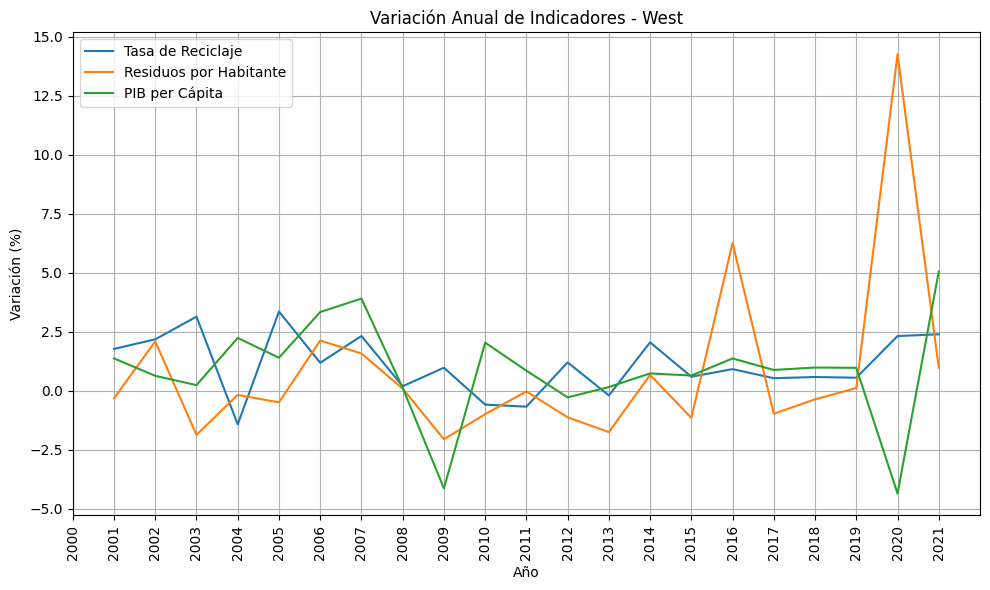

Variaciones anuales para West




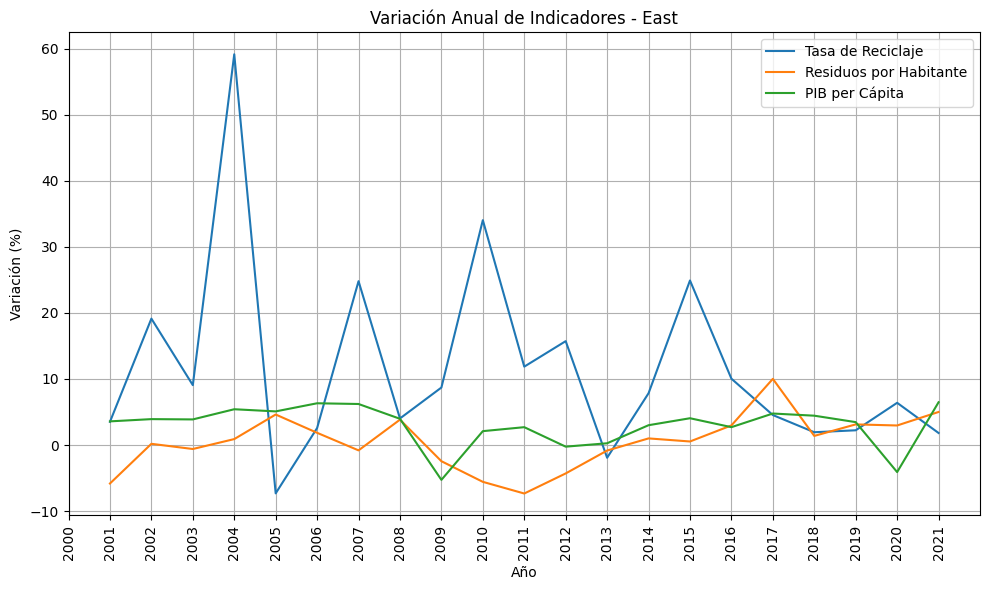

Variaciones anuales para East




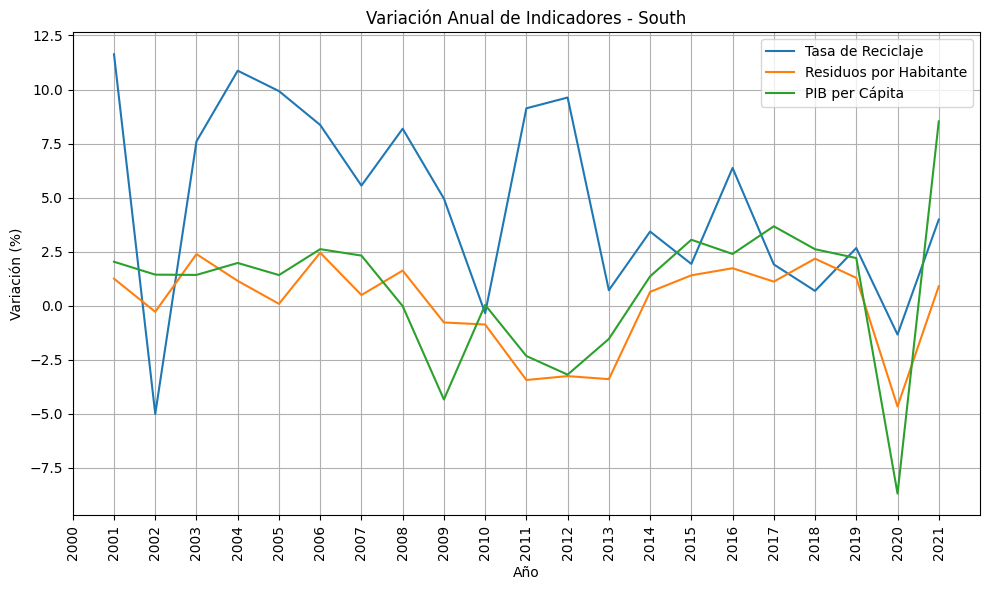

Variaciones anuales para South




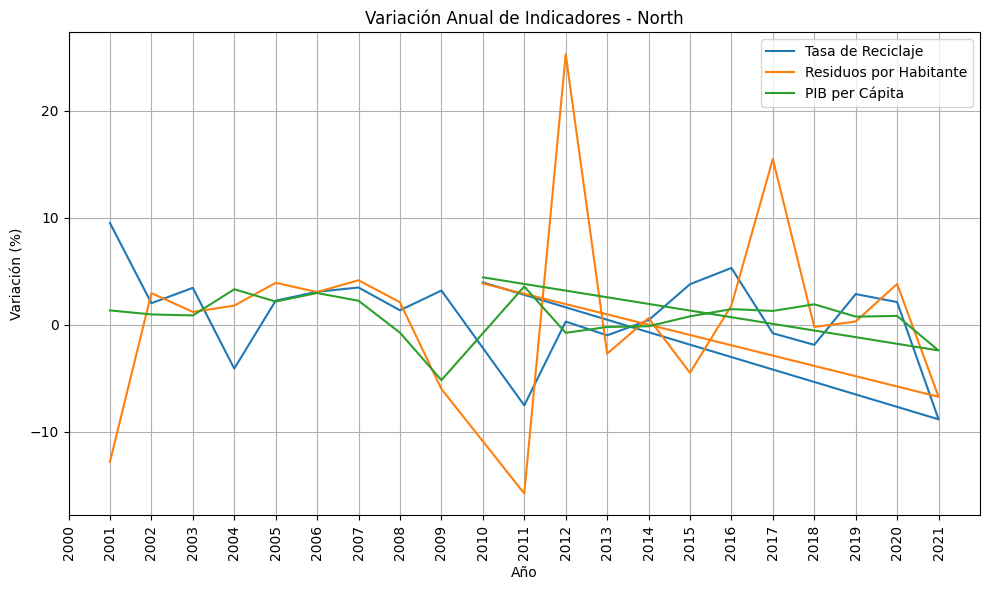

Variaciones anuales para North




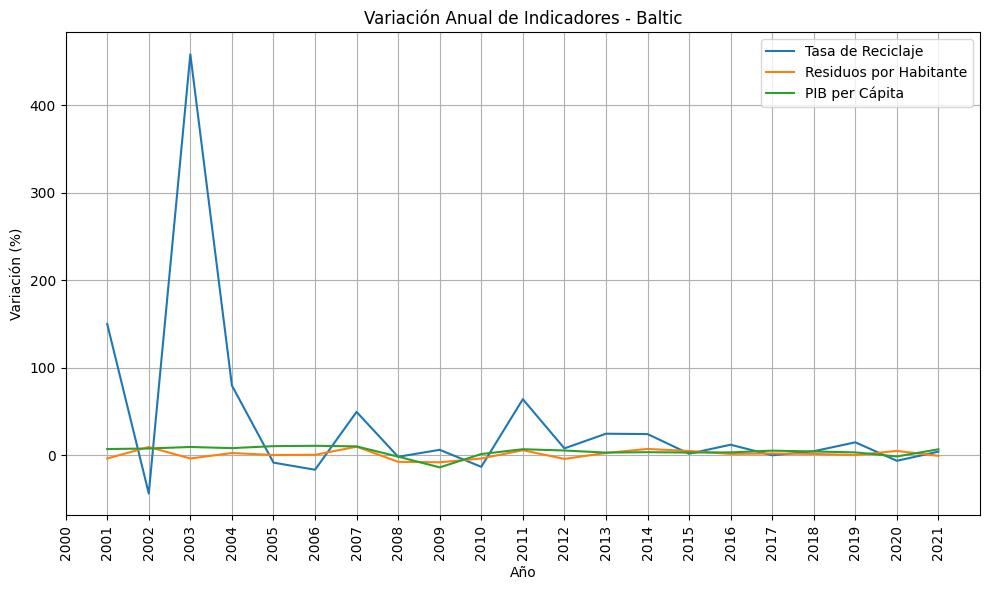

Variaciones anuales para Baltic




In [182]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la variación anual para cada grupo y cada columna
def calcular_variaciones_por_grupo(df, group_column):
    variaciones_por_grupo = {}
    for group_value in df[group_column].unique():
        variaciones = {
            'Año': df[df[group_column] == group_value]['TIME_PERIOD'].unique(),
            f'Variación Tasa de Reciclaje (%) - {group_value}': df[df[group_column] == group_value].groupby('TIME_PERIOD')['tasa reciclaje %'].mean().pct_change() * 100,
            f'Variación Residuos por Habitante (%) - {group_value}': df[df[group_column] == group_value].groupby('TIME_PERIOD')['residuos_kg_hab'].mean().pct_change() * 100,
            f'Variación PIB per Cápita (%) - {group_value}': df[df[group_column] == group_value].groupby('TIME_PERIOD')['PIB per capita'].mean().pct_change() * 100,
            #f'Variación Valor Añadido Ambiental (%) - {group_value}': df[df[group_column] == group_value].groupby('TIME_PERIOD')['Valor añadido ambiental respecto al PIB %'].mean().pct_change() * 100
        }
        variaciones_por_grupo[group_value] = pd.DataFrame(variaciones)
    return variaciones_por_grupo

# Función para graficar y mostrar las variaciones anuales para cada grupo
def graficar_variaciones_por_grupo(variaciones_por_grupo):
    for group_value, df_variaciones in variaciones_por_grupo.items():
        # Configurar el gráfico
        plt.figure(figsize=(10, 6))

        # Trazar la variación anual de la tasa de reciclaje
        plt.plot(df_variaciones['Año'], df_variaciones[f'Variación Tasa de Reciclaje (%) - {group_value}'], label='Tasa de Reciclaje')

        # Trazar la variación anual de los residuos por habitante
        plt.plot(df_variaciones['Año'], df_variaciones[f'Variación Residuos por Habitante (%) - {group_value}'], label='Residuos por Habitante')

        # Trazar la variación anual del PIB per Cápita
        plt.plot(df_variaciones['Año'], df_variaciones[f'Variación PIB per Cápita (%) - {group_value}'], label='PIB per Cápita')

        # Configurar título y etiquetas de los ejes
        plt.title(f'Variación Anual de Indicadores - {group_value}')
        plt.xlabel('Año')
        plt.ylabel('Variación (%)')

        # Establecer el eje x para que muestre cada año individualmente
        plt.xticks(df_variaciones['Año'], rotation=90)

        # Mostrar la leyenda
        plt.legend()

        # Mostrar el gráfico
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Mostrar el DataFrame con las variaciones anuales para cada tipo de indicador
        print(f'Variaciones anuales para {group_value}')
        df_variaciones
        print('\n')

# Calcular las variaciones para cada grupo
variaciones_por_grupo = calcular_variaciones_por_grupo(df_eurostat_full, 'group')

# Graficar y mostrar las variaciones para cada grupo
graficar_variaciones_por_grupo(variaciones_por_grupo)


Dentro del grupo South, vemos el comportamiento de cada país

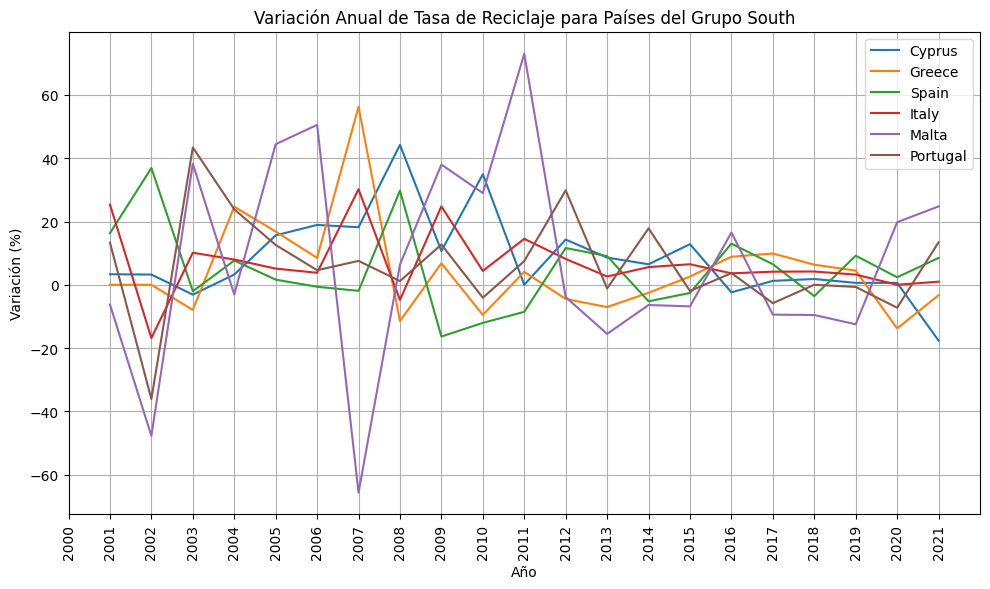

Los resultados se han guardado en el archivo: ../data/variaciones_south.xlsx


In [178]:
# Filtrar el DataFrame para el grupo "South"
df_group_south = df_eurostat_full[df_eurostat_full['group'] == 'South']

# Calcular la variación anual para cada columna dentro del grupo "South"
df_variaciones_south = pd.DataFrame({
    'Año': df_group_south['TIME_PERIOD'].unique(),
    'Variación Tasa de Reciclaje (%)': df_group_south.groupby('TIME_PERIOD')['tasa reciclaje %'].mean().pct_change() * 100,
    'Variación Residuos por Habitante (%)': df_group_south.groupby('TIME_PERIOD')['residuos_kg_hab'].mean().pct_change() * 100,
    'Variación PIB per Cápita (%)': df_group_south.groupby('TIME_PERIOD')['PIB per capita'].mean().pct_change() * 100
})

# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Trazar la variación anual de la tasa de reciclaje para cada país dentro del grupo "South"
for country in df_group_south['country'].unique():
    plt.plot(df_variaciones_south['Año'], df_group_south[df_group_south['country'] == country]['tasa reciclaje %'].pct_change() * 100, label=country)

# Configurar título y etiquetas de los ejes
plt.title('Variación Anual de Tasa de Reciclaje para Países del Grupo South')
plt.xlabel('Año')
plt.ylabel('Variación (%)')

# Establecer el eje x para que muestre cada año individualmente
plt.xticks(df_variaciones_south['Año'], rotation=90)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar el DataFrame con las variaciones anuales para cada tipo de indicador
df_variaciones_south


# Especificar la ruta del archivo Excel
excel_file_path = "../data/variaciones_south.xlsx"

# Guardar el DataFrame en un archivo Excel
df_variaciones_south.to_excel(excel_file_path)

print(f"Los resultados se han guardado en el archivo: {excel_file_path}")

In [176]:
# Seleccionar las columnas relevantes
columnas_relevantes = ['country', 'group', 'TIME_PERIOD', 'tasa reciclaje %', 'PIB per capita', 'residuos_kg_hab']

# Crear el DataFrame con los datos deseados
df_datos_pais = df_eurostat_full[columnas_relevantes]

# Mostrar el DataFrame
df_datos_pais


country group  TIME_PERIOD  tasa reciclaje %  PIB per capita  \
0     Austria  West         2000              63.4         31710.0   
1     Austria  West         2001              64.3         31990.0   
2     Austria  West         2002              62.5         32360.0   
3     Austria  West         2003              64.2         32520.0   
4     Austria  West         2004              57.4         33200.0   
..        ...   ...          ...               ...             ...   
588  Slovakia  East         2017              29.8         15000.0   
589  Slovakia  East         2018              36.3         15580.0   
590  Slovakia  East         2019              38.5         15960.0   
591  Slovakia  East         2020              45.3         15400.0   
592  Slovakia  East         2021              48.9         16200.0   

     residuos_kg_hab  
0              580.0  
1              576.0  
2              608.0  
3              607.0  
4              574.0  
..               ...  
588            378.0  
589            414.0  
590            421.0  
591            478.0  
592            497.0  

[593 rows x 6 columns]

In [177]:
# Definir la ruta del archivo Excel
ruta_excel = "../data/datos_paises.xlsx"

# Guardar el DataFrame en un archivo Excel
df_datos_pais.to_excel(ruta_excel, index=False)

# Confirmar que se ha guardado correctamente
print(f"guardado")


guardado


En el caso de España

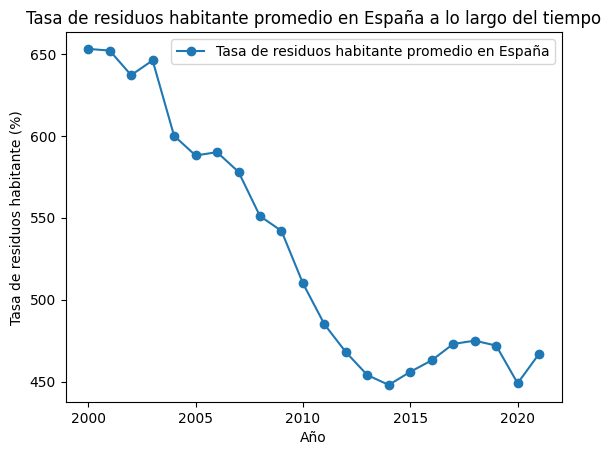

In [194]:
import matplotlib.pyplot as plt

# Filtrar los datos para incluir solo observaciones relacionadas con España
df_spain = df_eurostat_full[df_eurostat_full['country'] == 'Spain']

# Agrupar los datos por 'TIME_PERIOD' y calcular la media de la tasa de residuos para cada período de tiempo
grupo_tiempo_spain = df_spain.groupby('TIME_PERIOD')['residuos_kg_hab'].mean()

# Trazar la serie temporal para España
plt.plot(grupo_tiempo_spain.index, grupo_tiempo_spain.values, marker='o', linestyle='-', label='Tasa de residuos habitante promedio en España')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Tasa de residuos habitante (%)')
plt.title('Tasa de residuos habitante promedio en España a lo largo del tiempo')
plt.legend()

# Mostrar el gráfico
plt.show()


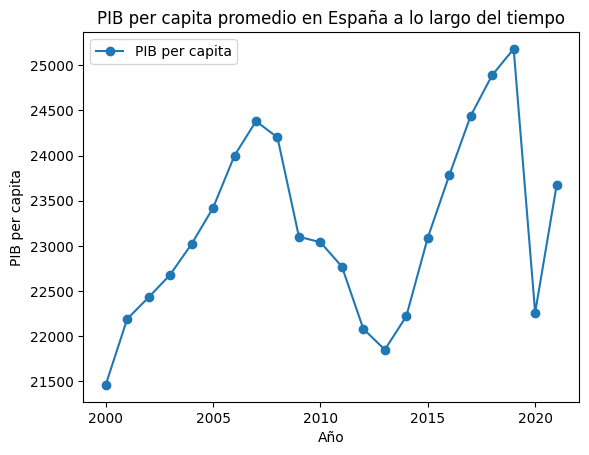

In [203]:
# Filtrar los datos para incluir solo observaciones relacionadas con España
df_spain = df_eurostat_full[df_eurostat_full['country'] == 'Spain']

# Agrupar los datos por 'TIME_PERIOD' y calcular la media de la tasa de residuos para cada período de tiempo
grupo_tiempo_spain = df_spain.groupby('TIME_PERIOD')['PIB per capita'].mean()

# Trazar la serie temporal para España
plt.plot(grupo_tiempo_spain.index, grupo_tiempo_spain.values, marker='o', linestyle='-', label='PIB per capita')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('PIB per capita')
plt.title('PIB per capita promedio en España a lo largo del tiempo')
plt.legend()

# Mostrar el gráfico
plt.show()

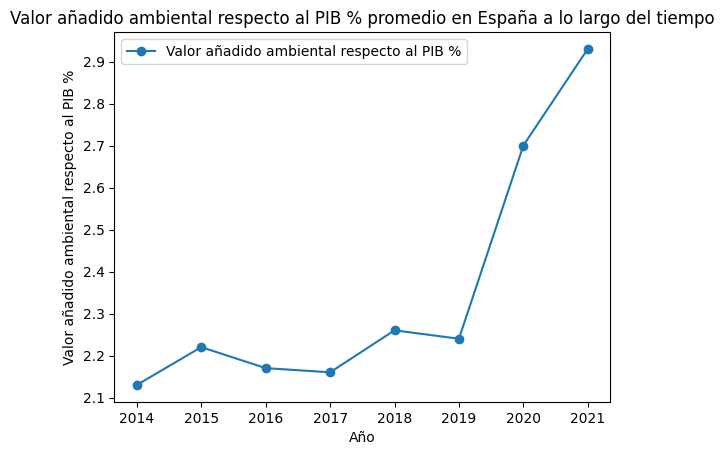

In [201]:

# Filtrar los datos para incluir solo observaciones relacionadas con España
df_spain = df_eurostat_full[df_eurostat_full['country'] == 'Spain']

# Agrupar los datos por 'TIME_PERIOD' y calcular la media de la tasa de residuos para cada período de tiempo
grupo_tiempo_spain = df_spain.groupby('TIME_PERIOD')['Valor añadido ambiental respecto al PIB %'].mean()

# Trazar la serie temporal para España
plt.plot(grupo_tiempo_spain.index, grupo_tiempo_spain.values, marker='o', linestyle='-', label='Valor añadido ambiental respecto al PIB %')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Valor añadido ambiental respecto al PIB %')
plt.title('Valor añadido ambiental respecto al PIB % promedio en España a lo largo del tiempo')
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
# Filtrar los datos para incluir solo observaciones relacionadas con España
df_spain = df_eurostat_full[df_eurostat_full['country'] == 'Spain']

# Agrupar los datos por 'TIME_PERIOD' y calcular la media de la tasa de residuos para cada período de tiempo
grupo_tiempo_spain = df_spain.groupby('TIME_PERIOD')['tasa reciclaje %'].mean()

# Trazar la serie temporal para España
plt.plot(grupo_tiempo_spain.index, grupo_tiempo_spain.values, marker='o', linestyle='-', label='Tasa de residuos habitante promedio en España')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Tasa de reciclaje (%)')
plt.title('Tasa de reciclaje (%) promedio en España a lo largo del tiempo')
plt.legend()

# Mostrar el gráfico
plt.show()

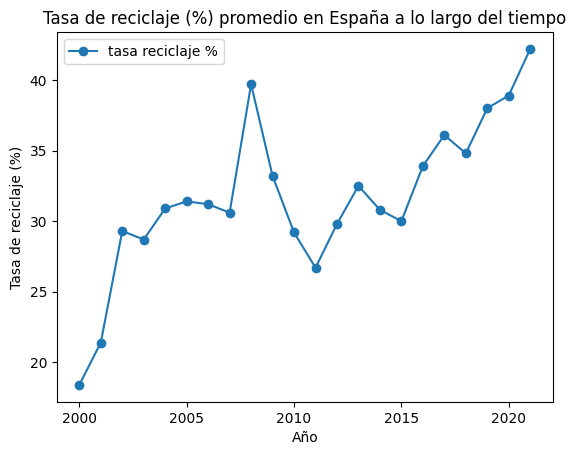

In [202]:
import matplotlib.pyplot as plt

# Filtrar los datos para incluir solo observaciones relacionadas con España
df_spain = df_eurostat_full[df_eurostat_full['country'] == 'Spain']

# Agrupar los datos por 'TIME_PERIOD' y calcular la media de la tasa de residuos para cada período de tiempo
grupo_tiempo_spain = df_spain.groupby('TIME_PERIOD')['tasa reciclaje %'].mean()

# Trazar la serie temporal para España
plt.plot(grupo_tiempo_spain.index, grupo_tiempo_spain.values, marker='o', linestyle='-', label='tasa reciclaje %')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Tasa de reciclaje (%)')
plt.title('Tasa de reciclaje (%) promedio en España a lo largo del tiempo')
plt.legend()

# Mostrar el gráfico
plt.show()

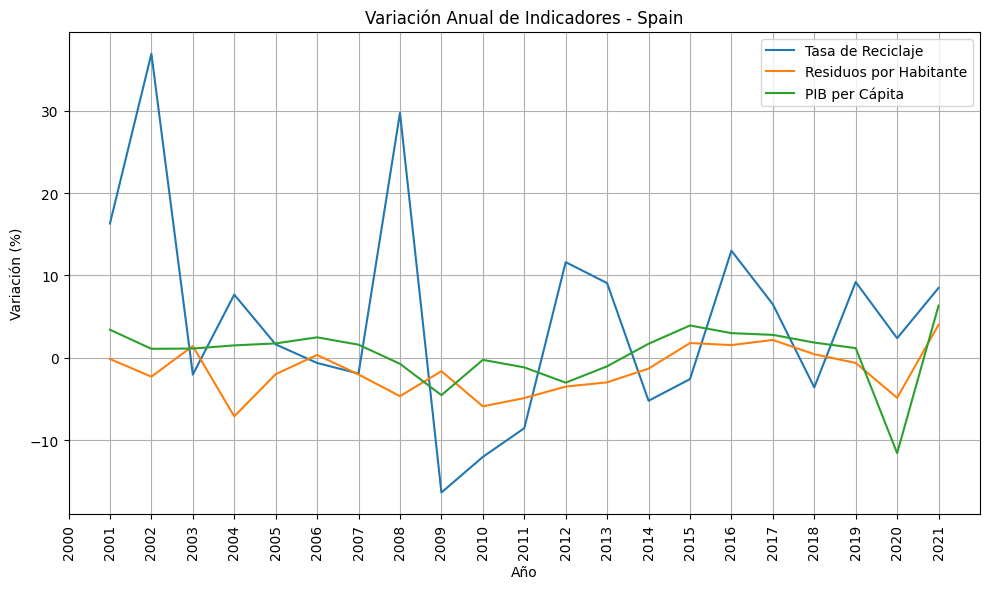

Variaciones anuales para Spain:
              Año  Variación Tasa de Reciclaje (%) - Spain  \
TIME_PERIOD                                                  
2000         2000                                      NaN   
2001         2001                                16.304348   
2002         2002                                36.915888   
2003         2003                                -2.047782   
2004         2004                                 7.665505   
2005         2005                                 1.618123   
2006         2006                                -0.636943   
2007         2007                                -1.923077   
2008         2008                                29.738562   
2009         2009                               -16.372796   
2010         2010                               -12.048193   
2011         2011                                -8.561644   
2012         2012                                11.610487   
2013         2013                     

In [183]:
# Filtrar el DataFrame para el país "Spain"
df_spain = df_eurostat_full[df_eurostat_full['country'] == 'Spain']

# Calcular la variación anual para el país "Spain"
def calcular_variaciones_por_pais(df):
    variaciones_pais = {
        'Año': df['TIME_PERIOD'].unique(),
        'Variación Tasa de Reciclaje (%) - Spain': df.groupby('TIME_PERIOD')['tasa reciclaje %'].mean().pct_change() * 100,
        'Variación Residuos por Habitante (%) - Spain': df.groupby('TIME_PERIOD')['residuos_kg_hab'].mean().pct_change() * 100,
        'Variación PIB per Cápita (%) - Spain': df.groupby('TIME_PERIOD')['PIB per capita'].mean().pct_change() * 100,
        # 'Variación Valor Añadido Ambiental (%) - Spain': df.groupby('TIME_PERIOD')['Valor añadido ambiental respecto al PIB %'].mean().pct_change() * 100
    }
    return pd.DataFrame(variaciones_pais)

# Calcular las variaciones para el país "Spain"
df_variaciones_spain = calcular_variaciones_por_pais(df_spain)

# Graficar las variaciones anuales para el país "Spain"
plt.figure(figsize=(10, 6))

# Trazar la variación anual de la tasa de reciclaje para España
plt.plot(df_variaciones_spain['Año'], df_variaciones_spain['Variación Tasa de Reciclaje (%) - Spain'], label='Tasa de Reciclaje')

# Trazar la variación anual de los residuos por habitante para España
plt.plot(df_variaciones_spain['Año'], df_variaciones_spain['Variación Residuos por Habitante (%) - Spain'], label='Residuos por Habitante')

# Trazar la variación anual del PIB per Cápita para España
plt.plot(df_variaciones_spain['Año'], df_variaciones_spain['Variación PIB per Cápita (%) - Spain'], label='PIB per Cápita')

# Configurar título y etiquetas de los ejes
plt.title('Variación Anual de Indicadores - Spain')
plt.xlabel('Año')
plt.ylabel('Variación (%)')

# Establecer el eje x para que muestre cada año individualmente
plt.xticks(df_variaciones_spain['Año'], rotation=90)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar el DataFrame con las variaciones anuales para España
print('Variaciones anuales para Spain:')
print(df_variaciones_spain)

# Especificar la ruta del archivo Excel
excel_file_path = "../data/variaciones_spain.xlsx"

# Guardar el DataFrame en un archivo Excel
df_variaciones_spain.to_excel(excel_file_path)

print(f"Los resultados se han guardado en el archivo: {excel_file_path}")

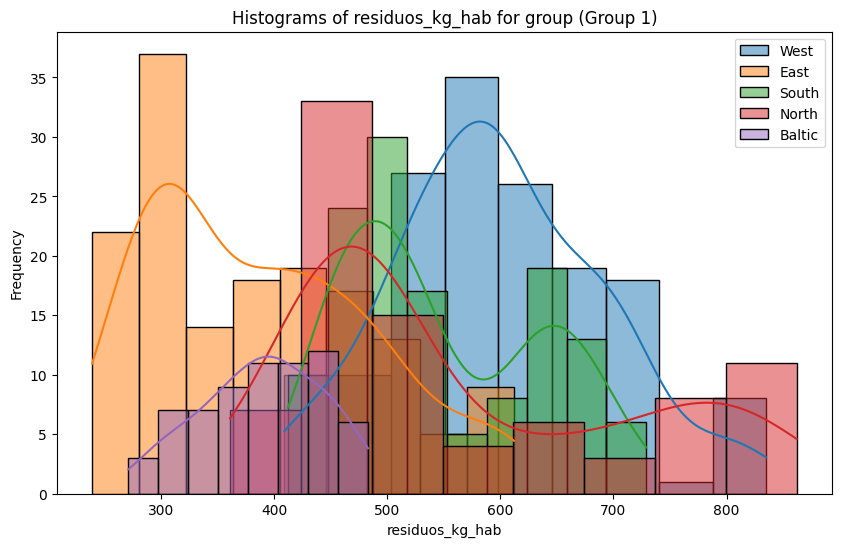

In [204]:
from bootcampviztools import  plot_grouped_histograms
plot_grouped_histograms(df_eurostat_full,"group","residuos_kg_hab",group_size=10)

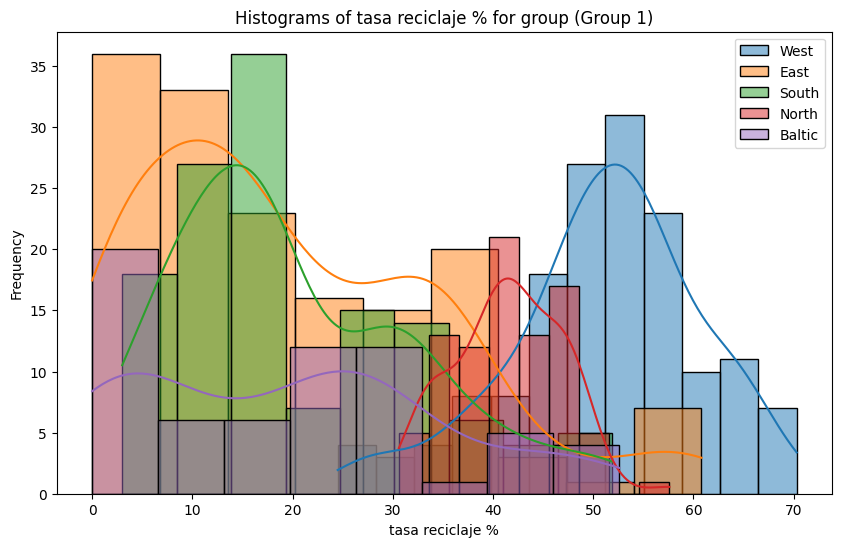

In [205]:
from bootcampviztools import  plot_grouped_histograms
plot_grouped_histograms(df_eurostat_full,"group","tasa reciclaje %",group_size=10)

In [124]:
columnas_categoricas = ['country', 'group', 'Grupo residuos/hab', 'Rango de residuos (kg/hab)']
columnas_numericas = ['TIME_PERIOD', 'tasa reciclaje %', 'residuos_kg_hab', 'PIB per capita', 'Valor añadido ambiental respecto al PIB %']


### Análisis multivariante.

3. **Análisis multivariante**: ver de manera gráfica la relación de todas con todas.

    3.1 Gráficas: heatmap de correlación, grid de gráficas mediante pairplot.

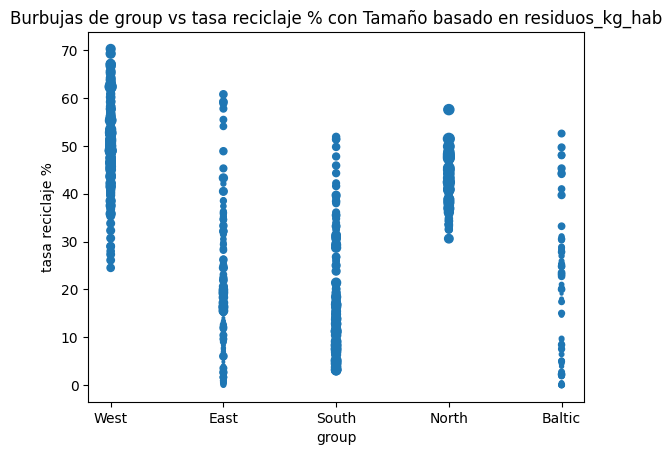

In [206]:
from bootcampviztools import bubble_plot
df_eurostat
bubble_plot(df_eurostat_full, "group", "tasa reciclaje %","residuos_kg_hab",scale = 10)


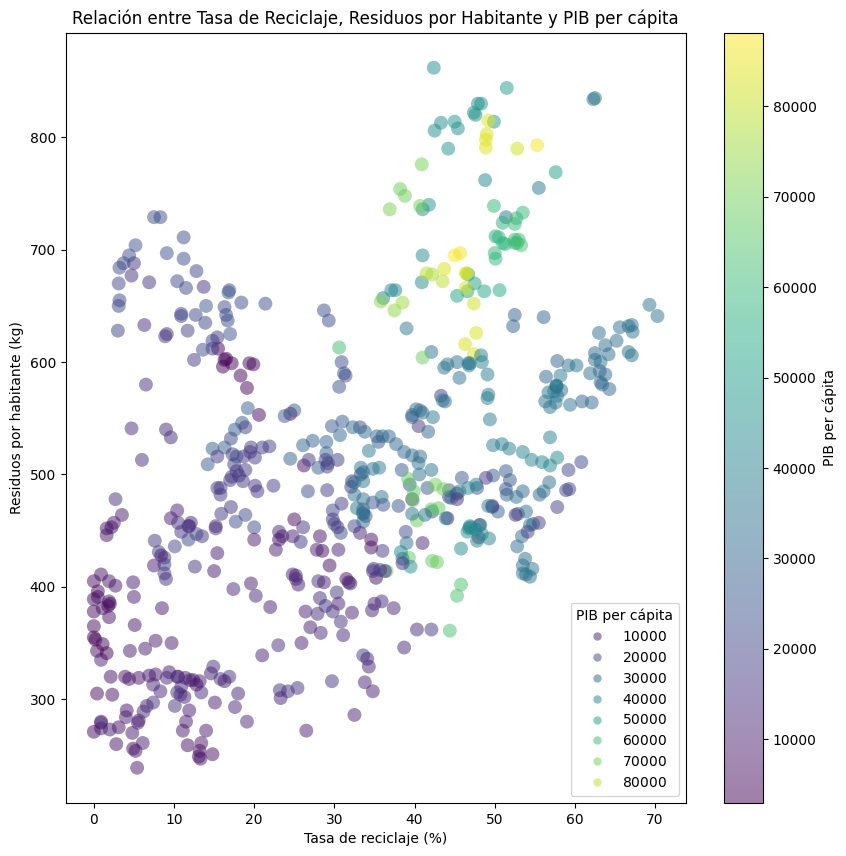

In [207]:
# Obtener los datos para el gráfico
tasa_reciclaje = df_eurostat_full["tasa reciclaje %"]
residuos_kg_hab = df_eurostat_full["residuos_kg_hab"]

# Definir el tamaño del área para las ciudades como el PIB per capita
PIB_per_capita = df_eurostat_full["PIB per capita"]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 10))
scatter = plt.scatter(tasa_reciclaje, residuos_kg_hab, c=PIB_per_capita, cmap="viridis", s=100, linewidth=0, alpha=0.5)

# Añadir etiquetas y barra de colores
plt.xlabel("Tasa de reciclaje (%)")
plt.ylabel("Residuos por habitante (kg)")
plt.colorbar(label="PIB per cápita")

# Añadir título
plt.title("Relación entre Tasa de Reciclaje, Residuos por Habitante y PIB per cápita")

# Añadir leyenda
plt.legend(*scatter.legend_elements(), title="PIB per cápita")

# Mostrar el gráfico
plt.show()


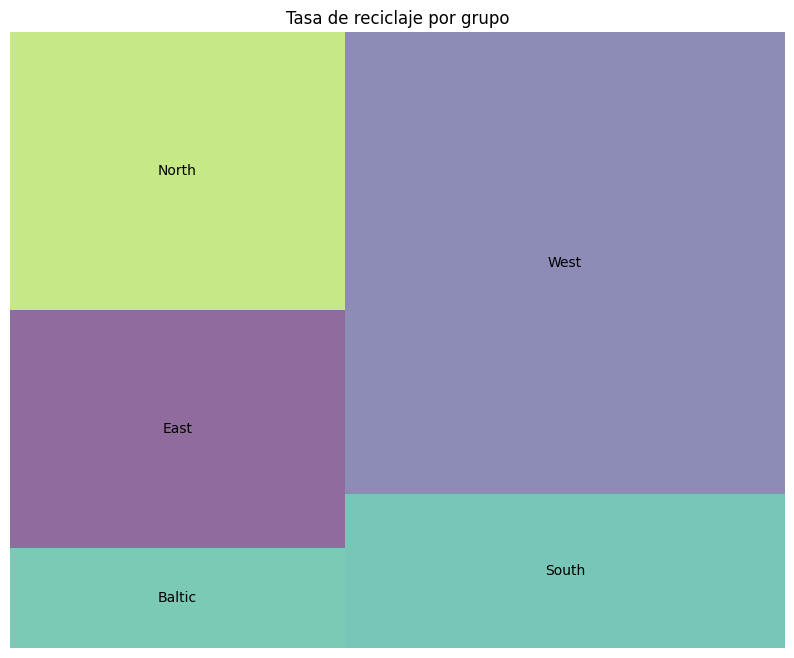

In [136]:
import squarify

# Agrupar los datos por grupo y calcular la suma de la tasa de reciclaje
datos = df_eurostat_full.groupby('group', as_index=False)['tasa reciclaje %'].sum()

plt.figure(figsize=(10, 8))
squarify.plot(sizes=datos['tasa reciclaje %'], label=datos['group'], alpha=0.6)
plt.title("Tasa de reciclaje por grupo")
plt.axis("off")
plt.show()


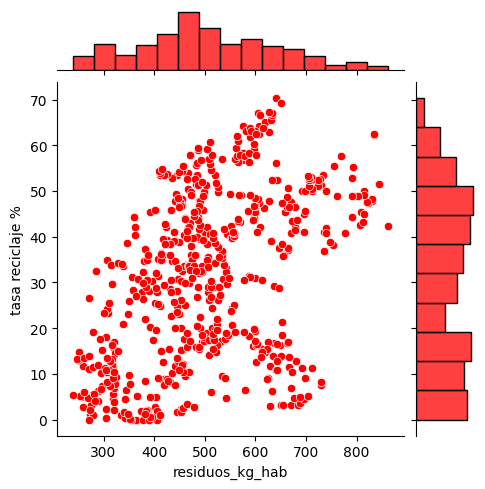

In [208]:
import seaborn as sns

sns.jointplot(x=df_eurostat_full["residuos_kg_hab"],
              y=df_eurostat_full["tasa reciclaje %"],
              color='red',
              height=5)


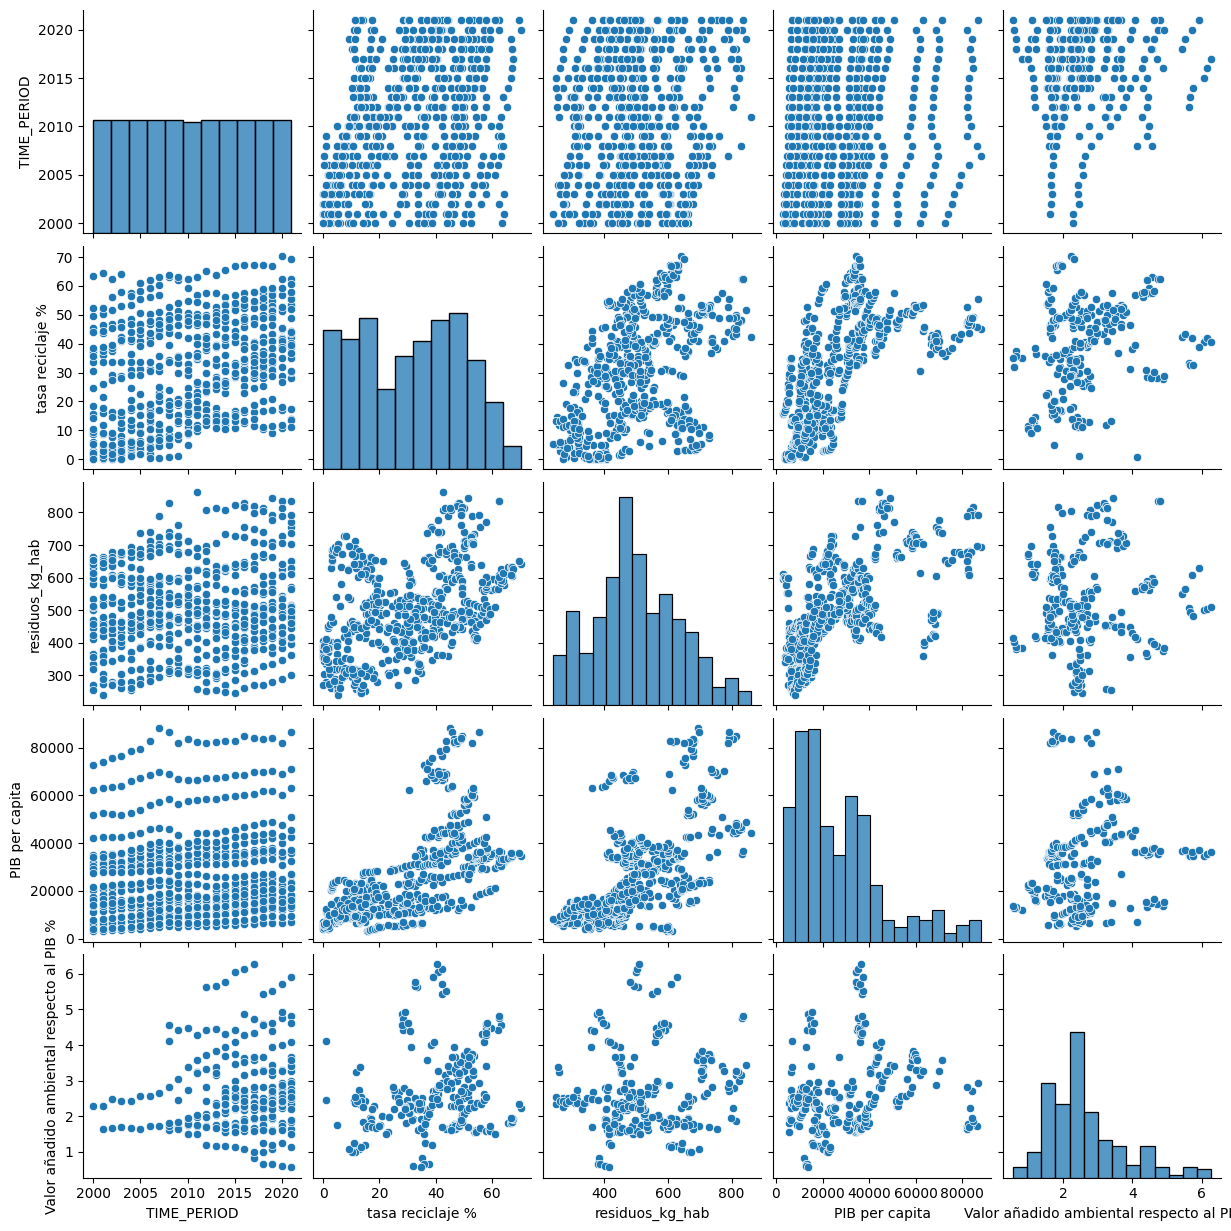

In [209]:
sns.pairplot(df_eurostat_full)


Heat map de correlaciones

<Axes: >

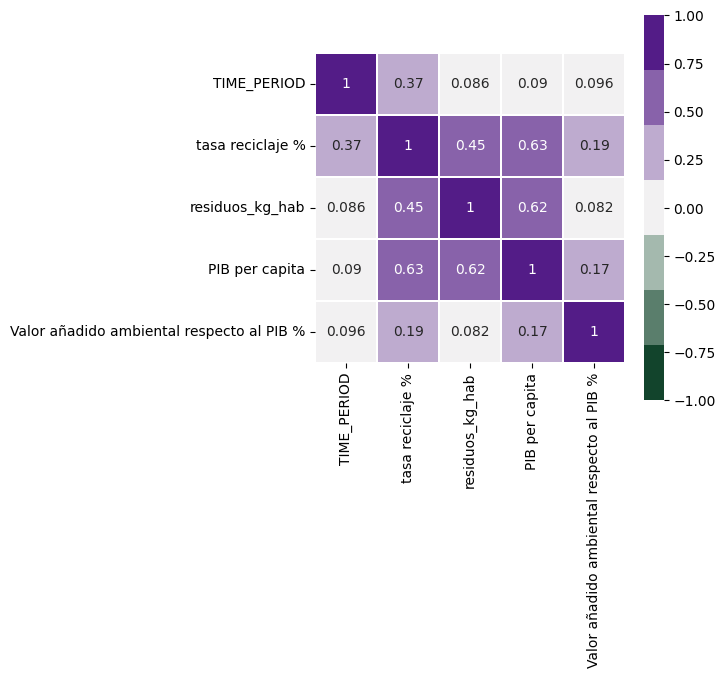

In [211]:
matriz_corr = df_eurostat_full.corr(numeric_only= True)

plt.figure(figsize=(5,5))
sns.heatmap(matriz_corr,
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True)

<Axes: >

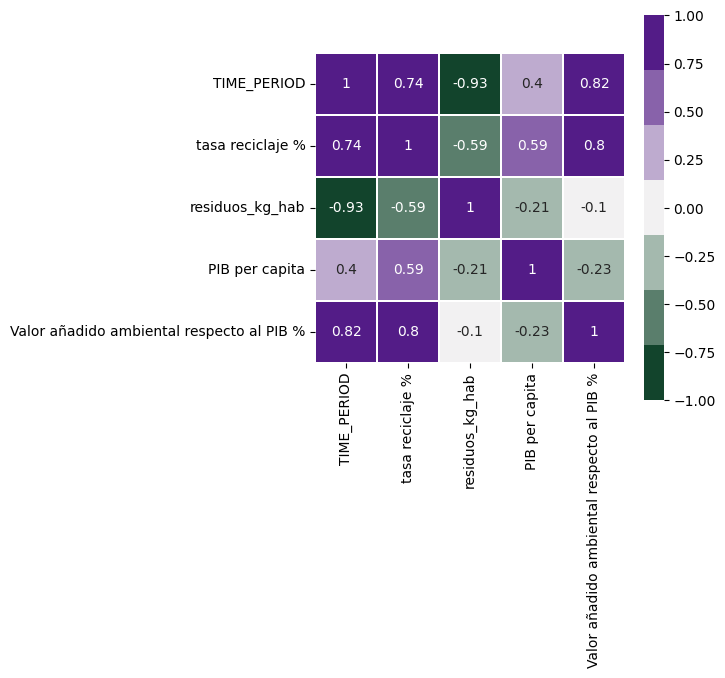

In [212]:
matriz_corr = df_spain.corr(numeric_only= True)

plt.figure(figsize=(5,5))
sns.heatmap(matriz_corr,
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True)


### 5. Resultados
21. **Contraste con hipótesis**: finalmente, analizaremos los resultados obtenidos del análisis, buscaremos insights y comprobaremos si responde positivamente o negativamente a nuestra hipótesis inicial. ¿Hemos respondido a la necesidad de negocio planteada al principio? De ser así, continuaríamos con el siguiente paso y en caso contrario, habrá que volver a los puntos 3 y 4 (requerimientos de los datos).
22. **Plan de acción**: ¿qué vamos a hacer en función de los resultados? Esto es algo que ya deberíamos tener claro antes del análisis pero puede variar en función de los resultados.
23. **Productivización**: ¿es necesario que esta información esté en un dashboard alojado en un hosting de la empresa para que sea consumible por más empleados?
24. **Comunicación, presentación de resultados**: una vez ya hemos realizado el análisis, obtenido resultados y contrastado hipótesis, queda enseñarlo. Se realiza una presentación con un buen hilo conductor desde el problema inicial hasta las conclusiones basadas en los datos.
25. **Transmitir conocimiento**: documentación/charlas de descubrimientos sobre los datos, insights o tecnologías.

Se presentan en la ppt
hipotesis_1 = "La generación de residuos va en aumento y las técnicas de tratamiento menos nocivas (reciclado) crecen despacio"
hipotesis_2 = "Hay diferencia en la gestión de residuos según el territorio"<br>
hipotesis_3 = "Hay fracciones de residuos consideradas más sostenibles que están creciendo -papel- y que no se reciclan tanto"<br>
hipotesis_4 = "En las Comunidades donde se sitúan las principales ciudades hay mayor generación de residuos per capita"<br>
hipotesis_5 = "Las actividades económicas que generan más residuos no son las que más invierten y gastan en la protección medioambiental de residuos"<br>
hipotesis_6 = "El gasto/inversión de empresas y gobiernos para la protección ambiental de residuos va en aumento a una velocidad menor a la generación"<br>
hipotesis_7 = "Las actividades económicas que generan más residuos no son las que más invierten y gastan en la protección medioambiental de residuos"<br>
hipotesis_8 = "España no obtiene resultados destacados en reducción de residuos y en su reciclado respecto a Europa"<br>